### Problem Statement:
    
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market
and there are various companies working in the domain. Data science comes as a very important tool to solve problems
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling,
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest
in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
df=pd.read_csv('train.csv')
pd.set_option('display.max_columns', 81)
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

In [3]:
#checking the dataset shape

df.shape

(1168, 81)

In [4]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

the data set has 1168 rows and 81 columns with multiple datatypes

In [5]:
#checking dtype
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

The data has both numerical and string values in columns

In [6]:
#checking unique values
for i in df.columns:
    print("no of unique values in",i,':', df[i].nunique())

no of unique values in Id : 1168
no of unique values in MSSubClass : 15
no of unique values in MSZoning : 5
no of unique values in LotFrontage : 106
no of unique values in LotArea : 892
no of unique values in Street : 2
no of unique values in Alley : 2
no of unique values in LotShape : 4
no of unique values in LandContour : 4
no of unique values in Utilities : 1
no of unique values in LotConfig : 5
no of unique values in LandSlope : 3
no of unique values in Neighborhood : 25
no of unique values in Condition1 : 9
no of unique values in Condition2 : 8
no of unique values in BldgType : 5
no of unique values in HouseStyle : 8
no of unique values in OverallQual : 10
no of unique values in OverallCond : 9
no of unique values in YearBuilt : 110
no of unique values in YearRemodAdd : 61
no of unique values in RoofStyle : 6
no of unique values in RoofMatl : 8
no of unique values in Exterior1st : 14
no of unique values in Exterior2nd : 15
no of unique values in MasVnrType : 4
no of unique values 

Id seems to be a unique value which can be ignored in model



Id -- 0 
MSSubClass -- 0 
MSZoning -- 0 
LotFrontage -- 214 
LotArea -- 0 
Street -- 0 
Alley -- 1091 
LotShape -- 0 
LandContour -- 0 
Utilities -- 0 
LotConfig -- 0 
LandSlope -- 0 
Neighborhood -- 0 
Condition1 -- 0 
Condition2 -- 0 
BldgType -- 0 
HouseStyle -- 0 
OverallQual -- 0 
OverallCond -- 0 
YearBuilt -- 0 
YearRemodAdd -- 0 
RoofStyle -- 0 
RoofMatl -- 0 
Exterior1st -- 0 
Exterior2nd -- 0 
MasVnrType -- 7 
MasVnrArea -- 7 
ExterQual -- 0 
ExterCond -- 0 
Foundation -- 0 
BsmtQual -- 30 
BsmtCond -- 30 
BsmtExposure -- 31 
BsmtFinType1 -- 30 
BsmtFinSF1 -- 0 
BsmtFinType2 -- 31 
BsmtFinSF2 -- 0 
BsmtUnfSF -- 0 
TotalBsmtSF -- 0 
Heating -- 0 
HeatingQC -- 0 
CentralAir -- 0 
Electrical -- 0 
1stFlrSF -- 0 
2ndFlrSF -- 0 
LowQualFinSF -- 0 
GrLivArea -- 0 
BsmtFullBath -- 0 
BsmtHalfBath -- 0 
FullBath -- 0 
HalfBath -- 0 
BedroomAbvGr -- 0 
KitchenAbvGr -- 0 
KitchenQual -- 0 
TotRmsAbvGrd -- 0 
Functional -- 0 
Fireplaces -- 0 
FireplaceQu -- 551 
GarageType -- 64 
Garage

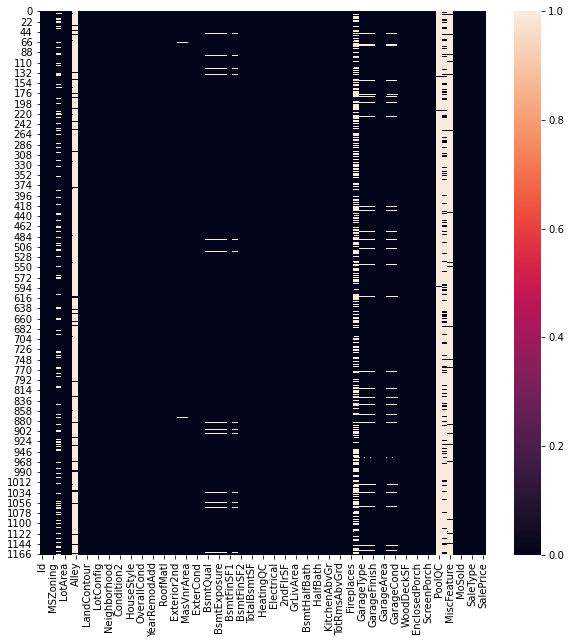

In [7]:
#checking the null values

plt.figure(figsize = (10,10))
sns.heatmap(df.isnull())


#printing null values by column
for j in df.columns:
    print(f"%s -- %d "%(j,df[j].isnull().sum()))


-- there seems to be a higer number of of columns with null values

-- the columns 

PoolQC -- 1161 

Fence -- 931 

MiscFeature--1124

has majority of its values null

In [54]:
#catogorising columns based on its datatype

num_int=[i for i in df if df[i].dtype=='int64']
num_float=[i for i in df if df[i].dtype=='float64']
catg=[i for i in df if df[i].dtype=='object']

In [9]:
#checking the columns which has null values

null_cols=[i for i in df if df[i].isnull().sum()>=1]


-----LotFrontage----

null value count 214
60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
        ... 
102.0      1
144.0      1
112.0      1
149.0      1
153.0      1
Name: LotFrontage, Length: 106, dtype: int64


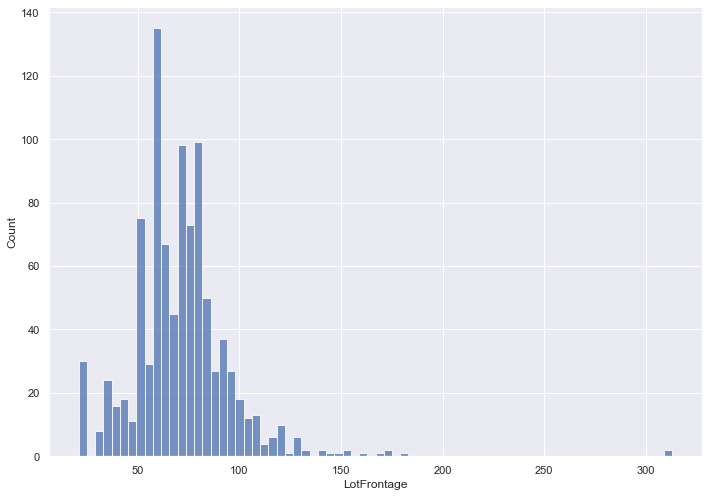


-----Alley----

null value count 1091
Grvl    41
Pave    36
Name: Alley, dtype: int64


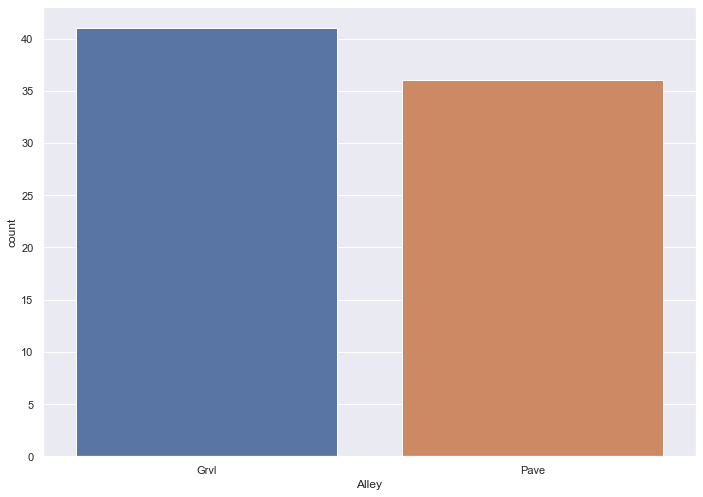


-----MasVnrType----

null value count 7
None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64


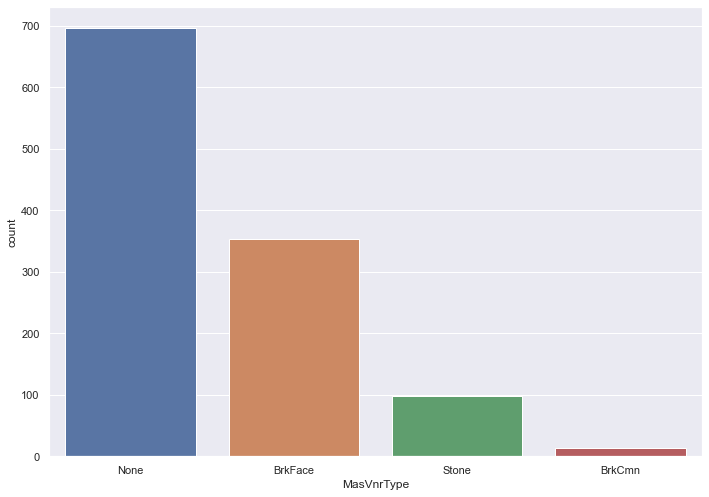


-----MasVnrArea----

null value count 7
0.0      692
72.0       7
180.0      6
120.0      6
106.0      5
        ... 
653.0      1
975.0      1
226.0      1
204.0      1
31.0       1
Name: MasVnrArea, Length: 283, dtype: int64


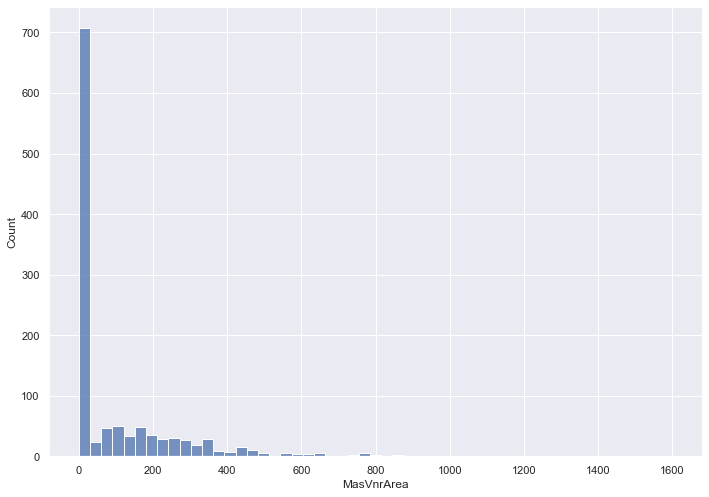


-----BsmtQual----

null value count 30
TA    517
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64


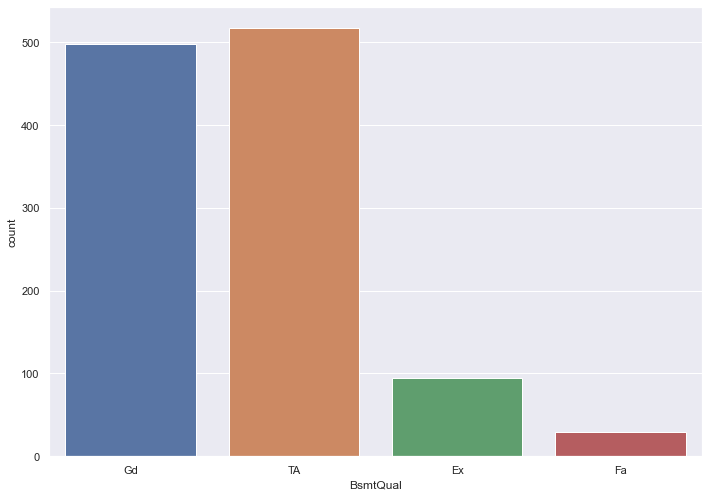


-----BsmtCond----

null value count 30
TA    1041
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64


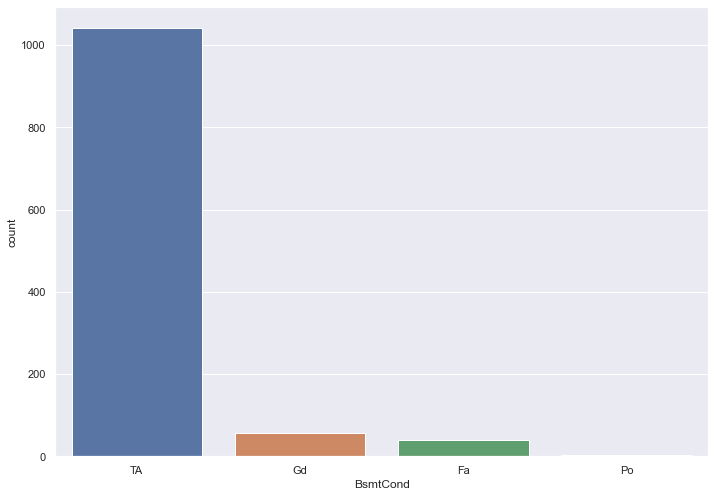


-----BsmtExposure----

null value count 31
No    756
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64


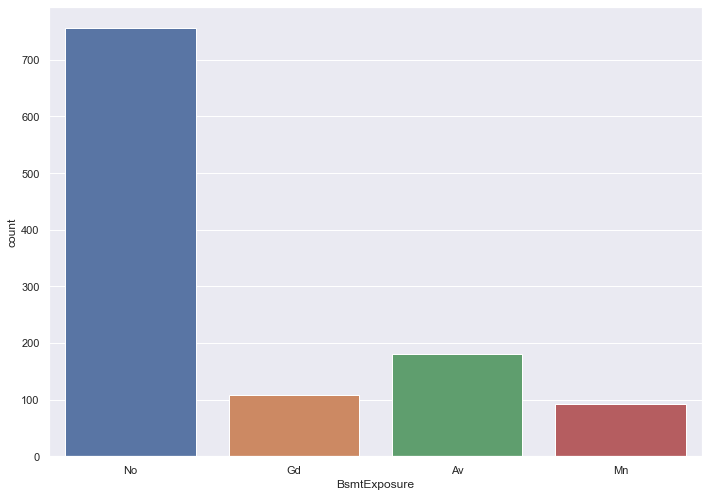


-----BsmtFinType1----

null value count 30
Unf    345
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64


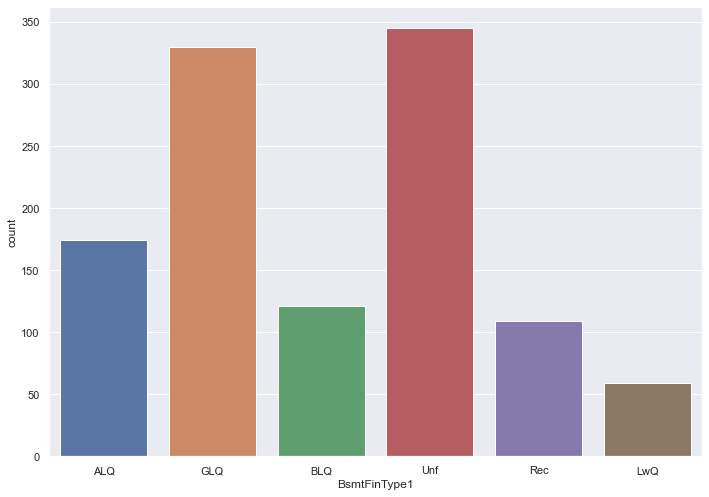


-----BsmtFinType2----

null value count 31
Unf    1002
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64


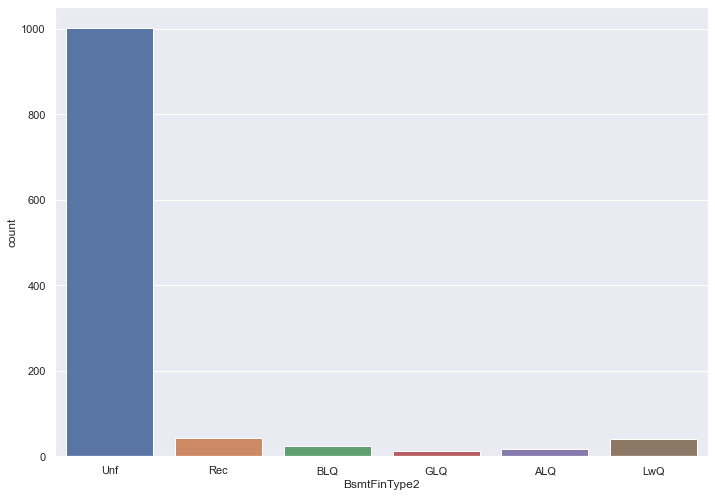


-----FireplaceQu----

null value count 551
Gd    301
TA    252
Fa     25
Ex     21
Po     18
Name: FireplaceQu, dtype: int64


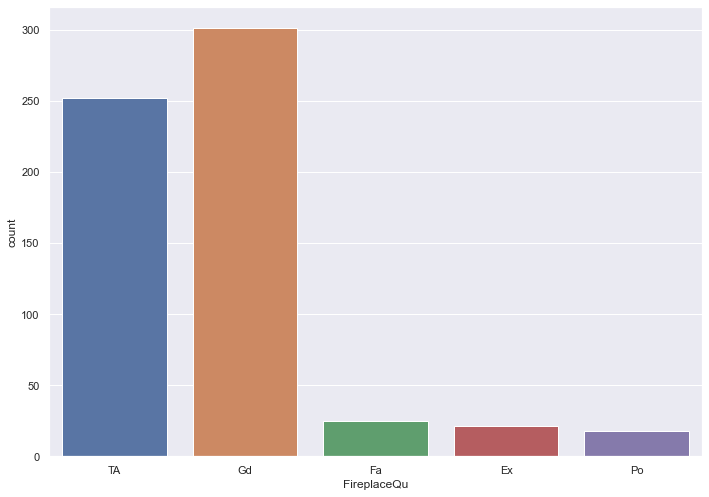


-----GarageType----

null value count 64
Attchd     691
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64


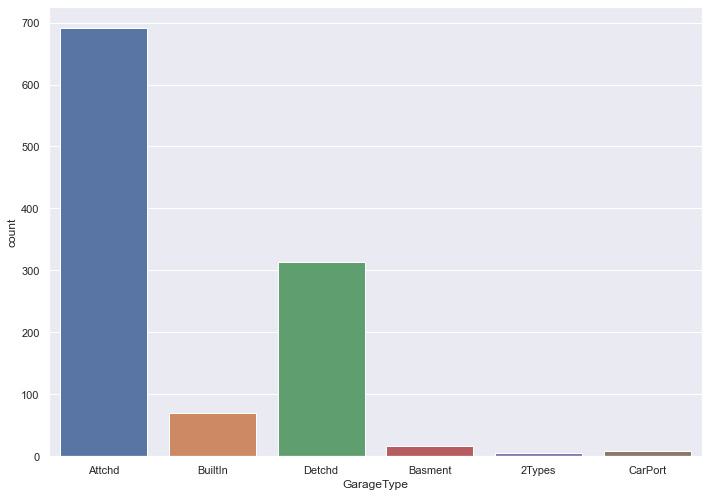


-----GarageYrBlt----

null value count 64
2006.0    52
2005.0    51
2007.0    40
2003.0    37
2004.0    36
          ..
1900.0     1
1927.0     1
1908.0     1
1933.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64


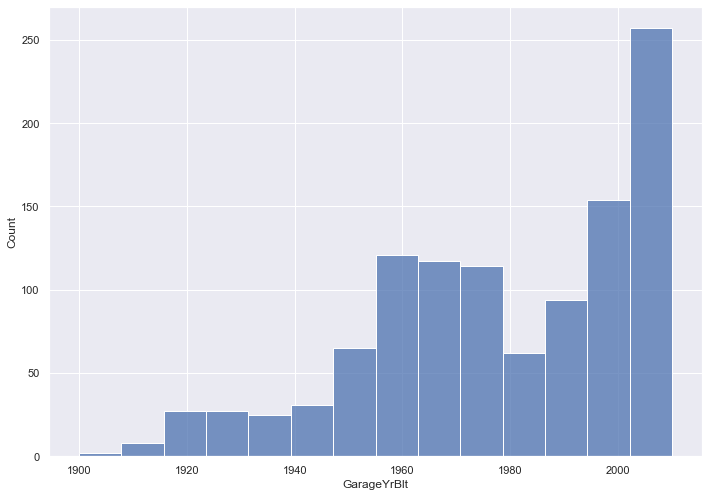


-----GarageFinish----

null value count 64
Unf    487
RFn    339
Fin    278
Name: GarageFinish, dtype: int64


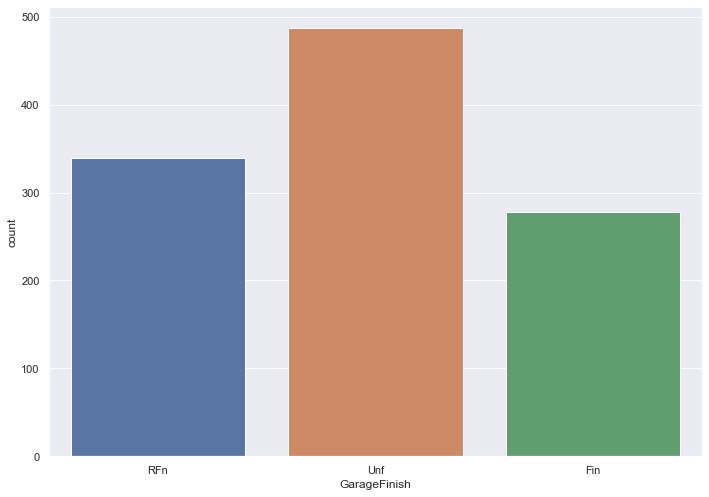


-----GarageQual----

null value count 64
TA    1050
Fa      39
Gd      11
Ex       2
Po       2
Name: GarageQual, dtype: int64


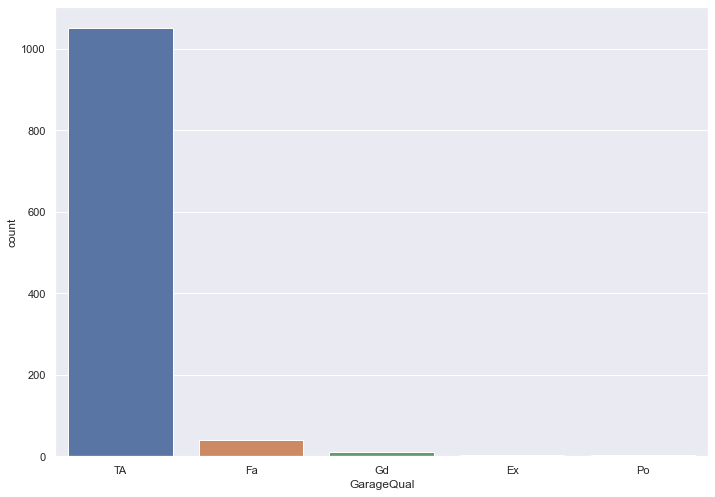


-----GarageCond----

null value count 64
TA    1061
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64


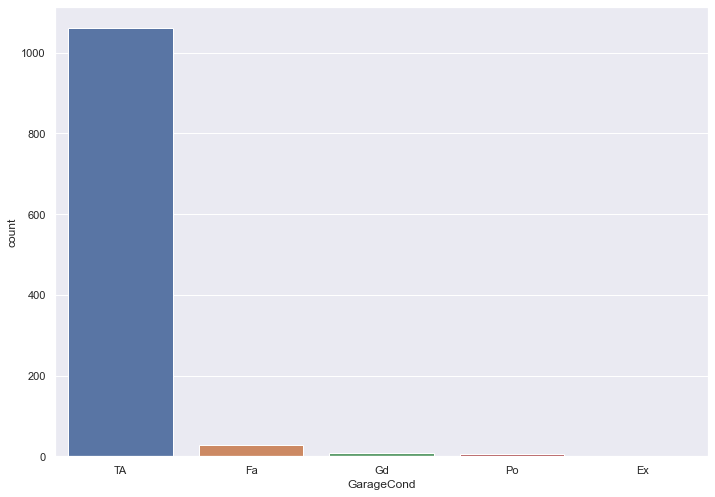


-----PoolQC----

null value count 1161
Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64


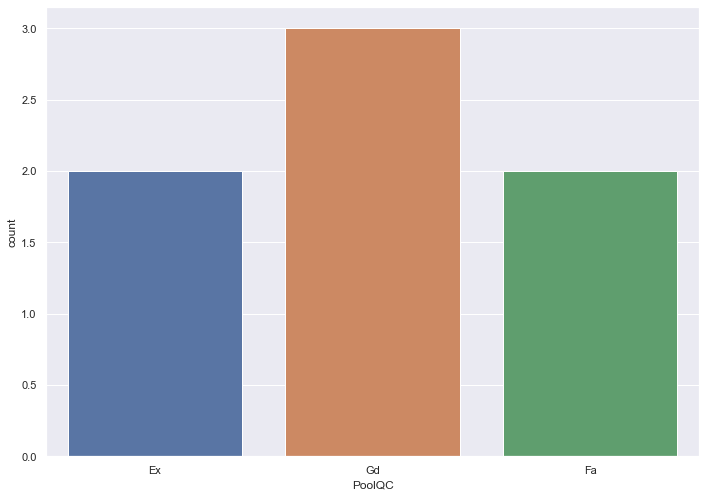


-----Fence----

null value count 931
MnPrv    129
GdPrv     51
GdWo      47
MnWw      10
Name: Fence, dtype: int64


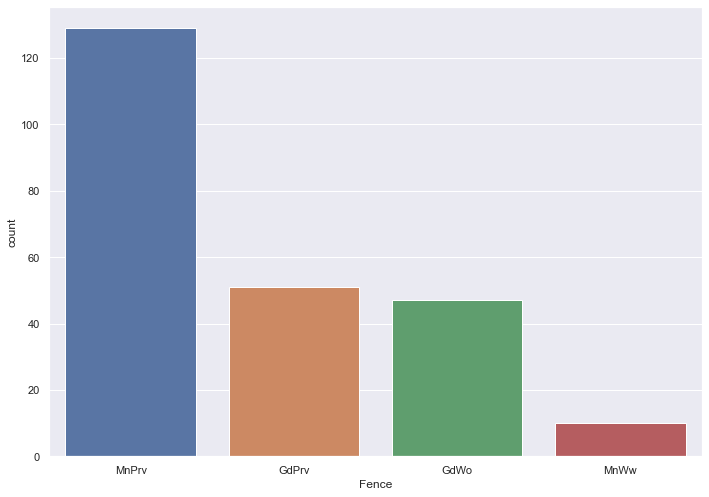


-----MiscFeature----

null value count 1124
Shed    40
Gar2     2
TenC     1
Othr     1
Name: MiscFeature, dtype: int64


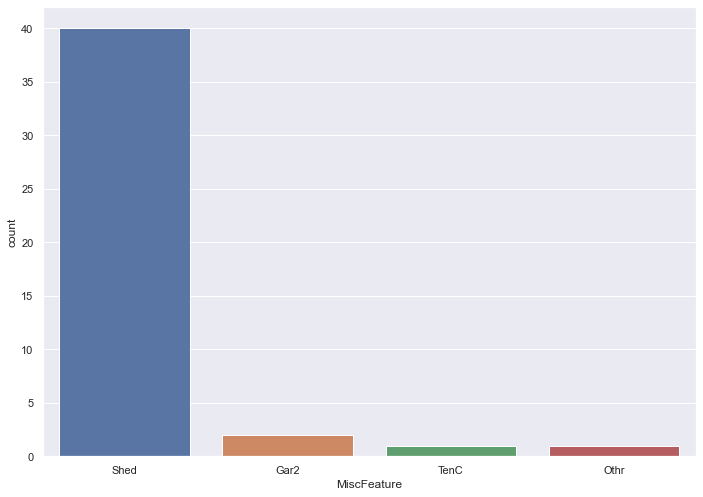

In [10]:
#expolring further into the columns with null values
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.subplots
for i in null_cols:
    if df[i].dtype=='int64' or df[i].dtype=='float64':
        
        print(f'\n-----{i}----')
        print(f'\nnull value count {df[i].isnull().sum()}')
        print(df[i].value_counts())
        sns.histplot(df[i])
        plt.show()
        
        
    else:
        print(f'\n-----{i}----')
        print(f'\nnull value count {df[i].isnull().sum()}')
        print(df[i].value_counts())
        sns.countplot(df[i])
        plt.show()
        
        

--The LotFrontage has 214 null values which shows the value probably in area it is the Linear feet of street connected to property for which the majority of vallues falls between 50 and 100, the null values can be dealt using mean.

--Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
    The catogory has very hign number of null values, gravel alleys are more common with the available data.
    
--MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
        
    the catogory had minimal null variables with Brick Face is the commonly used type after None
    
--MasVnrArea shows area, Masonry veneer area in square feet, the majority of the values are zero with a null count of 7

--BsmtQual- Evaluates the height of the basement, 
       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement, the majority values comes under typical followed by Gd which denotes good

--BsmtCond- 
        Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
                  
    typical is the common basement condition, with 30 null values
                  

--BsmtExposure- has 31 null values, Refers to walkout or garden level walls    
       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
    Majority of the houses in the data does not have the feature
                  
--BsmtFinType1-Type 1 fincshed square feet has 30 null values,majority of the houses are unfinished 
--BsmtFinType2-Rating of basement finished area (if multiple types)
  Most houses are unfinished
--FireplaceQu- null values are 551, followed by houses with fire place quality
--GarageType-64 null values, most houses in the list has attached garage
--GarageYrBlt-64 null values- Many were built around 2006
--GarageFinish-64 null values, many have unfinished garages
--GarageQual-64 null values with majority of the houses with average garage quality
                  
--GarageCond-64 null values,Garage condition, majority of the houses has average garage condition
--PoolQC
--Fence
--MiscFeature
    high number of null values can be ignored

In [11]:
#droping columns

li=['PoolQC','Fence','MiscFeature','Id','FireplaceQu','Alley']
for i in li:
    df.drop([i],inplace=True,axis=1)

In [12]:
#replacing the null values

df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])


<AxesSubplot:>

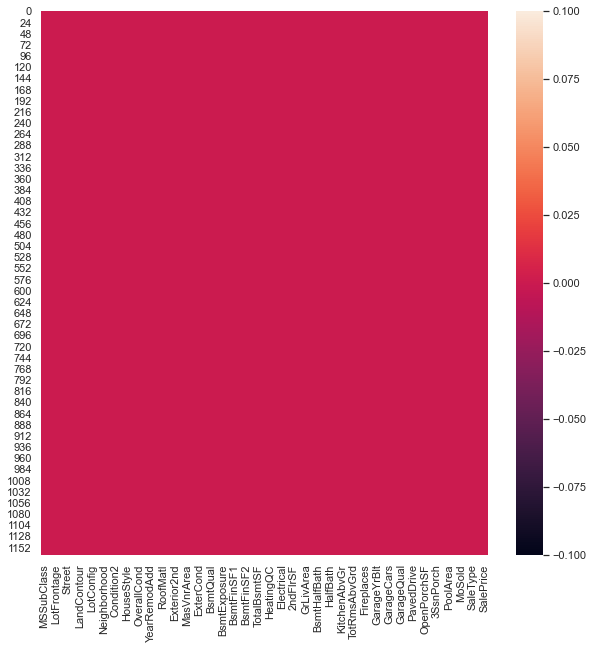

In [13]:
#checking the null values again

plt.figure(figsize = (10,10))
sns.heatmap(df.isnull())

All the null values has been assigned a value

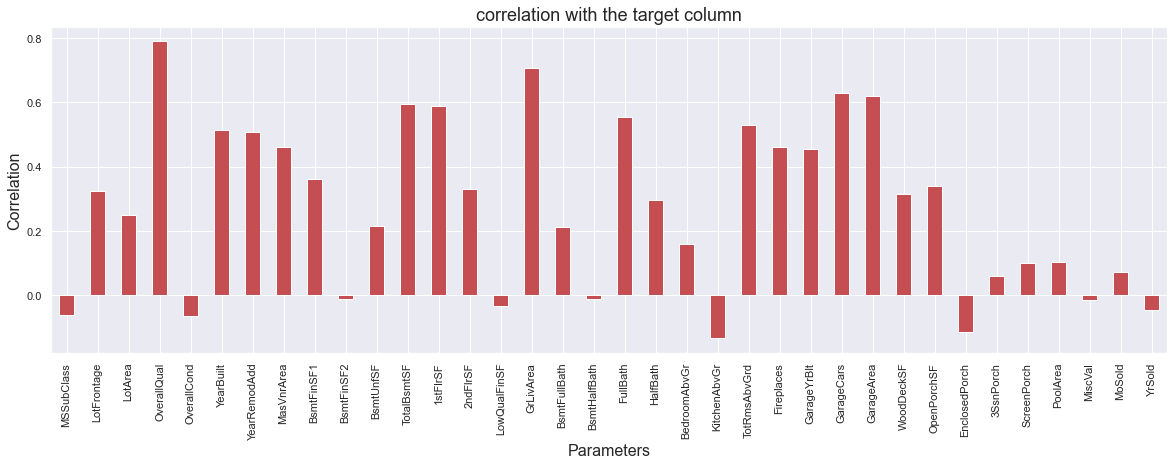

In [14]:
#plotting the correlation to the target variable
dfcor=df.corr()
plt.figure(figsize = (20,6))
dfcor['SalePrice'].drop(['SalePrice']).plot(kind = 'bar', color = 'r')
plt.xlabel('Parameters', fontsize = 16)
plt.ylabel('Correlation', fontsize = 16)
plt.title('correlation with the target column', fontsize = 18)
plt.show()

As the plot suggests mnay of the columns has a possitive correlation to the target variable

In [15]:
#plotting the columns with possitive correlation to the target variable
k=dfcor['SalePrice'].sort_values(ascending=False)
k   

SalePrice        1.000000
OverallQual      0.789185
GrLivArea        0.707300
GarageCars       0.628329
GarageArea       0.619000
TotalBsmtSF      0.595042
1stFlrSF         0.587642
FullBath         0.554988
TotRmsAbvGrd     0.528363
YearBuilt        0.514408
YearRemodAdd     0.507831
MasVnrArea       0.460535
Fireplaces       0.459611
GarageYrBlt      0.453840
BsmtFinSF1       0.362874
OpenPorchSF      0.339500
2ndFlrSF         0.330386
LotFrontage      0.323851
WoodDeckSF       0.315444
HalfBath         0.295592
LotArea          0.249499
BsmtUnfSF        0.215724
BsmtFullBath     0.212924
BedroomAbvGr     0.158281
PoolArea         0.103280
ScreenPorch      0.100284
MoSold           0.072764
3SsnPorch        0.060119
BsmtFinSF2      -0.010151
BsmtHalfBath    -0.011109
MiscVal         -0.013071
LowQualFinSF    -0.032381
YrSold          -0.045508
MSSubClass      -0.060775
OverallCond     -0.065642
EnclosedPorch   -0.115004
KitchenAbvGr    -0.132108
Name: SalePrice, dtype: float64

In [16]:
#catogorizing the columns based on their correlation to the target
poscor=['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt', 'YearRemodAdd','MasVnrArea', 'Fireplaces','GarageYrBlt','BsmtFinSF1', 'OpenPorchSF', '2ndFlrSF', 'LotFrontage','WoodDeckSF','HalfBath','BsmtUnfSF','BsmtFullBath','BedroomAbvGr','PoolArea', 'ScreenPorch', 'MoSold','3SsnPorch']
negcor=['BsmtFinSF2','BsmtHalfBath','MiscVal','LowQualFinSF','YrSold','MSSubClass','OverallCond','EnclosedPorch','KitchenAbvGr']

OverallQual vs saleprice
5     314
6     295
7     260
8     138
4      93
9      32
3      16
10     15
2       3
1       2
Name: OverallQual, dtype: int64


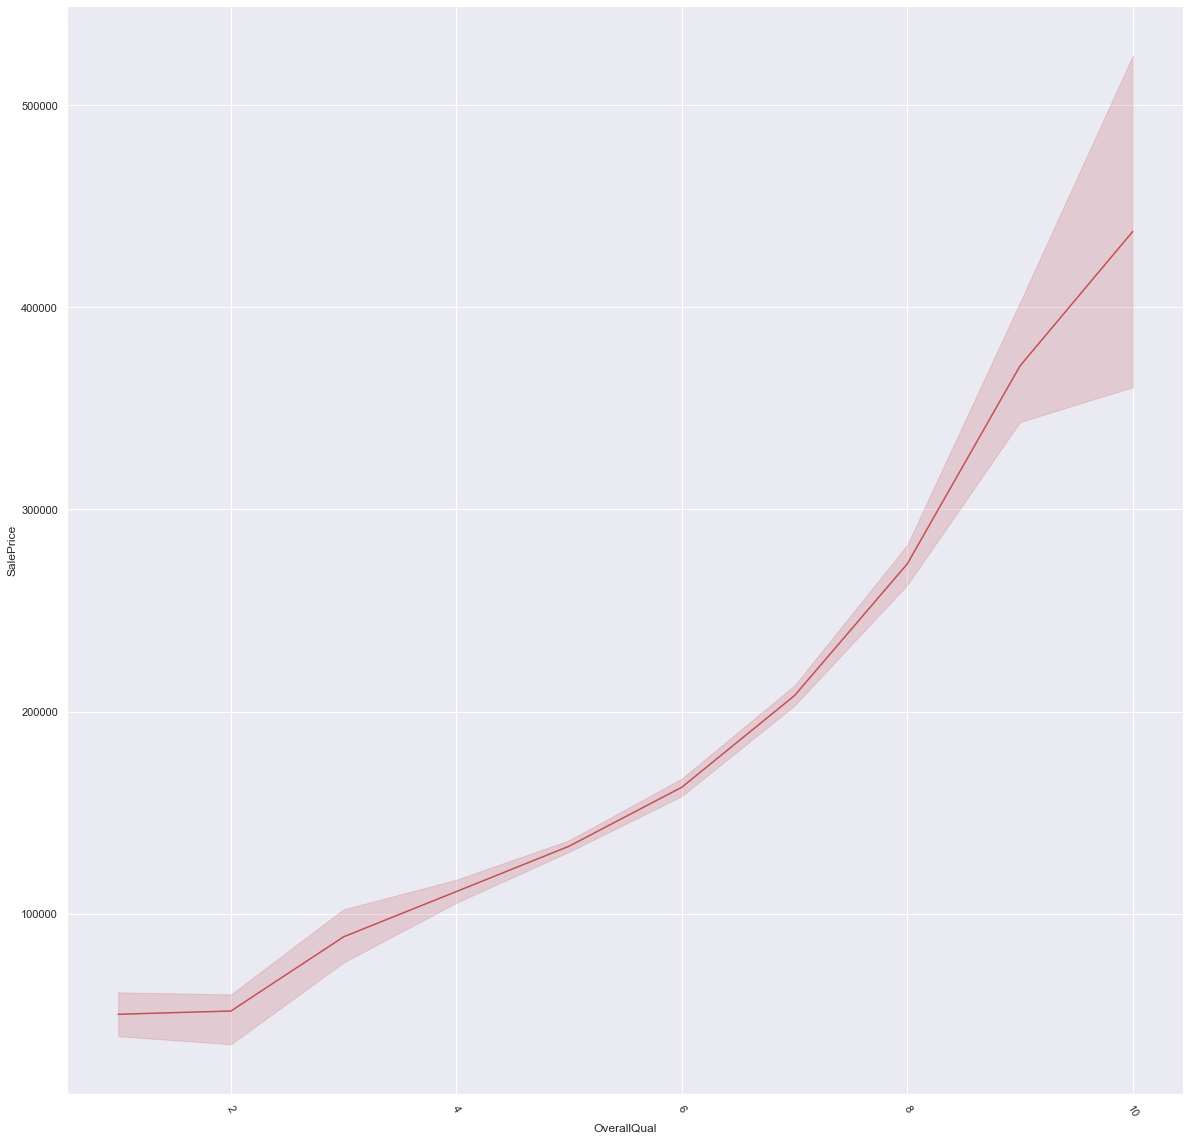

GrLivArea vs saleprice
864     16
1040    11
894     10
1456     9
1200     8
        ..
1610     1
2576     1
2810     1
1691     1
1509     1
Name: GrLivArea, Length: 746, dtype: int64


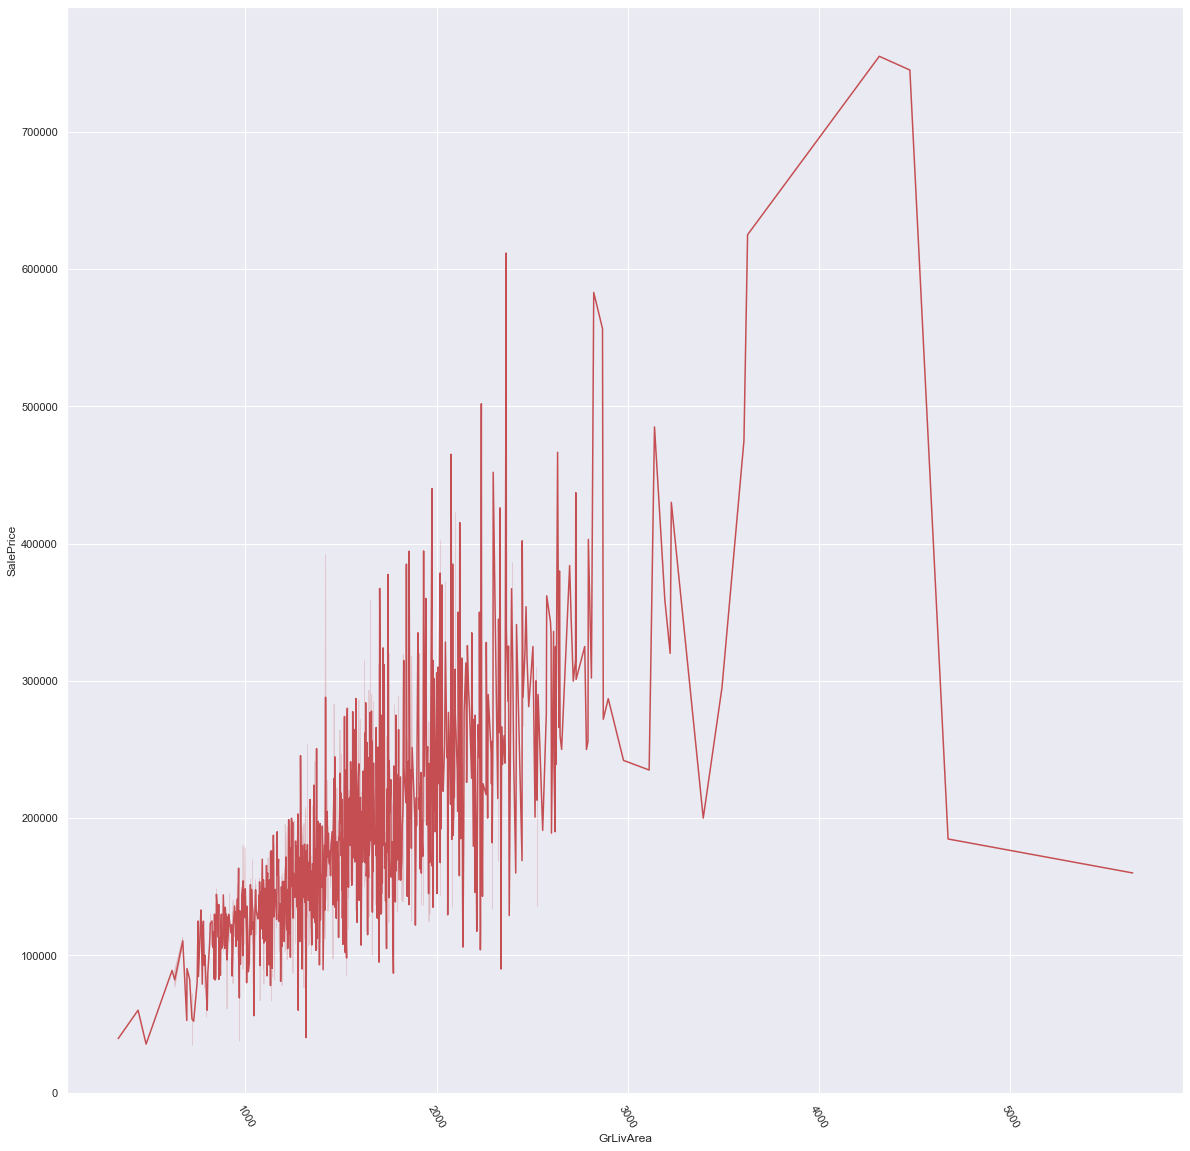

GarageCars vs saleprice
2    665
1    288
3    147
0     64
4      4
Name: GarageCars, dtype: int64


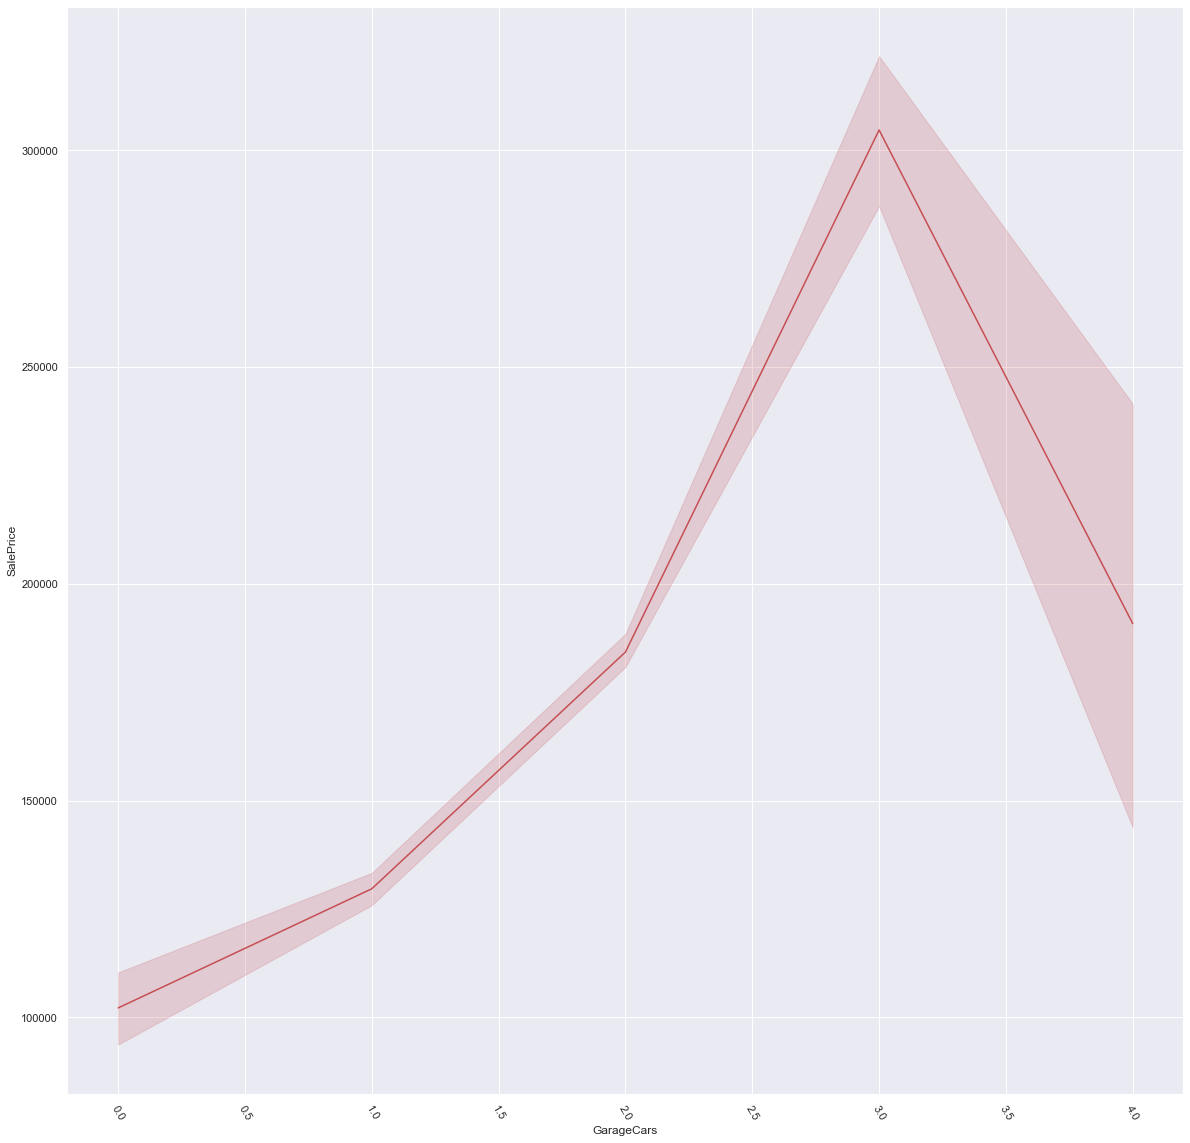

GarageArea vs saleprice
0      64
440    44
576    39
240    31
528    26
       ..
748     1
433     1
818     1
604     1
250     1
Name: GarageArea, Length: 392, dtype: int64


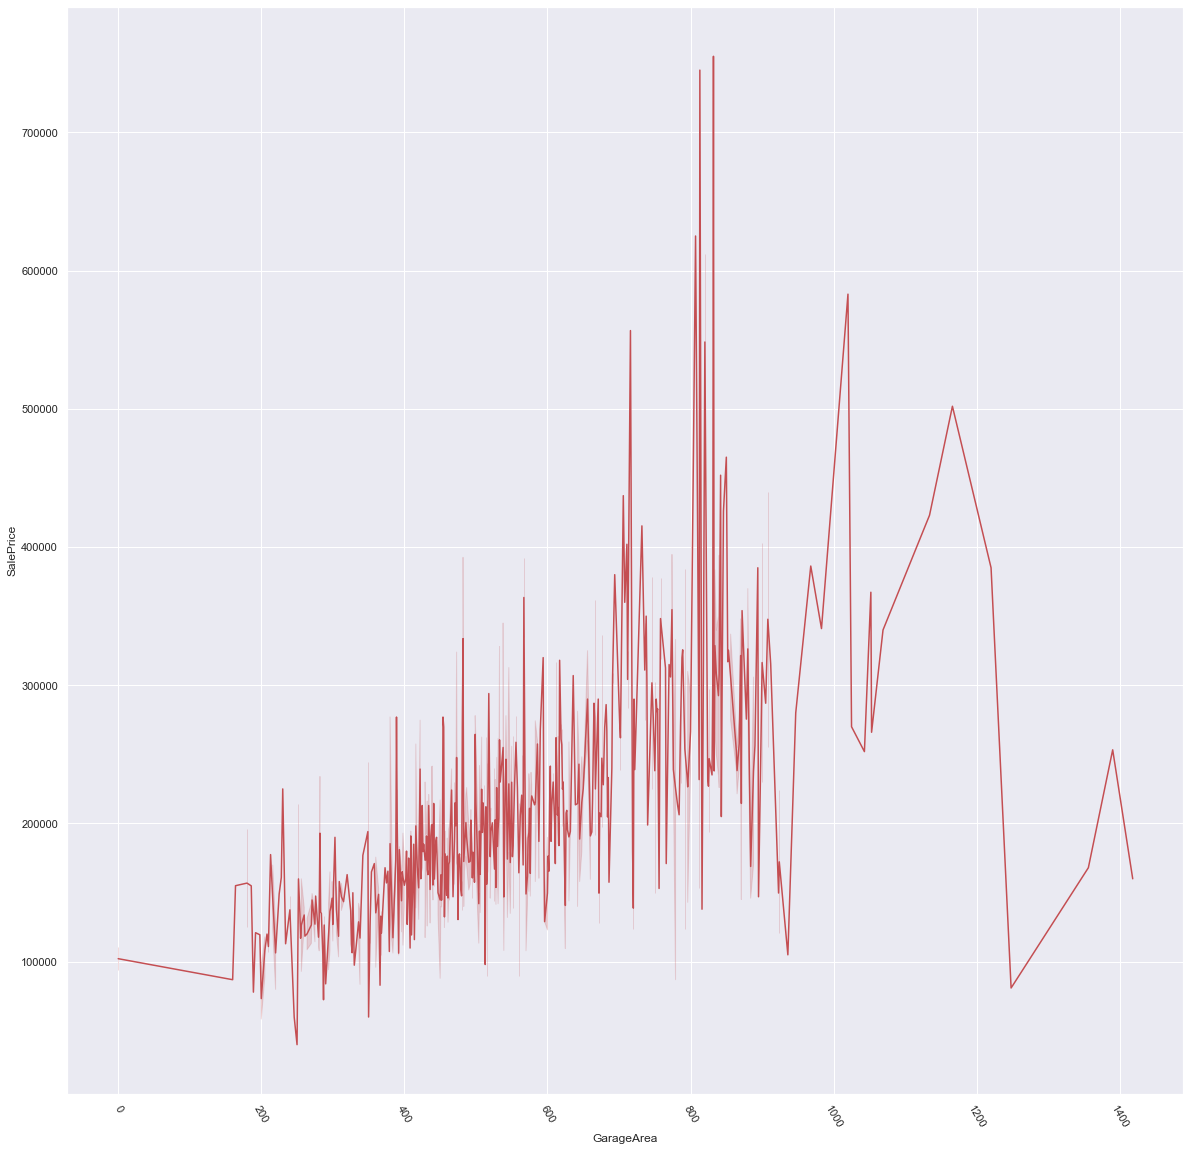

TotalBsmtSF vs saleprice
0       30
864     28
912     13
672     13
816     12
        ..
319      1
1318     1
1198     1
1251     1
1582     1
Name: TotalBsmtSF, Length: 636, dtype: int64


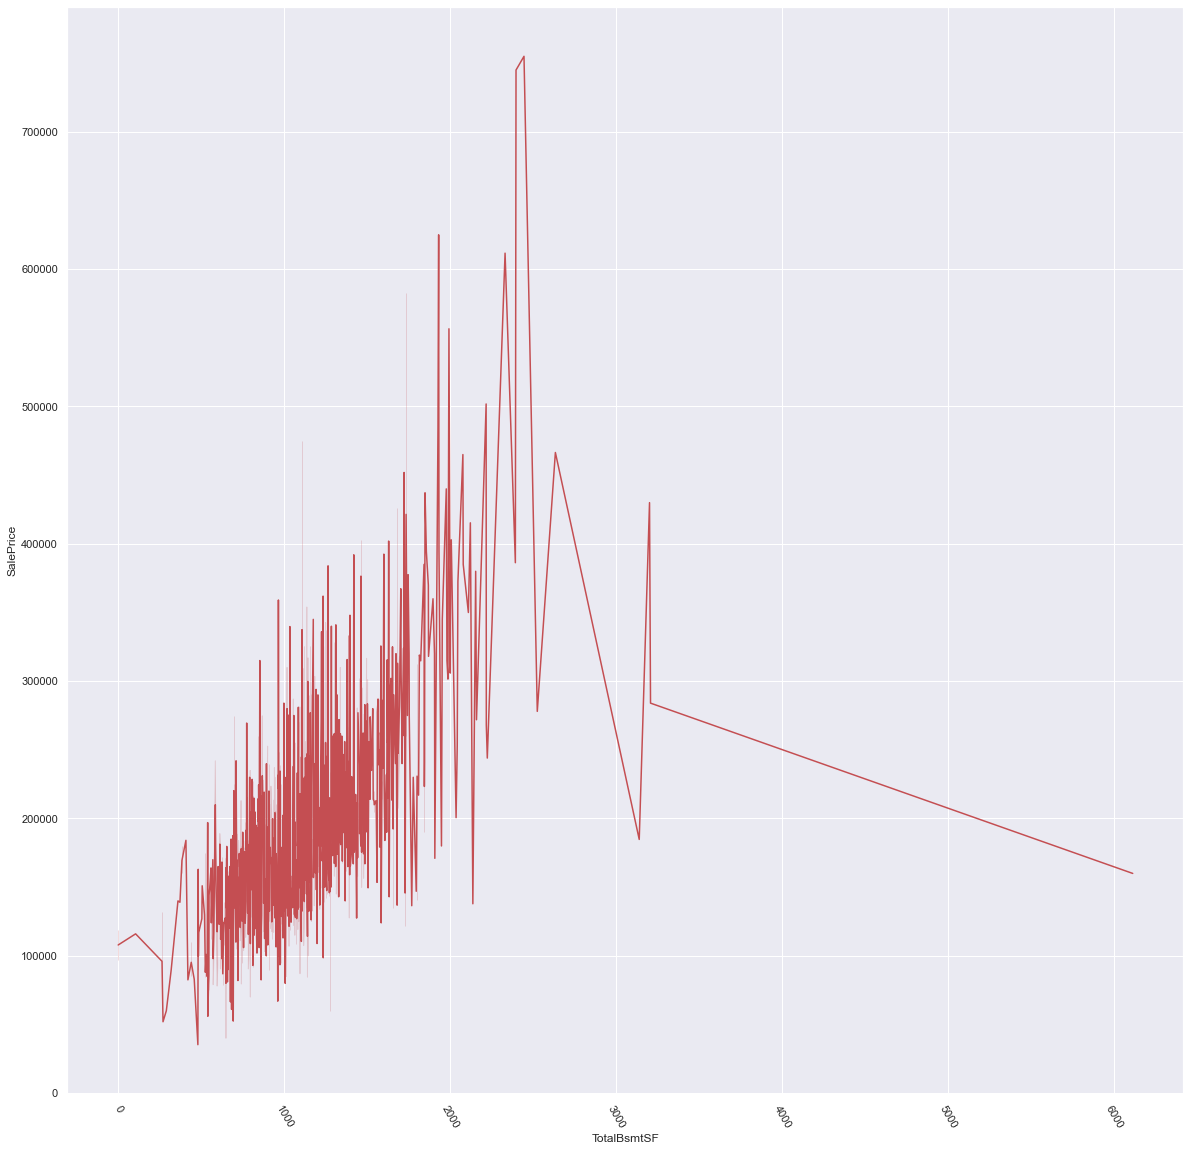

1stFlrSF vs saleprice
864     19
1040    13
912     12
894     10
848      9
        ..
1516     1
813      1
2633     1
1015     1
807      1
Name: 1stFlrSF, Length: 669, dtype: int64


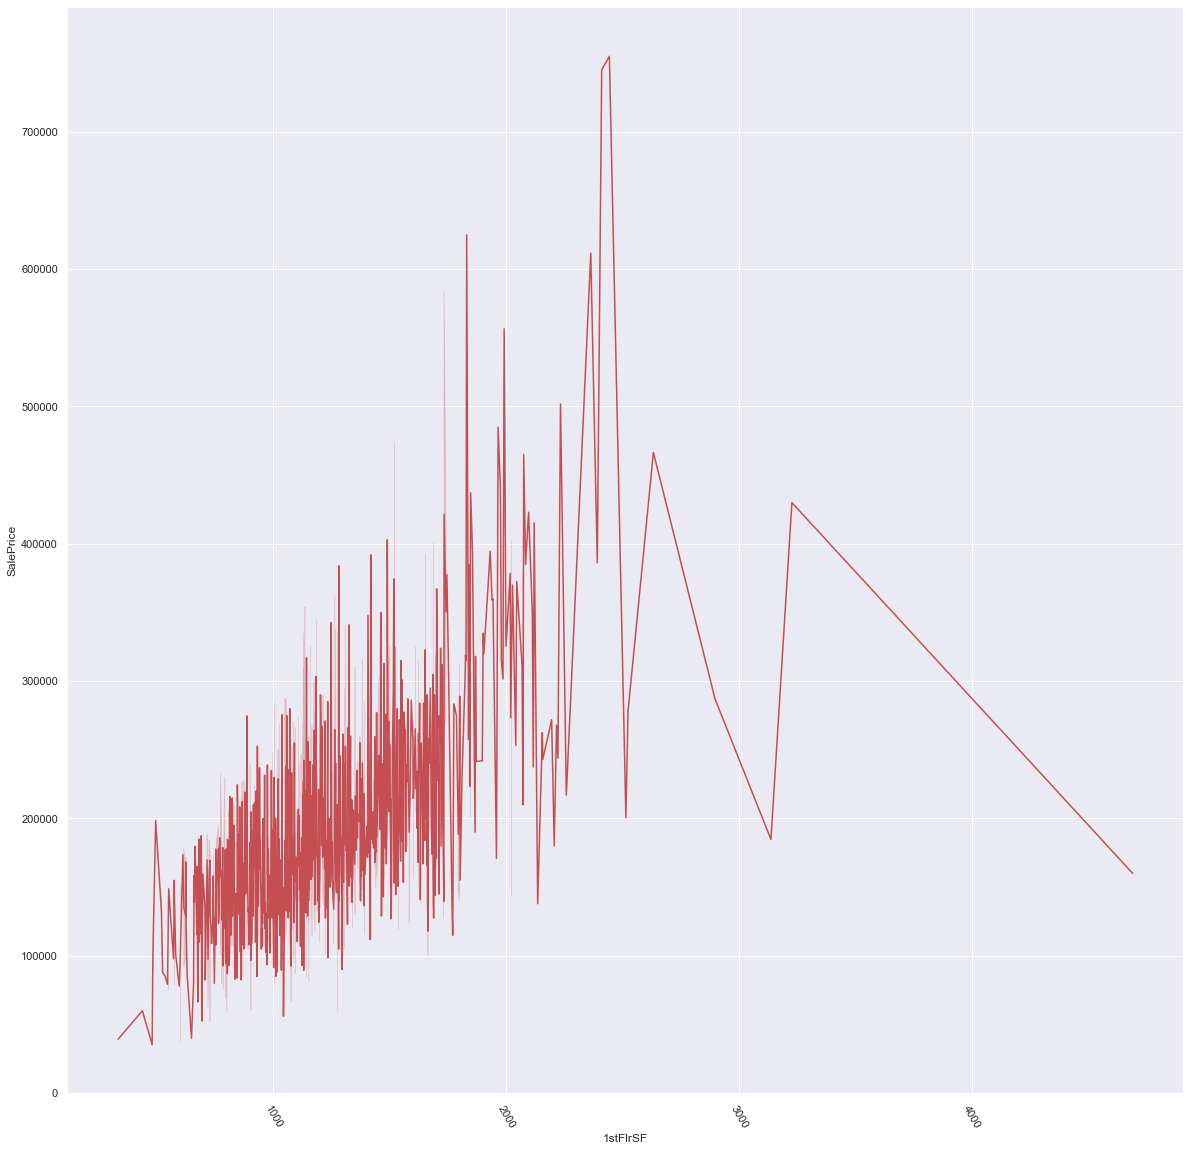

FullBath vs saleprice
2    610
1    524
3     27
0      7
Name: FullBath, dtype: int64


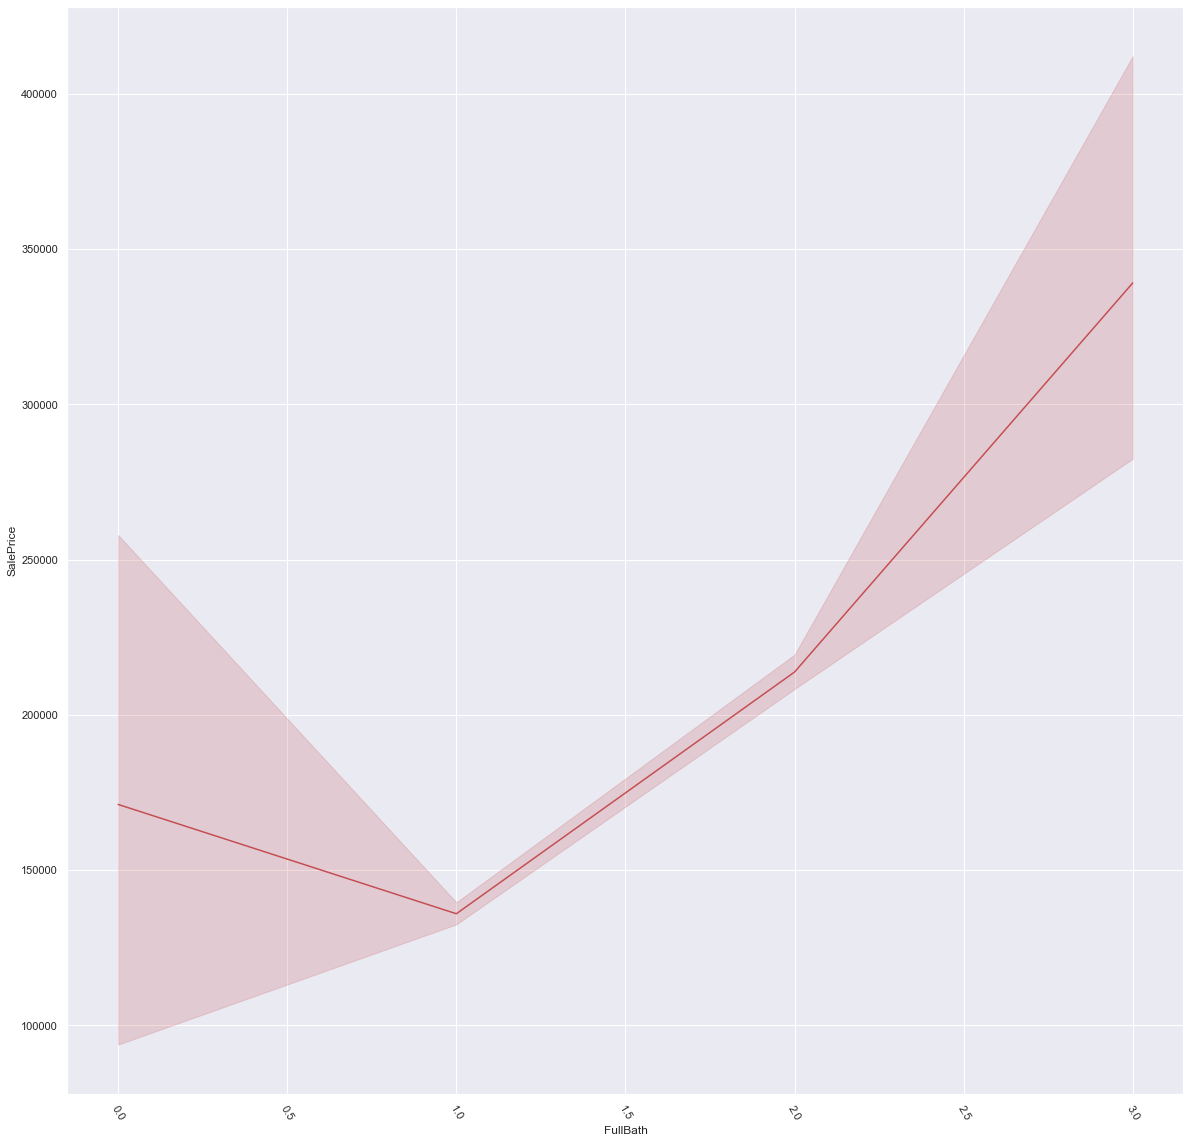

TotRmsAbvGrd vs saleprice
6     325
7     268
5     217
8     148
4      72
9      65
10     41
11     13
3      11
12      6
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64


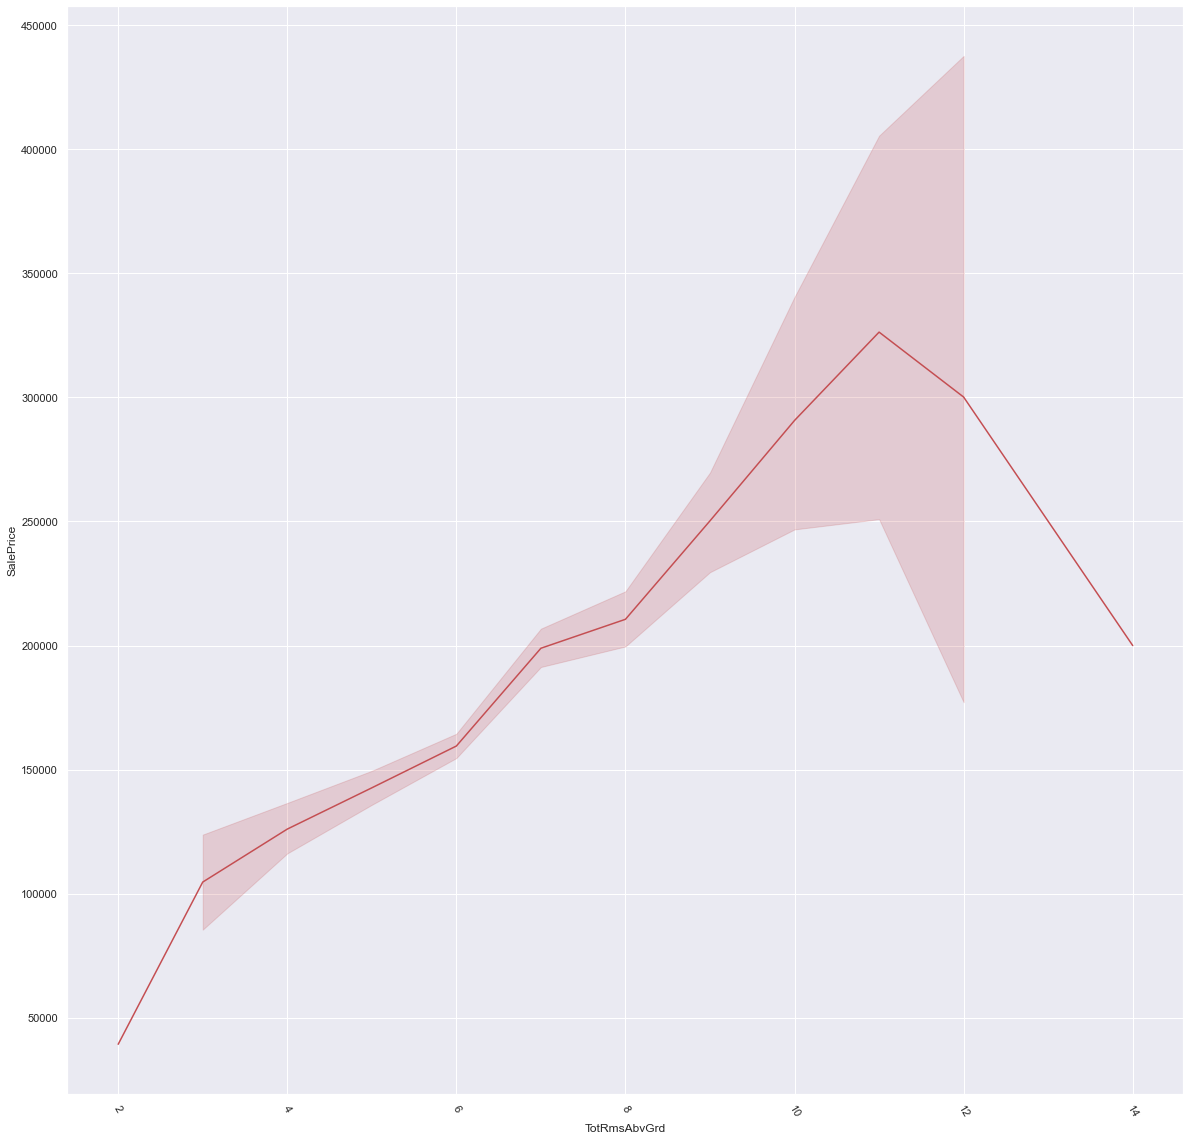

YearBuilt vs saleprice
2006    57
2005    51
2007    41
2004    37
2003    33
        ..
1927     1
1911     1
2010     1
1892     1
1913     1
Name: YearBuilt, Length: 110, dtype: int64


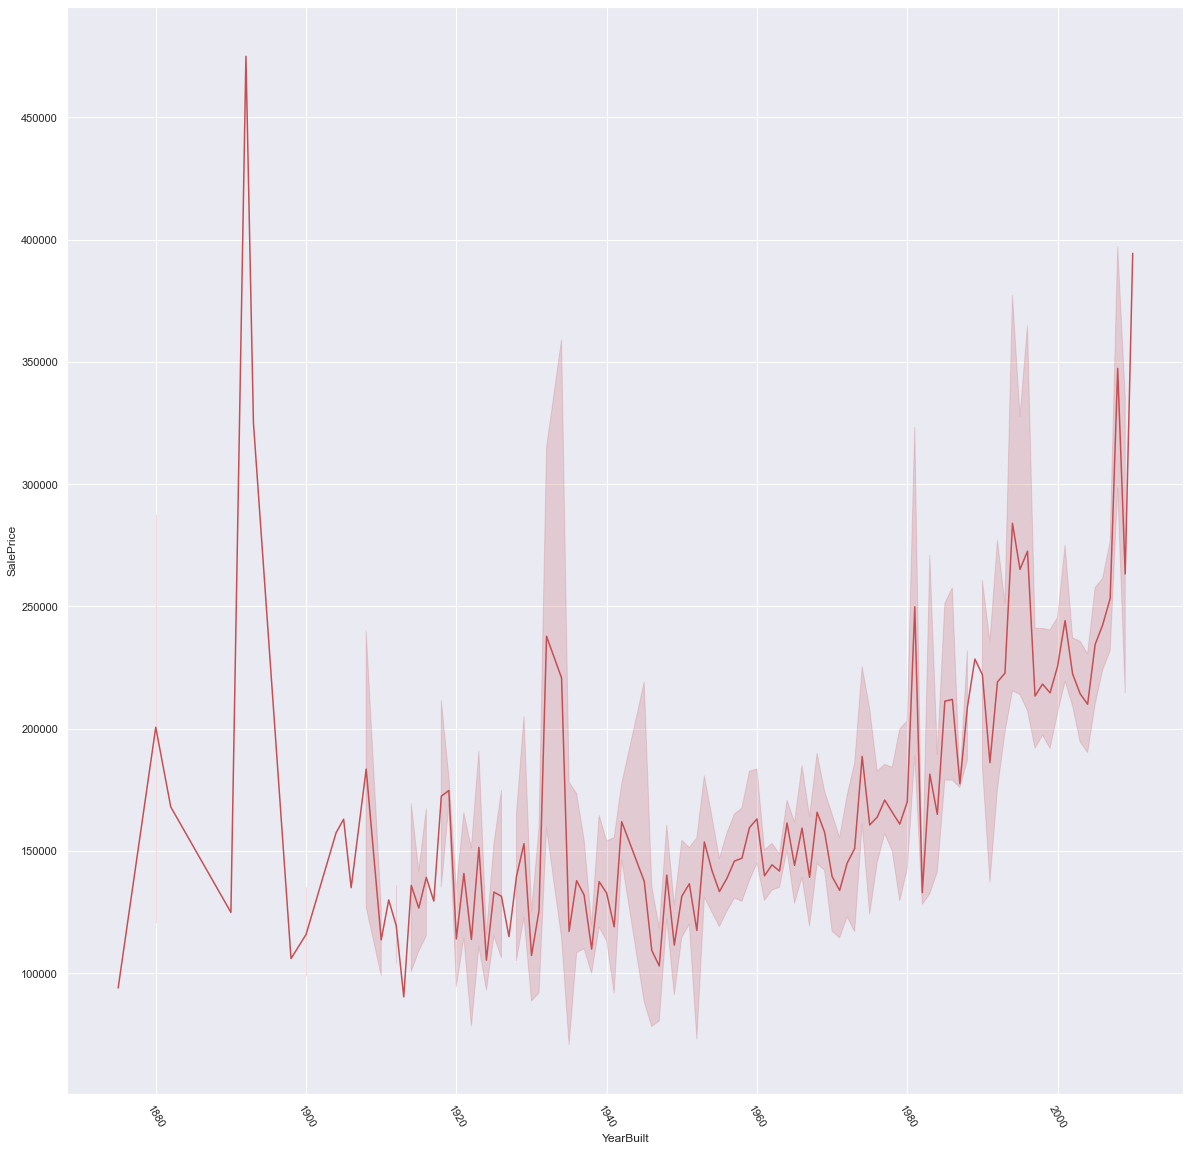

YearRemodAdd vs saleprice
1950    146
2006     82
2007     64
2005     57
2004     46
       ... 
1984      5
1951      4
1983      4
1952      4
1974      4
Name: YearRemodAdd, Length: 61, dtype: int64


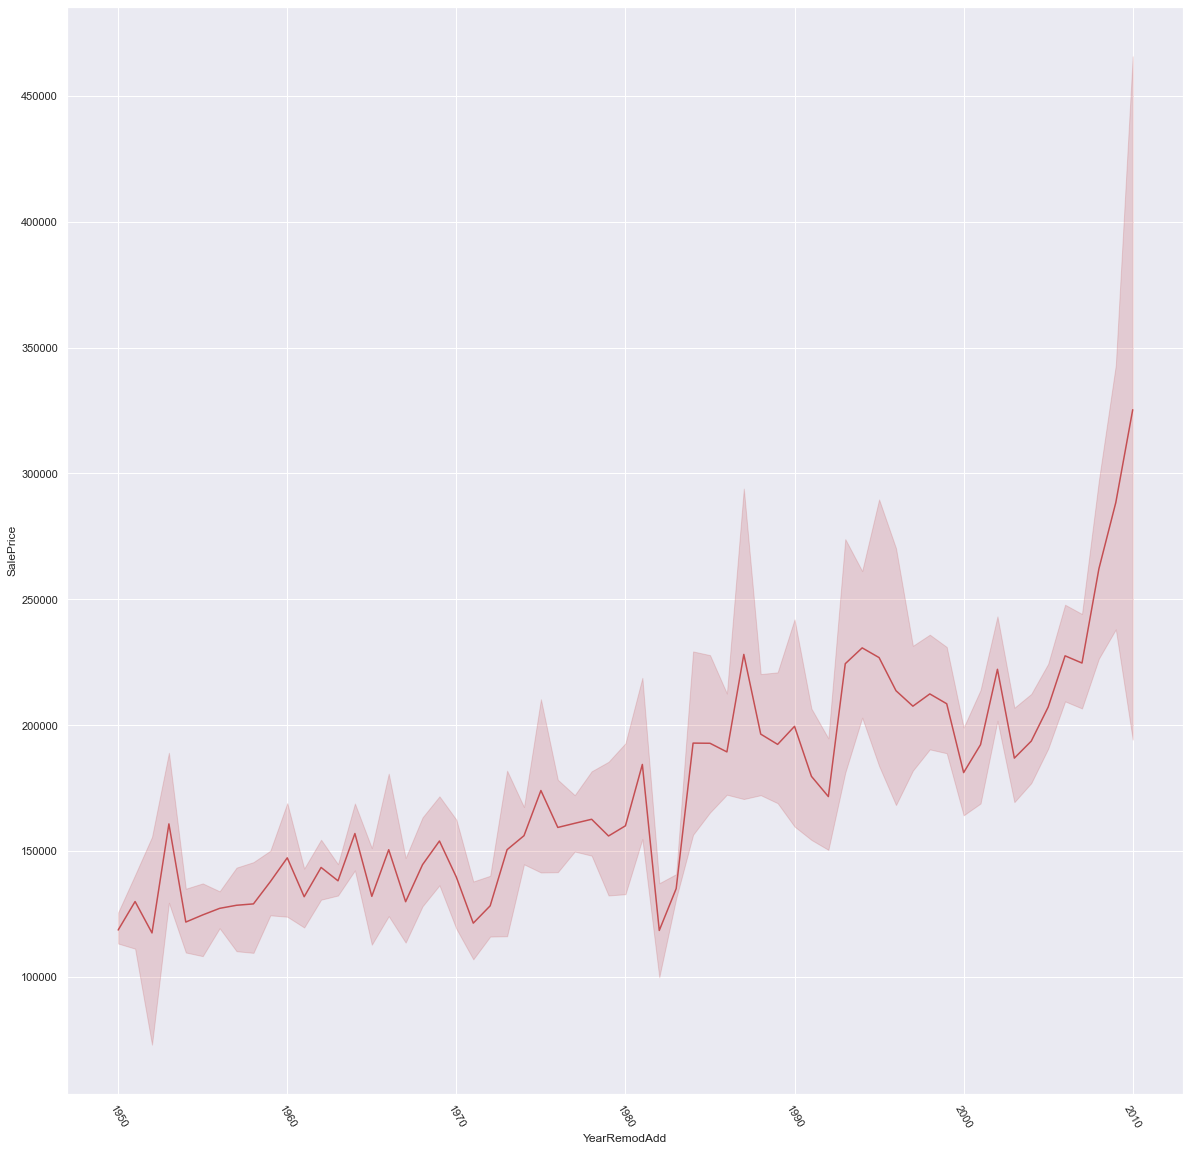

MasVnrArea vs saleprice
0.0      699
72.0       7
180.0      6
120.0      6
106.0      5
        ... 
653.0      1
975.0      1
226.0      1
204.0      1
31.0       1
Name: MasVnrArea, Length: 283, dtype: int64


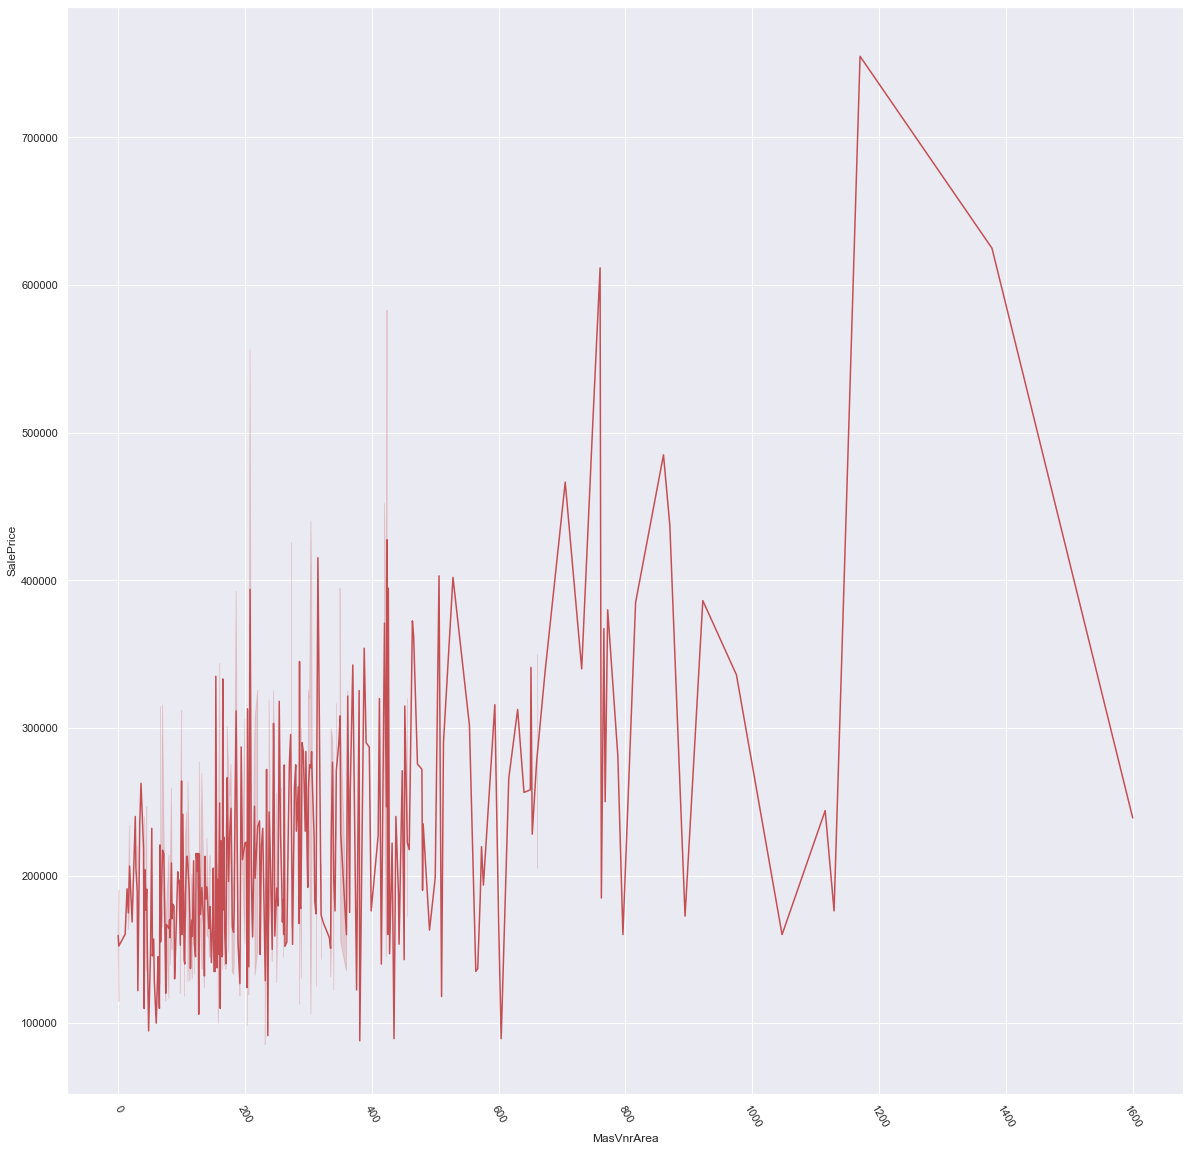

Fireplaces vs saleprice
0    551
1    518
2     94
3      5
Name: Fireplaces, dtype: int64


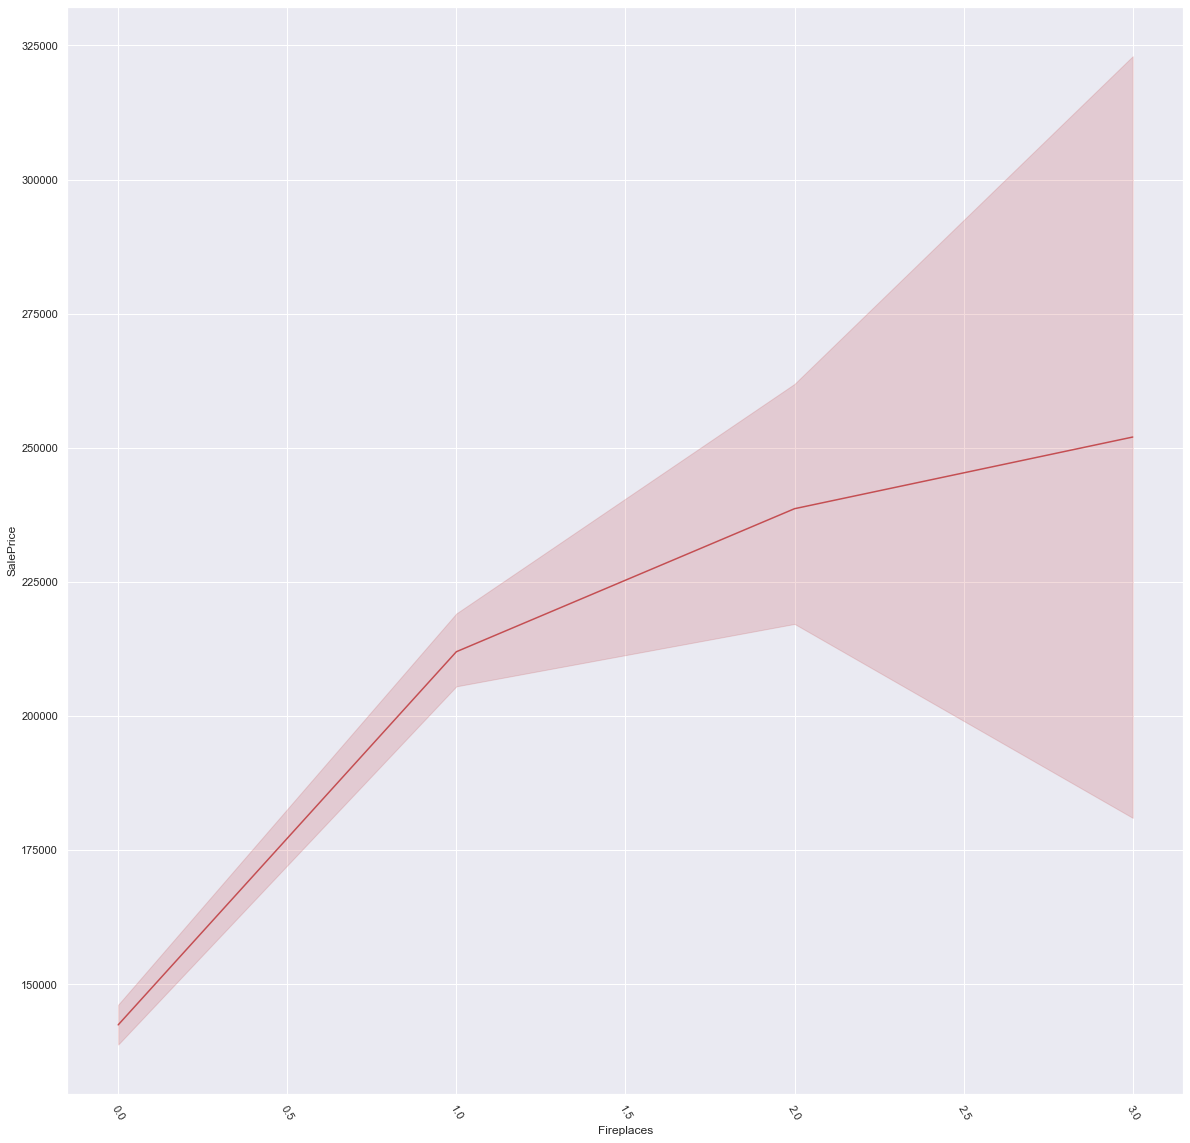

GarageYrBlt vs saleprice
1980.0    76
2006.0    52
2005.0    51
2007.0    40
2003.0    37
          ..
1900.0     1
1927.0     1
1908.0     1
1933.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64


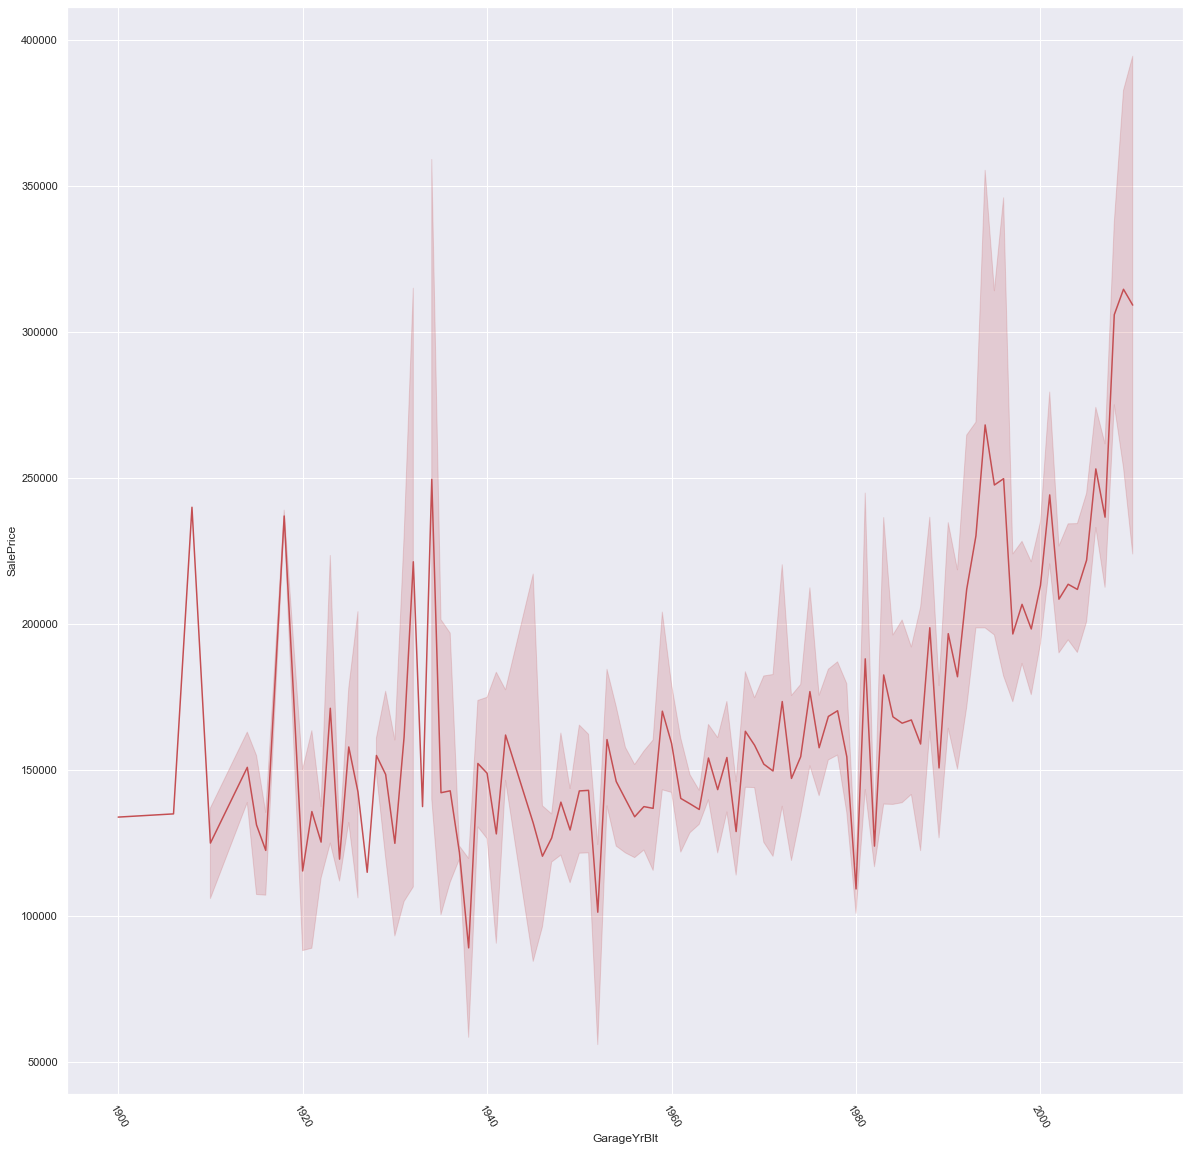

BsmtFinSF1 vs saleprice
0      375
24      10
16       8
20       5
616      5
      ... 
586      1
412      1
416      1
602      1
457      1
Name: BsmtFinSF1, Length: 551, dtype: int64


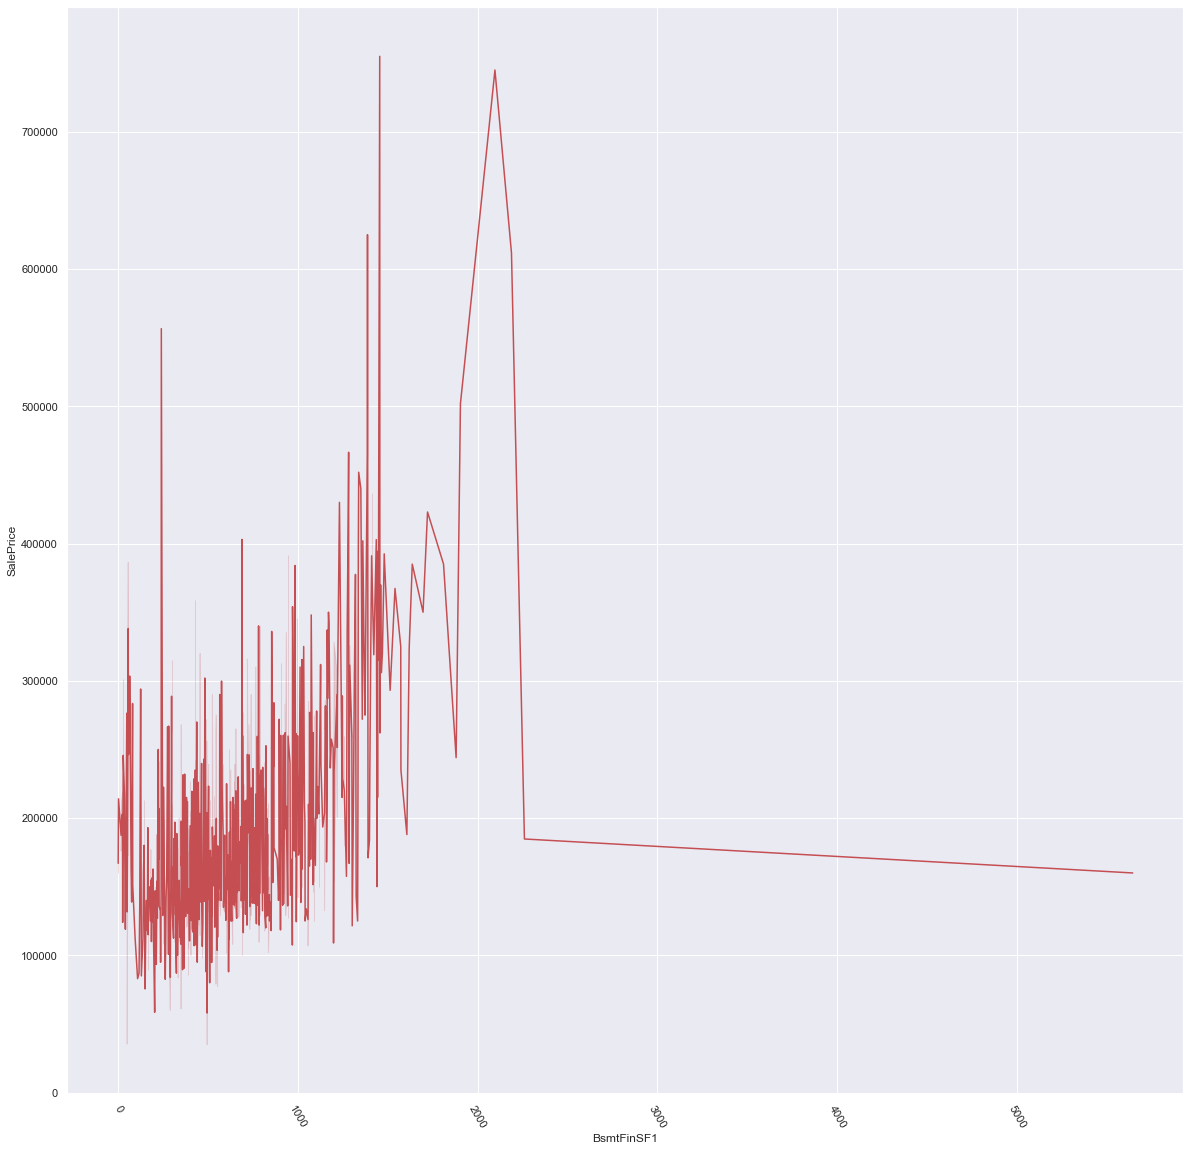

OpenPorchSF vs saleprice
0      531
36      24
48      18
20      17
39      14
      ... 
406      1
176      1
137      1
135      1
15       1
Name: OpenPorchSF, Length: 176, dtype: int64


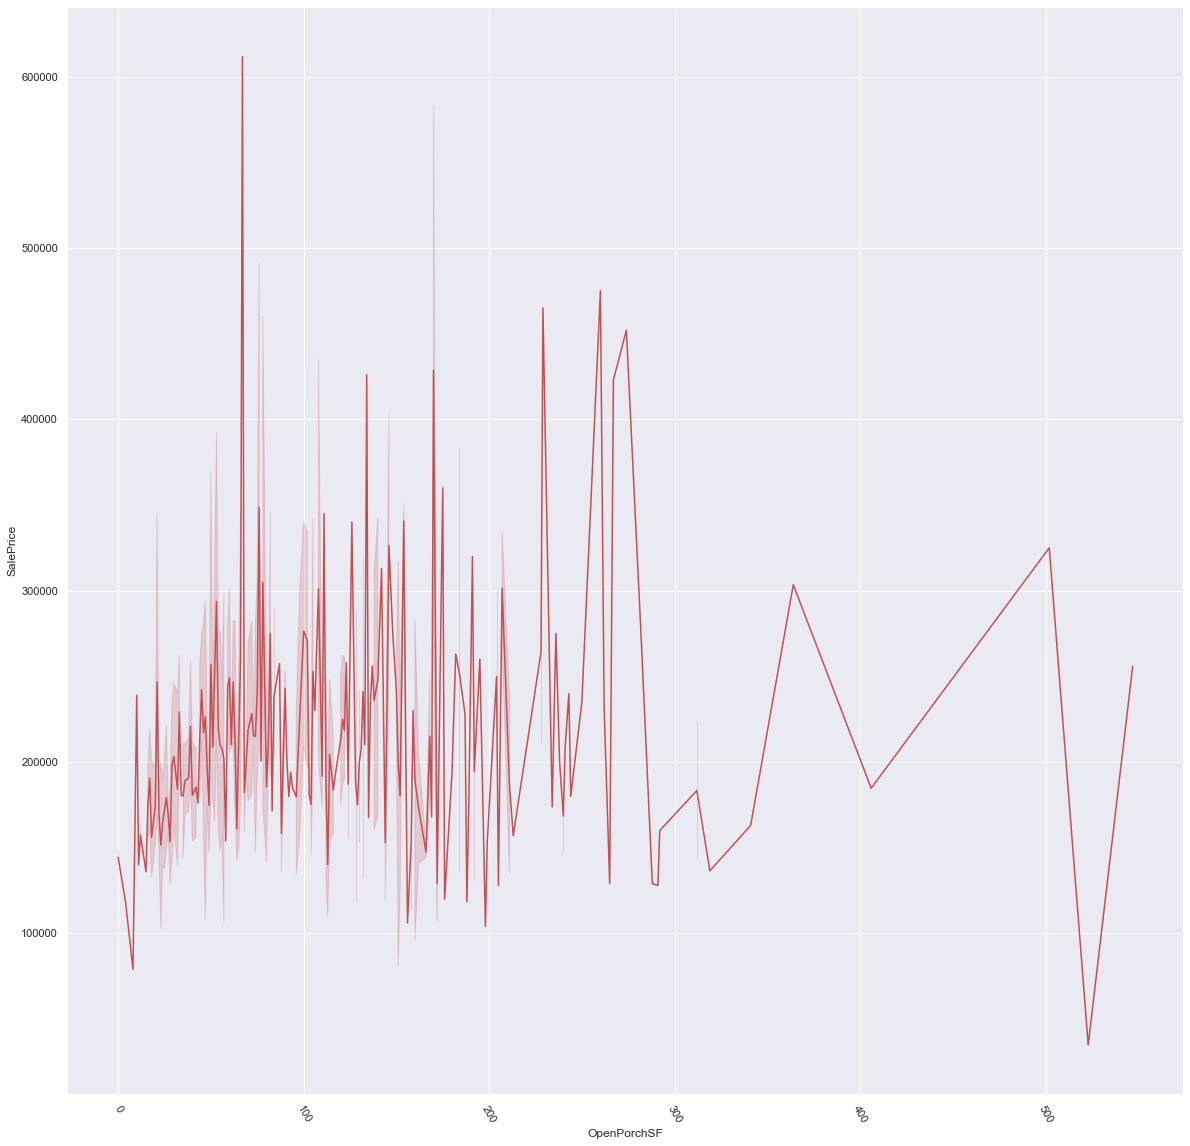

2ndFlrSF vs saleprice
0       663
728       9
504       7
600       6
672       6
       ... 
1066      1
467       1
1038      1
881       1
978       1
Name: 2ndFlrSF, Length: 351, dtype: int64


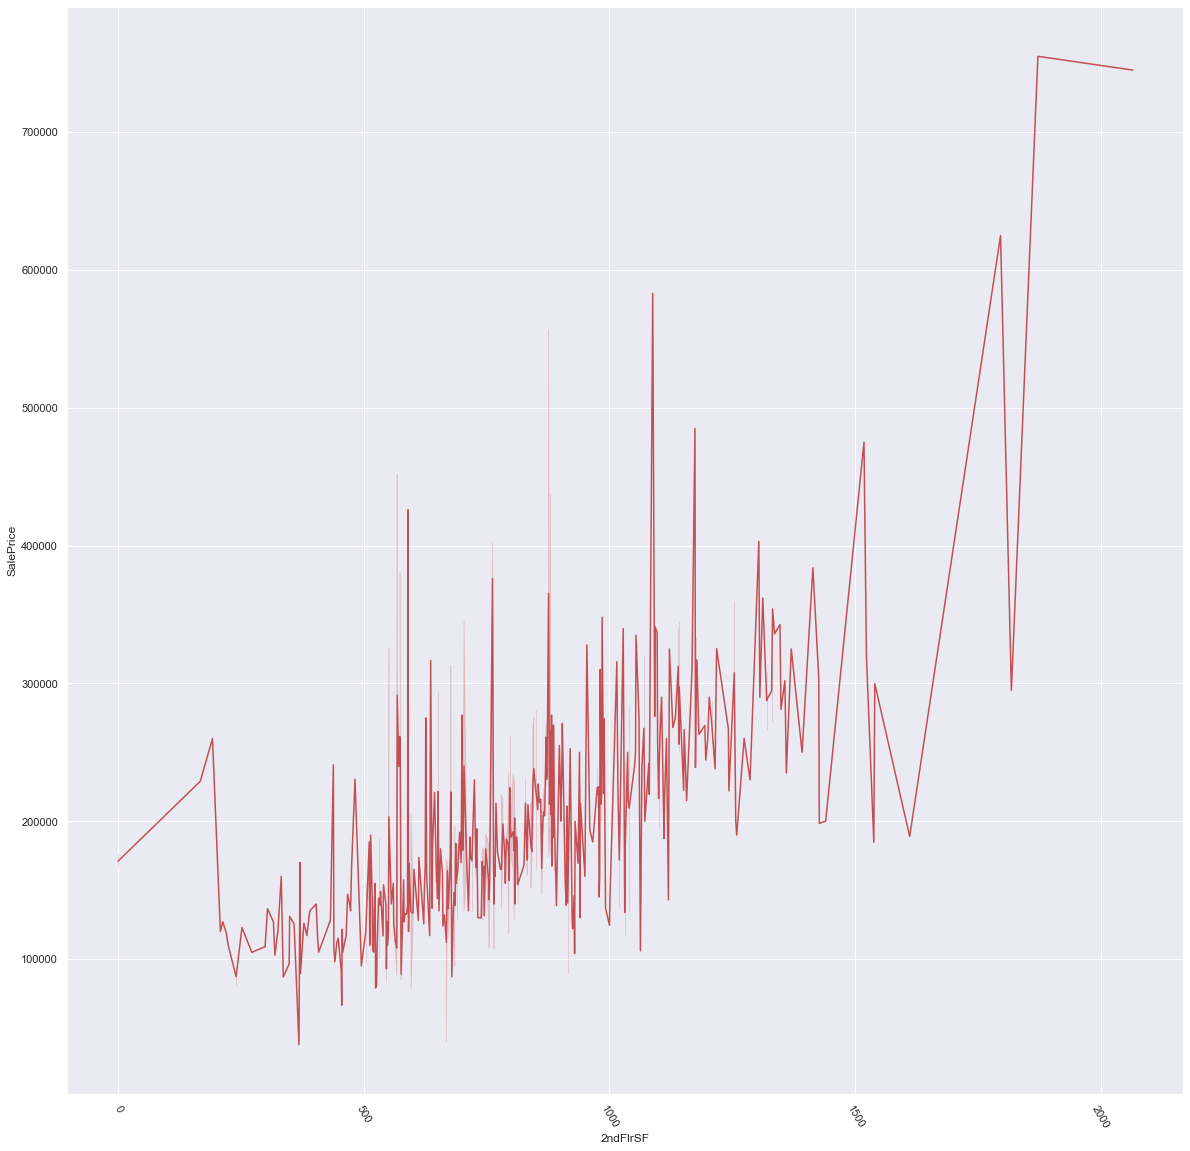

LotFrontage vs saleprice
70.0     272
60.0     111
80.0      60
75.0      46
50.0      44
        ... 
102.0      1
144.0      1
112.0      1
149.0      1
153.0      1
Name: LotFrontage, Length: 106, dtype: int64


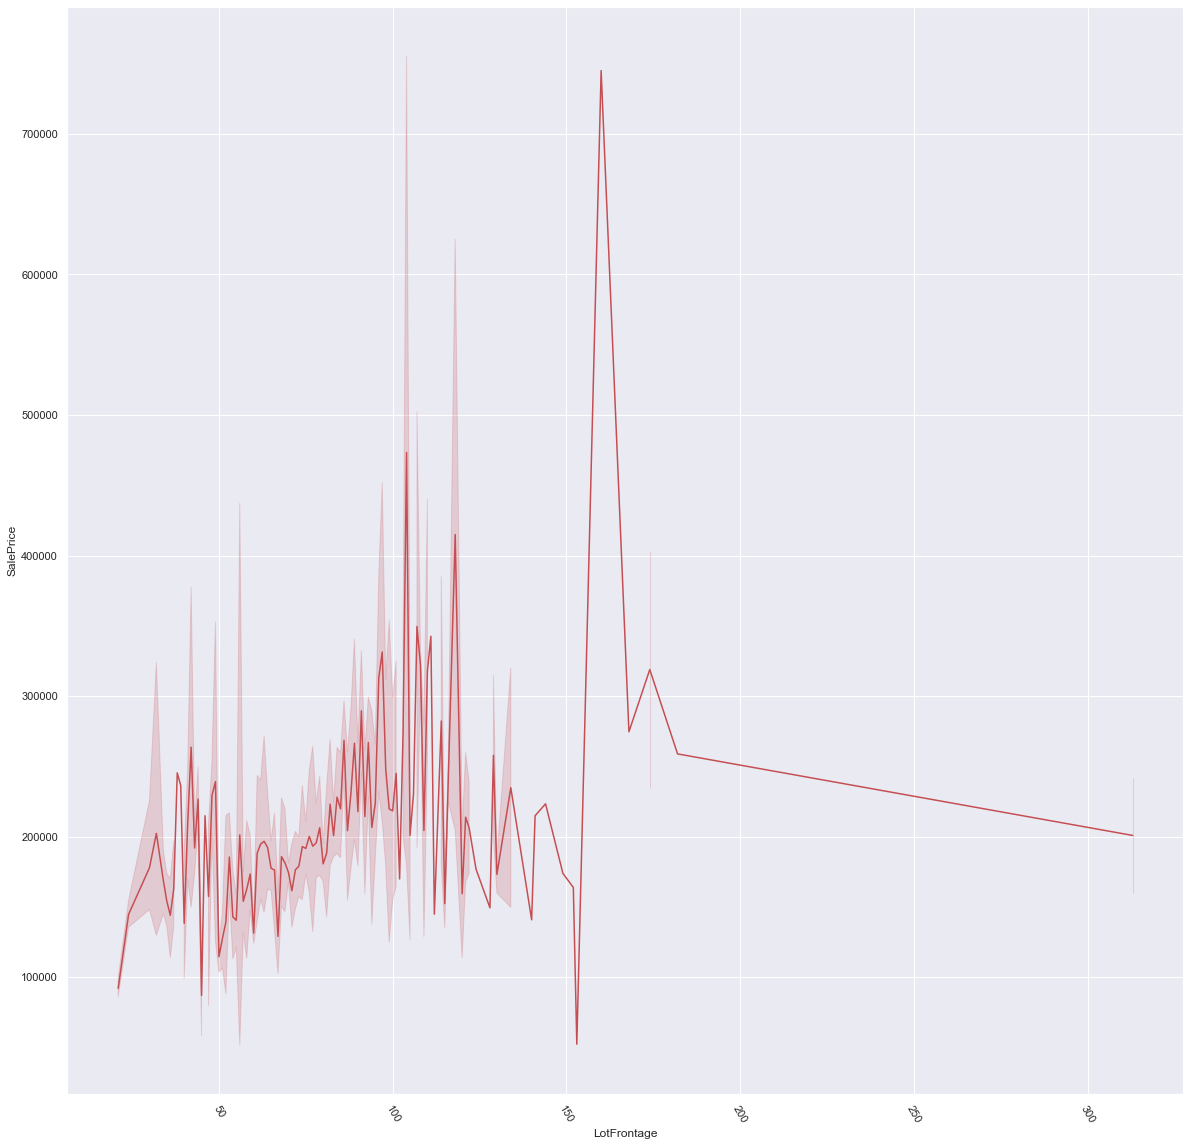

WoodDeckSF vs saleprice
0      603
144     29
192     28
100     26
120     25
      ... 
278      1
70       1
351      1
314      1
87       1
Name: WoodDeckSF, Length: 244, dtype: int64


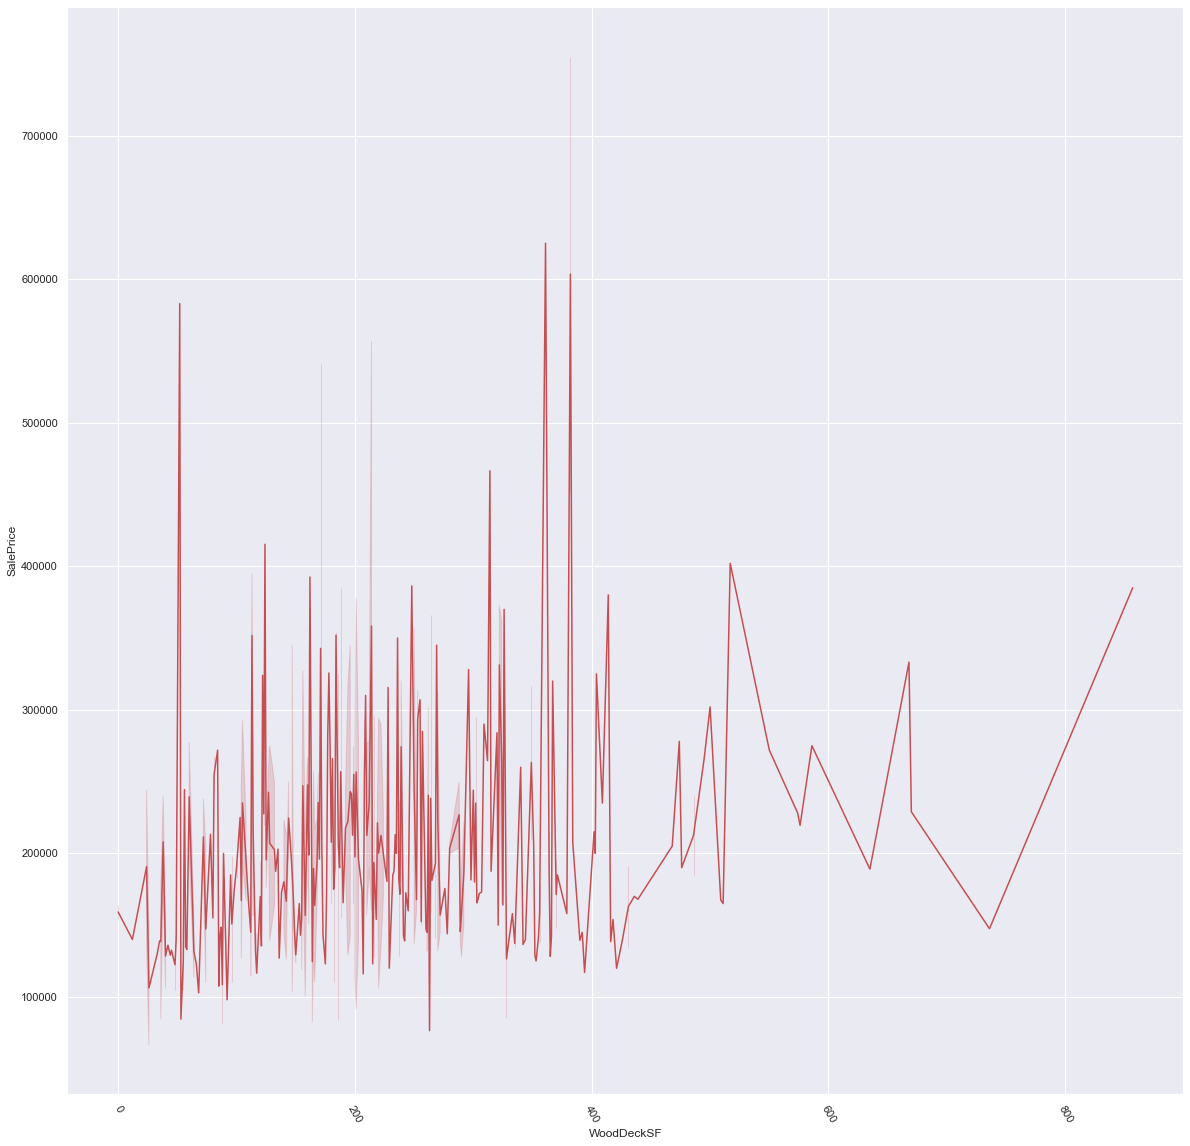

HalfBath vs saleprice
0    724
1    434
2     10
Name: HalfBath, dtype: int64


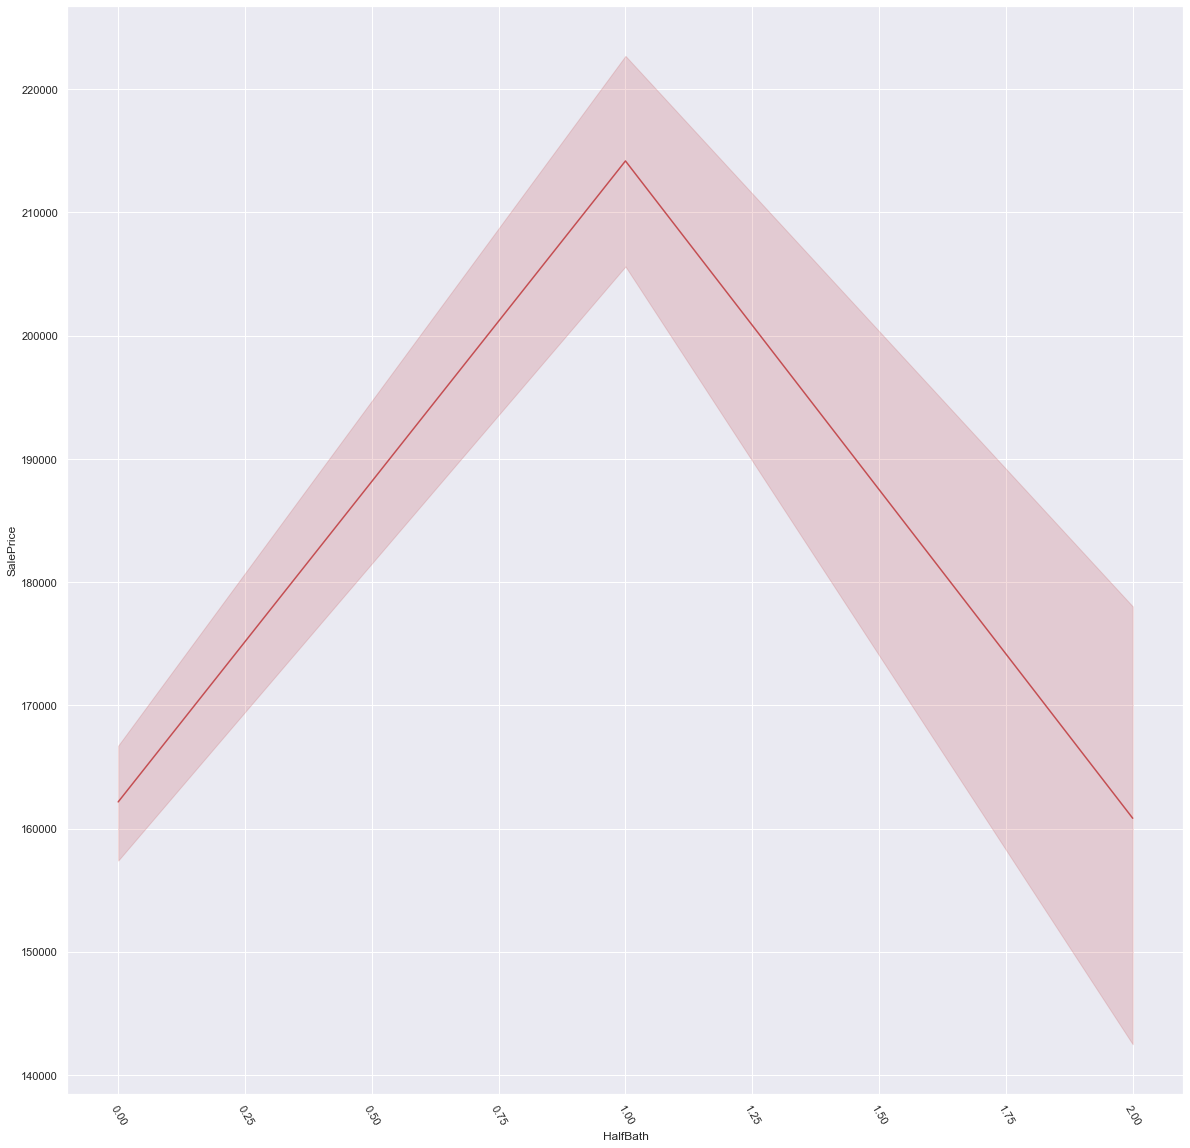

BsmtUnfSF vs saleprice
0      97
728     8
440     6
600     6
300     6
       ..
323     1
487     1
349     1
793     1
649     1
Name: BsmtUnfSF, Length: 681, dtype: int64


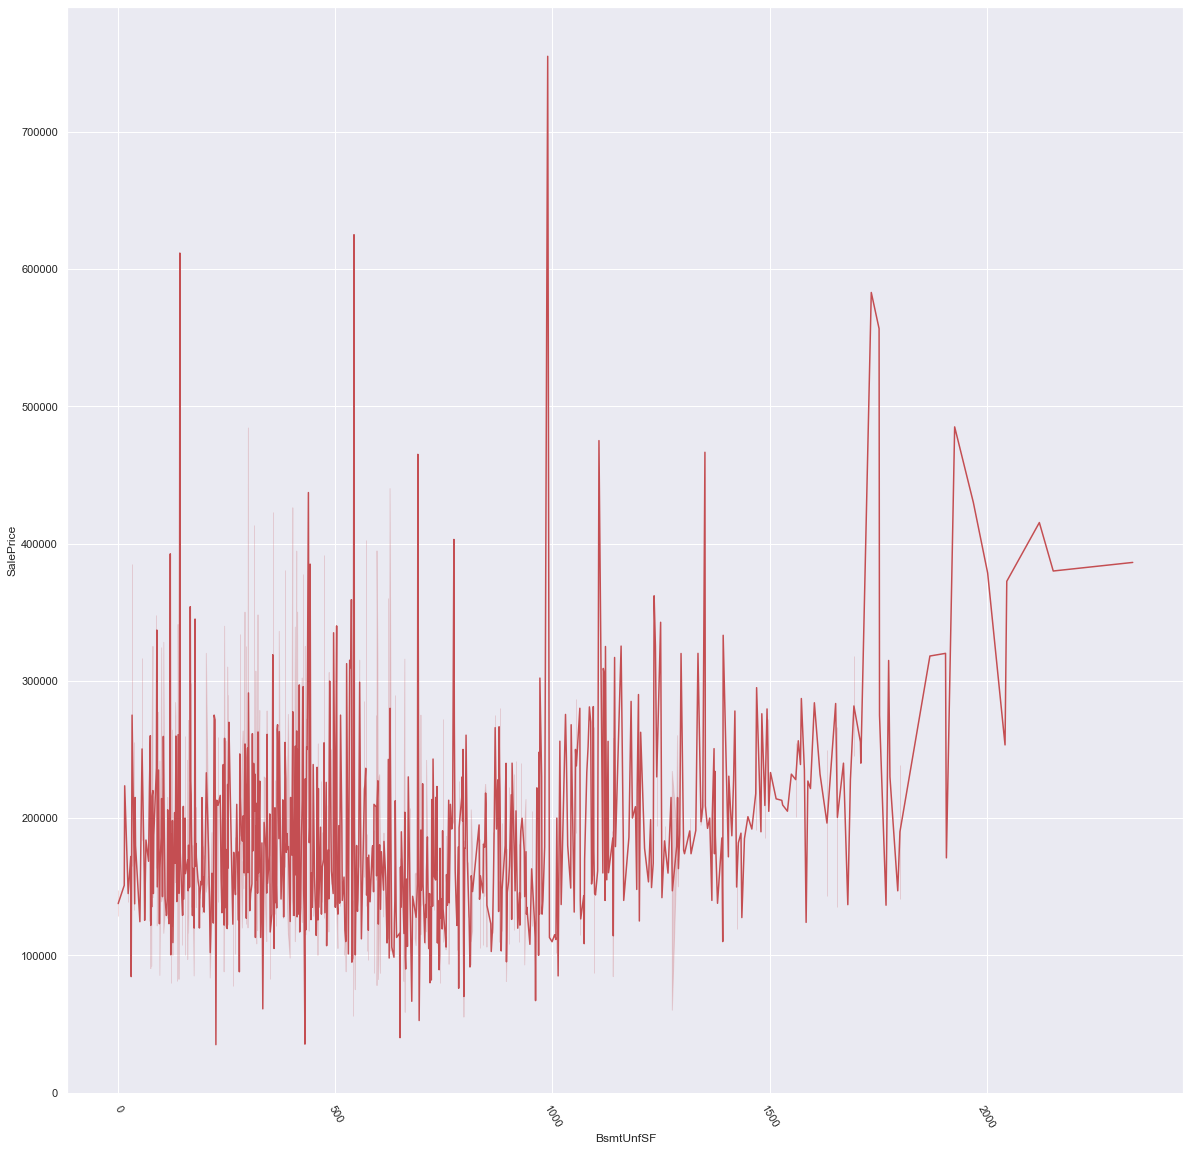

BsmtFullBath vs saleprice
0    686
1    468
2     13
3      1
Name: BsmtFullBath, dtype: int64


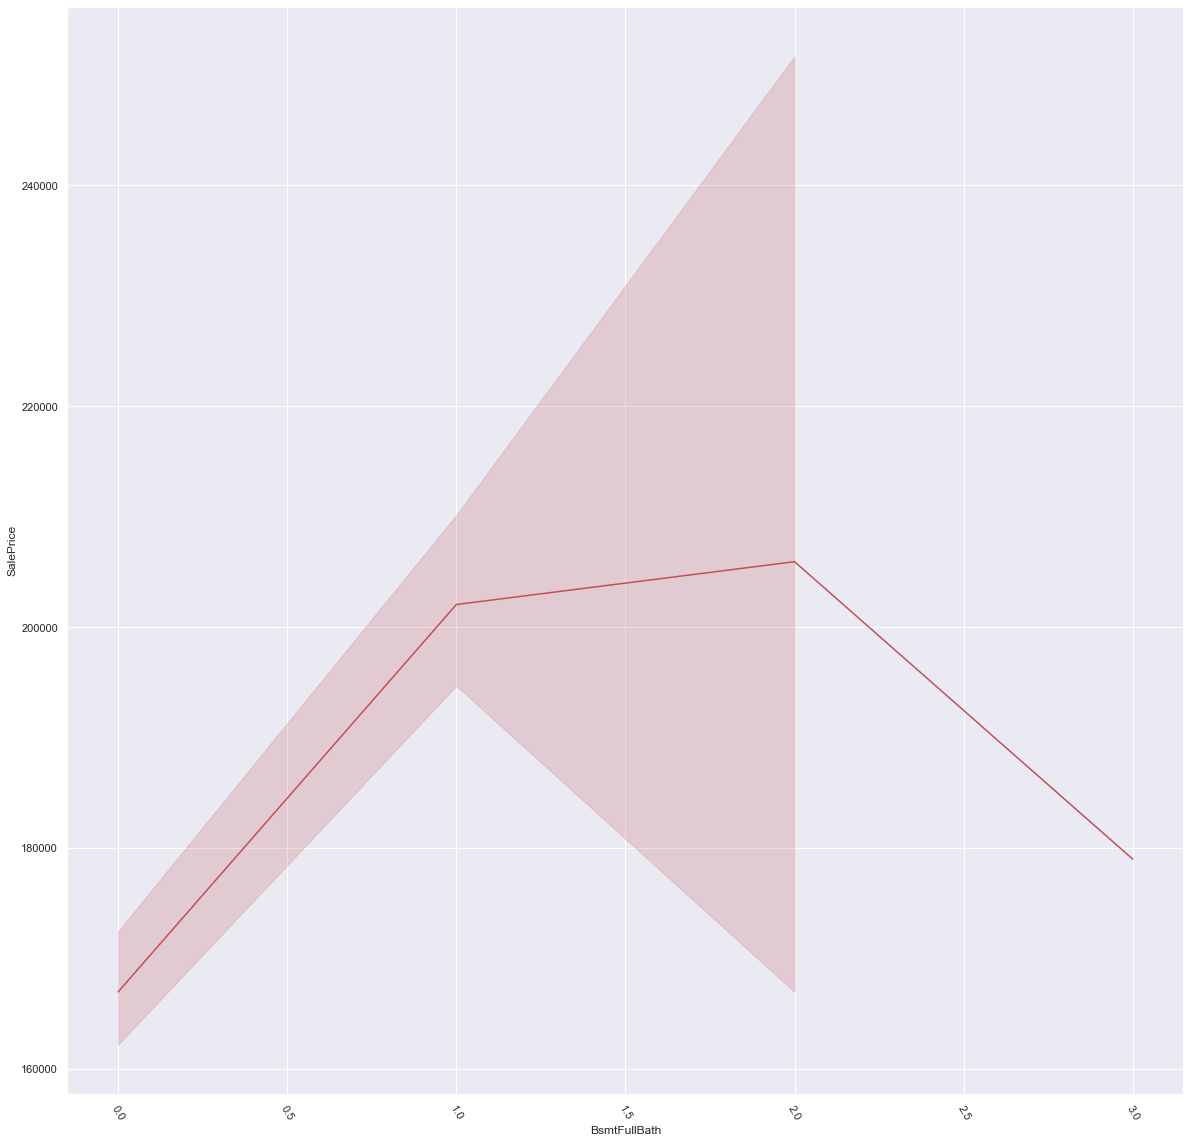

BedroomAbvGr vs saleprice
3    640
2    281
4    180
1     39
5     18
6      5
0      4
8      1
Name: BedroomAbvGr, dtype: int64


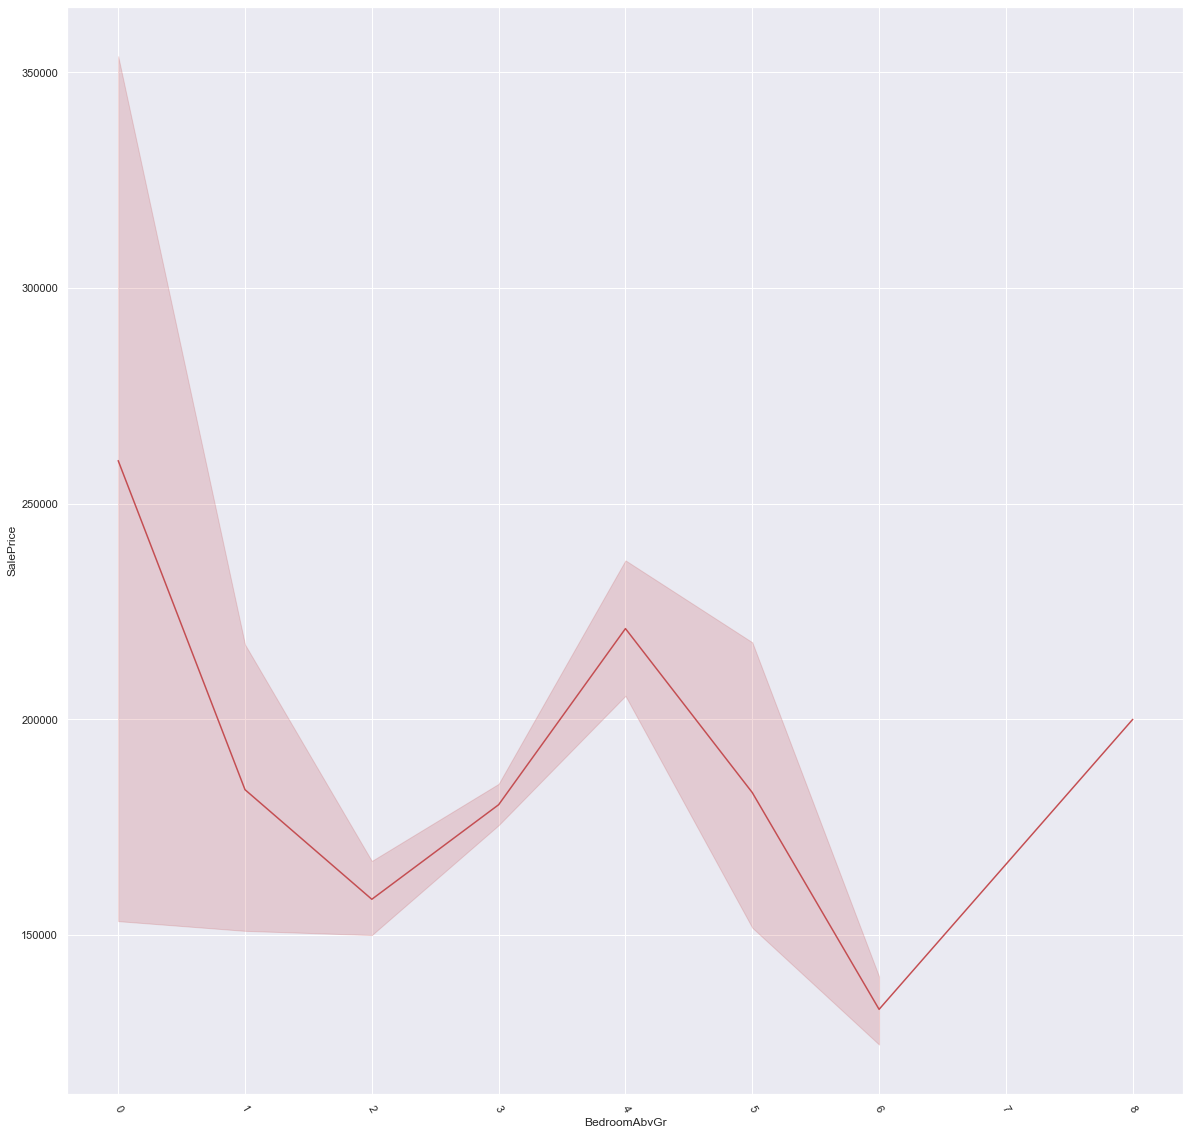

PoolArea vs saleprice
0      1161
555       1
576       1
738       1
519       1
480       1
648       1
512       1
Name: PoolArea, dtype: int64


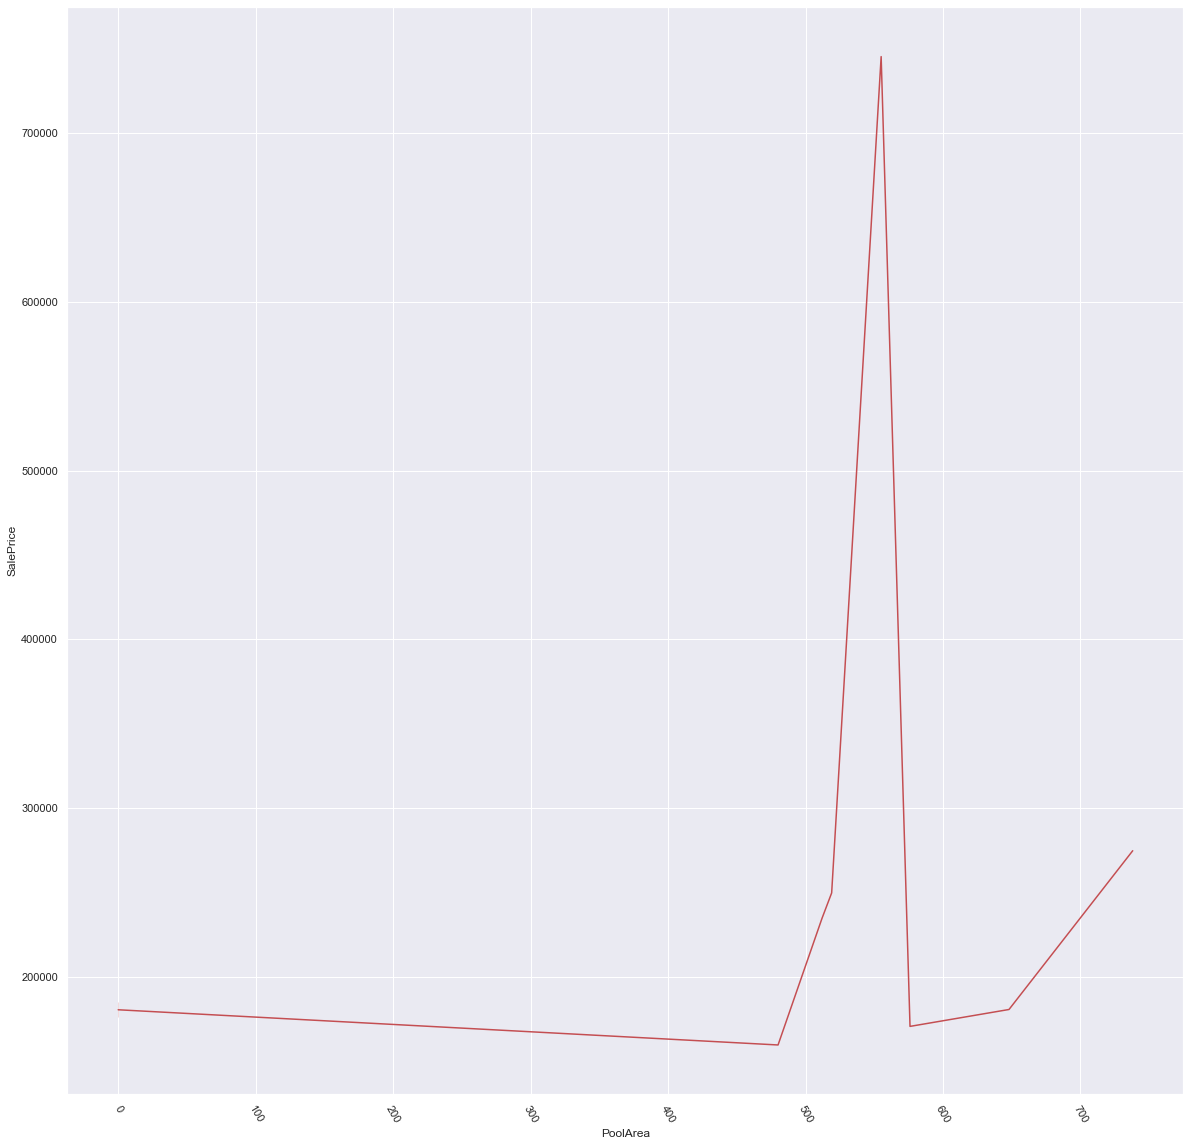

ScreenPorch vs saleprice
0      1073
192       5
224       5
189       4
180       3
       ... 
273       1
99        1
122       1
80        1
130       1
Name: ScreenPorch, Length: 65, dtype: int64


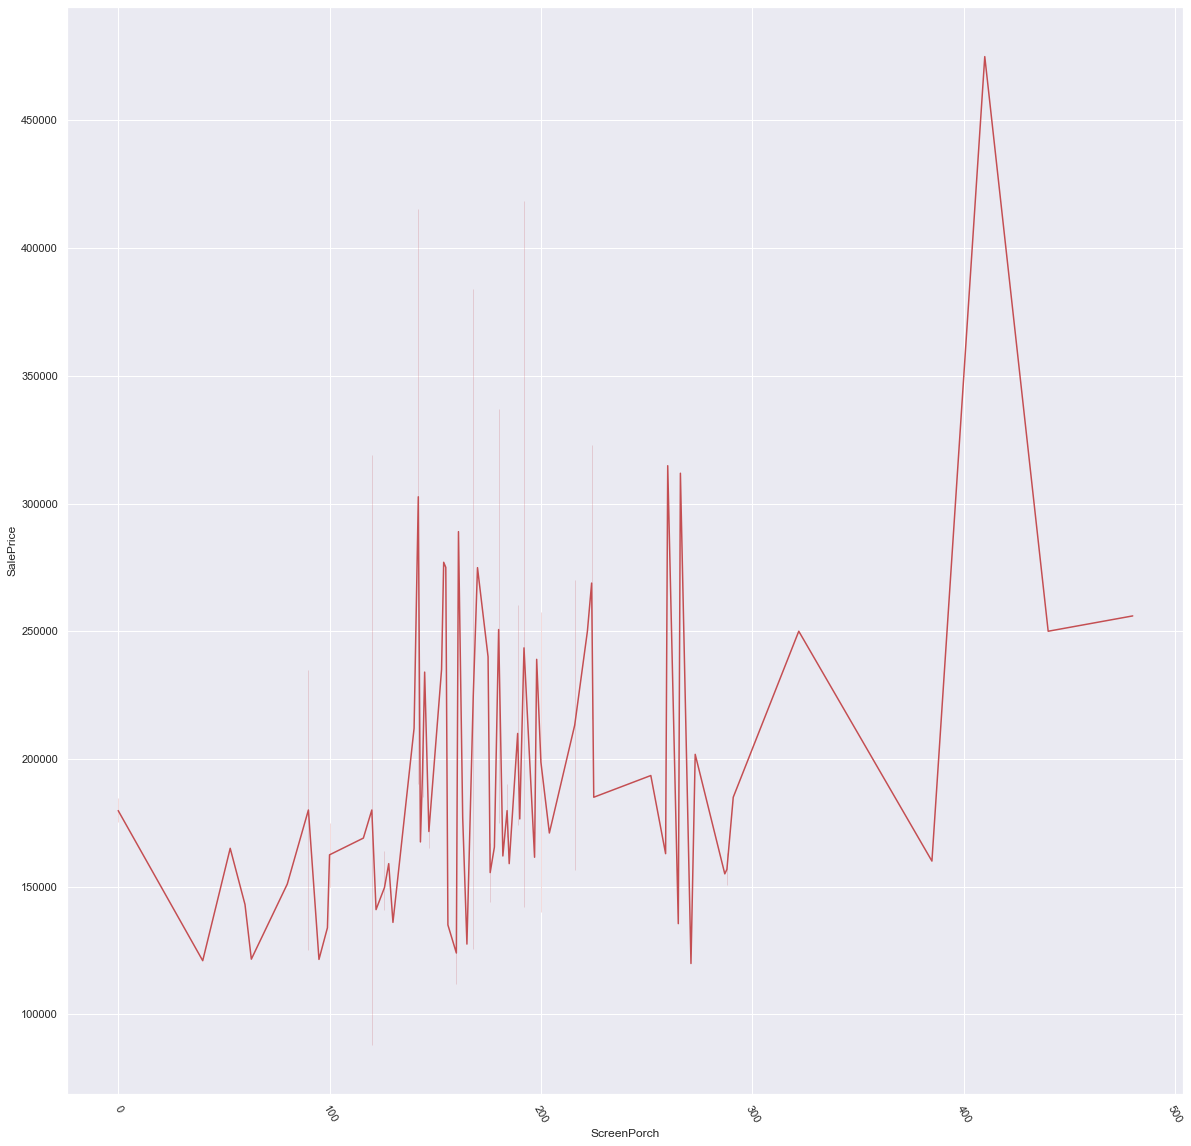

MoSold vs saleprice
6     203
7     187
5     166
4     113
8      95
3      87
11     67
10     66
9      57
12     46
1      44
2      37
Name: MoSold, dtype: int64


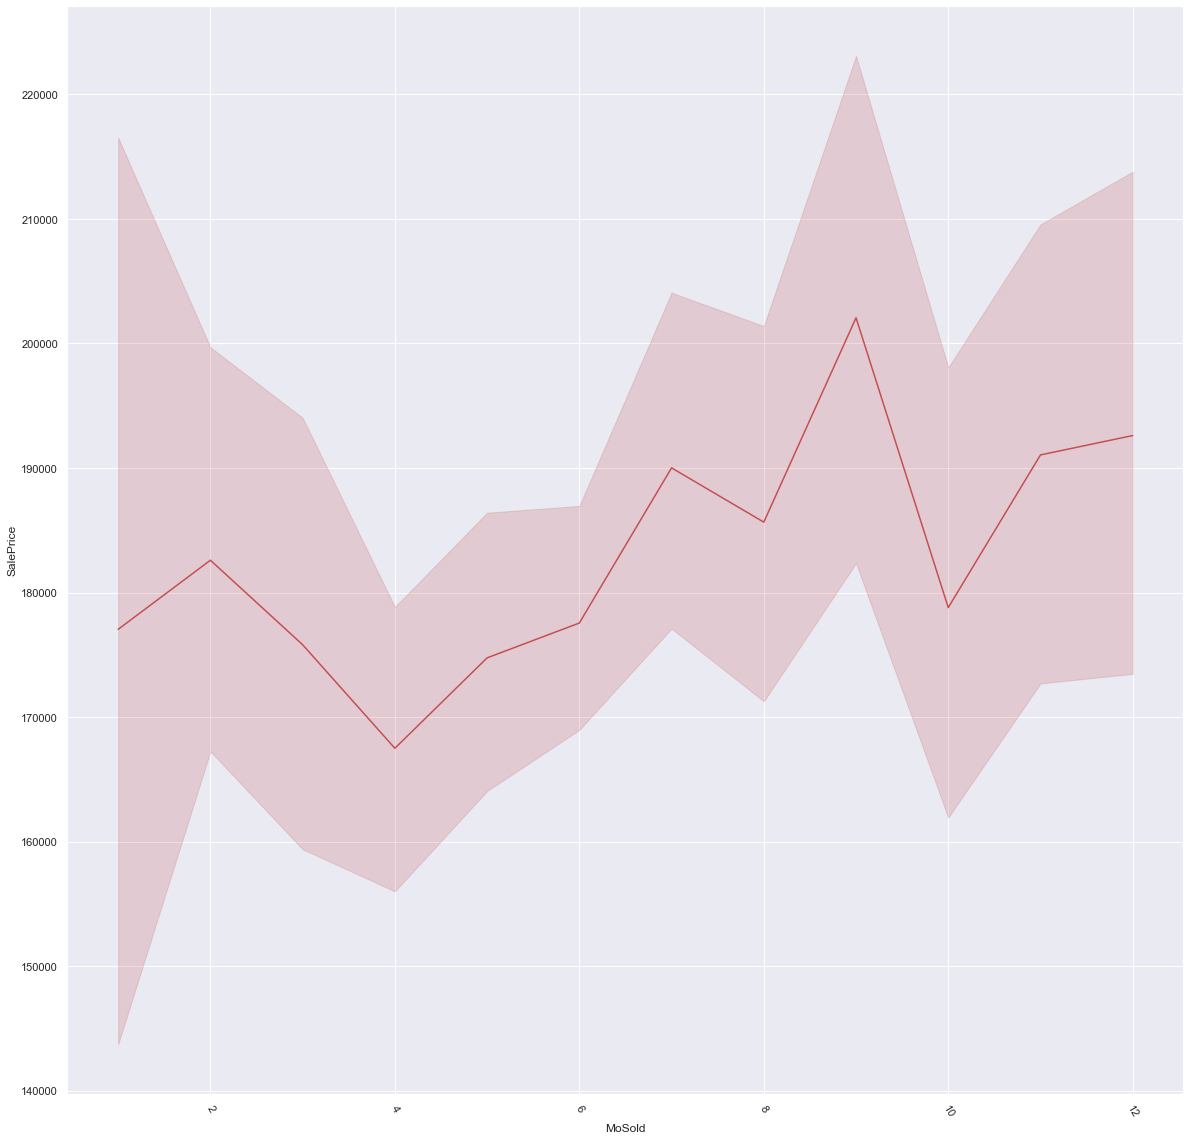

3SsnPorch vs saleprice
0      1146
168       3
216       2
180       2
144       2
153       1
23        1
304       1
130       1
182       1
290       1
238       1
245       1
162       1
96        1
140       1
196       1
508       1
Name: 3SsnPorch, dtype: int64


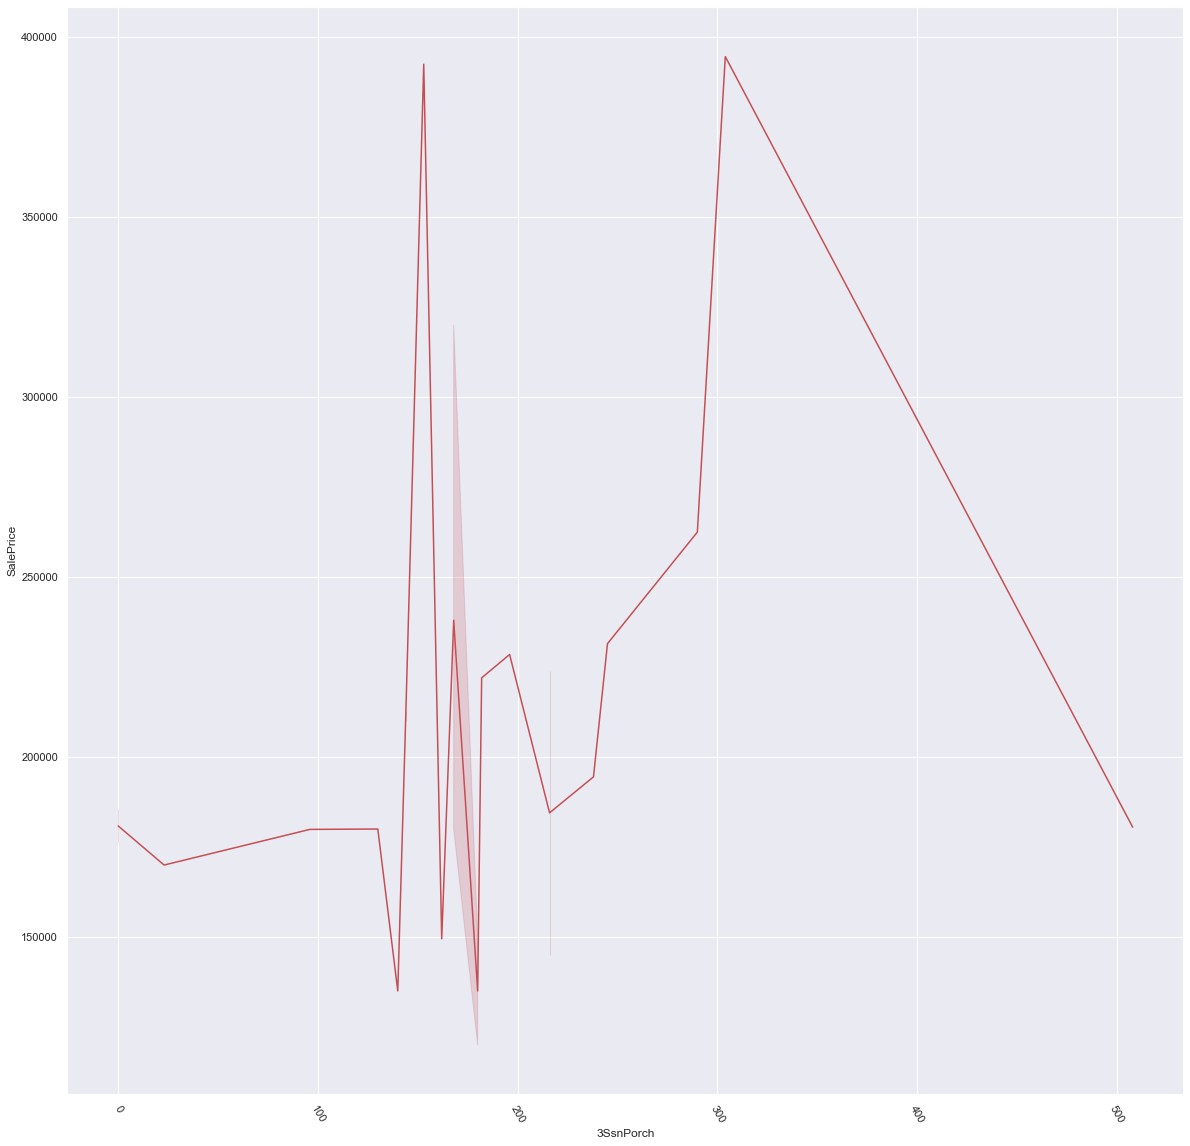

In [44]:
#plotting the variables with possitive correlation to the target variable

for ele in poscor:
        print(f'{ele} vs saleprice')
        print(df[ele].value_counts())
        plt.figure(figsize=(20,20))
        plt.xticks(rotation=-60)
        sns.lineplot(x=ele,y='SalePrice',color='r',data=df)
        plt.show()
   
        
        

'OverallQual'- Rates the overall material and finish of the house. The quality clearly impacts the house price linearly and the prices goes higher as the quality gets better

'GrLivArea'-Above grade (ground) living area square feet, The plot shows that the price going up as the squire feets increases however there are exception cases even though minimal


'GarageCars'-Size of garage in car capacity, as the description, the bigger the garge higher the price

'GarageArea'- increase in the garage area results in better prices

'TotalBsmtSF'- increase in Total square feet of basement area increases the selling price

'1stFlrSF'- larger First Floor square feet higher the price


'FullBath'-Full bathrooms above grade, has a possitive correlation

'TotRmsAbvGrd'-Total rooms above grade (does not include bathrooms), better the rooms the higher the price

'YearBuilt'- old vintage houses seems to be the costliest of them all, meanwhile some recently buit hoses also has better prices

'YearRemodAdd'-Remodel date (same as construction date if no remodeling or additions), recently remodeled houses are sold at higher rate

'MasVnrArea- Masonry veneer area in square feet, price increases with increase in squire feet

'Fireplaces'- The price increases if the house has a fire place

'GarageYrBlt'-Most recently houses with garages have better price

'BsmtFinSF1'-Increase in price with increase in squire feet

'OpenPorchSF'-Increase in price with increase in squire feet

'2ndFlrSF'-Increase in price with increase in squire feet

'LotFrontage'-ncrease in price with increase in squire feet

'WoodDeckSF'-Wood deck area in square feet, wood decks can affect the prices in a possitive way

'HalfBath'-Basement half bathrooms

'BsmtUnfSF'-Unfinished square feet of basement area

'BsmtFullBath'-Basement full bathrooms

'BedroomAbvGr'-Bedrooms above grade (does NOT include basement bedrooms)

'PoolArea'-Pool area in square feet, pool area increase the price on the hopuse

'ScreenPorch'-Screen porch area in square feet

'MoSold'-Month Sold (MM), there are more sales towards the end of the year

'3SsnPorch'-Three season porch area in square feet


BsmtFinSF2 vs saleprice
0      1032
180       5
41        2
147       2
117       2
       ... 
531       1
40        1
121       1
608       1
546       1
Name: BsmtFinSF2, Length: 122, dtype: int64


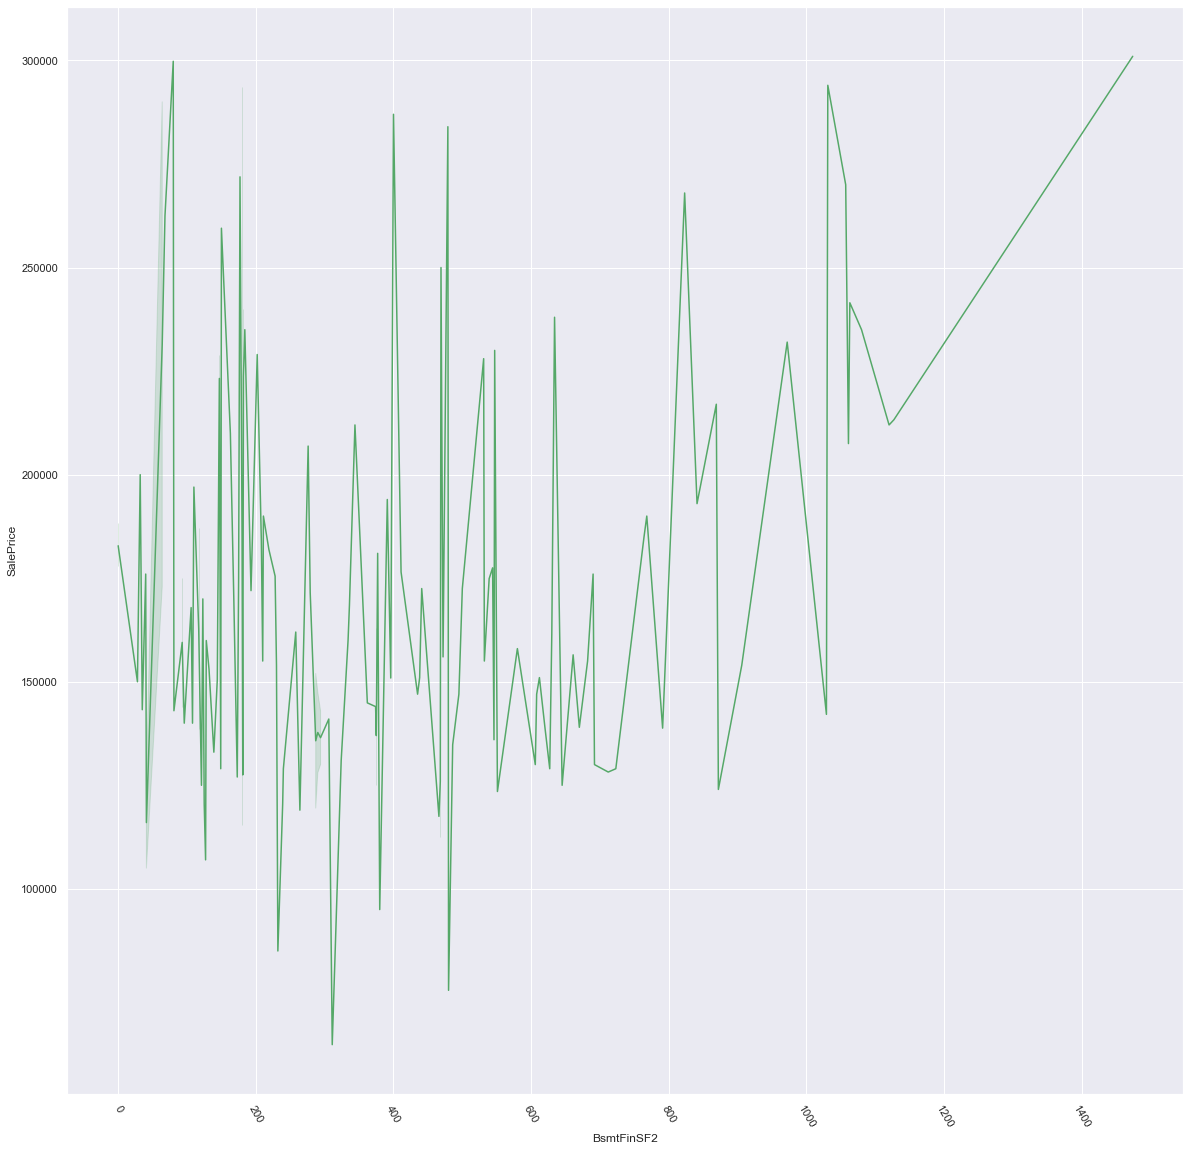

BsmtHalfBath vs saleprice
0    1105
1      61
2       2
Name: BsmtHalfBath, dtype: int64


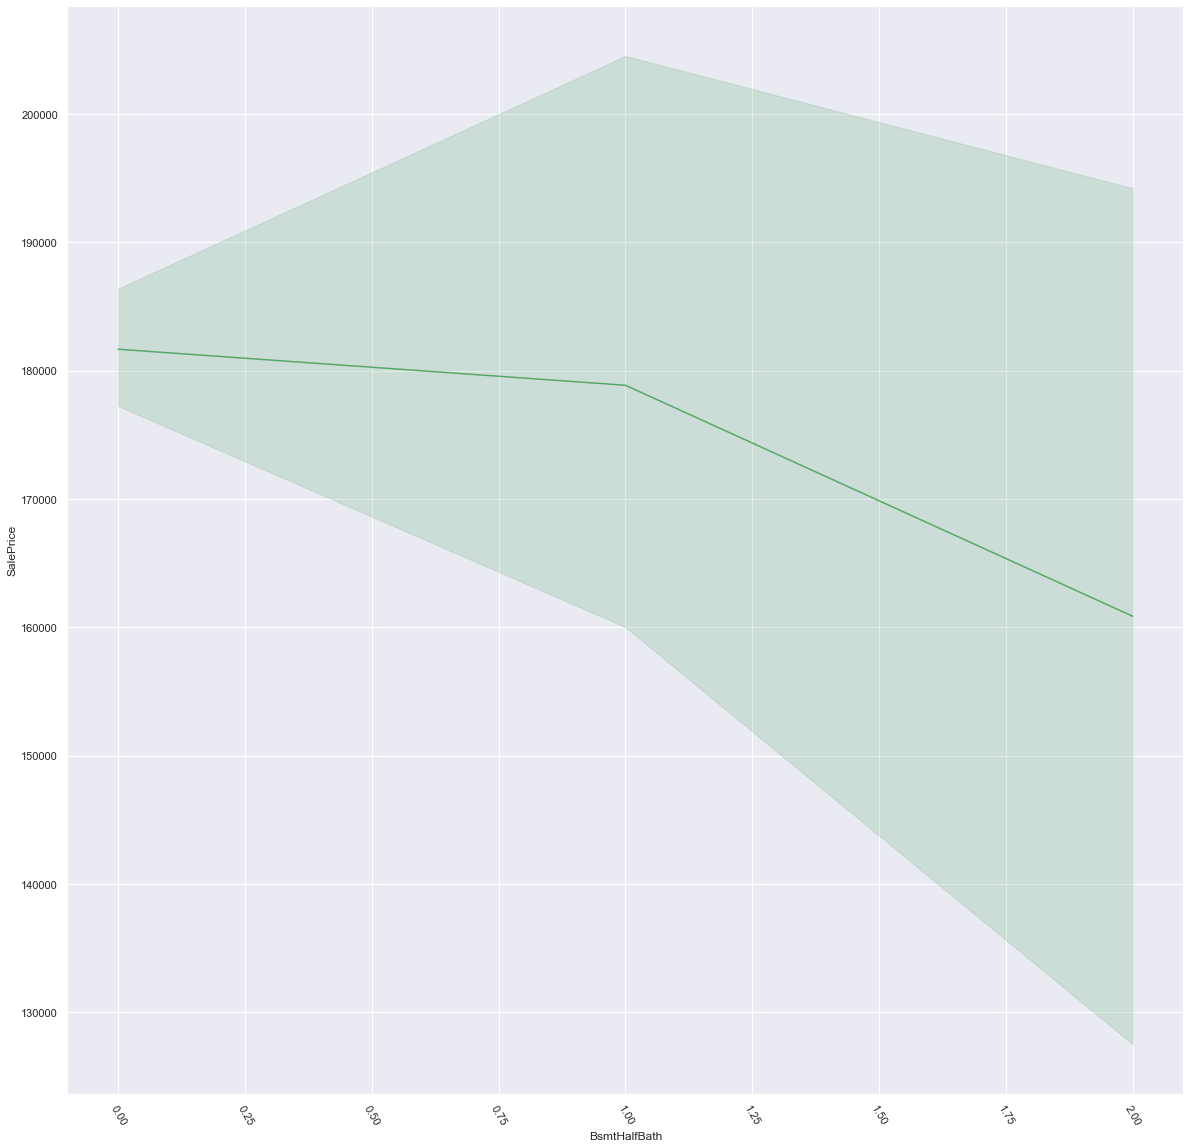

MiscVal vs saleprice
0        1126
400        10
500         7
2000        4
600         3
700         3
1200        2
1150        1
480         1
1300        1
1400        1
8300        1
620         1
15500       1
450         1
800         1
54          1
350         1
560         1
2500        1
Name: MiscVal, dtype: int64


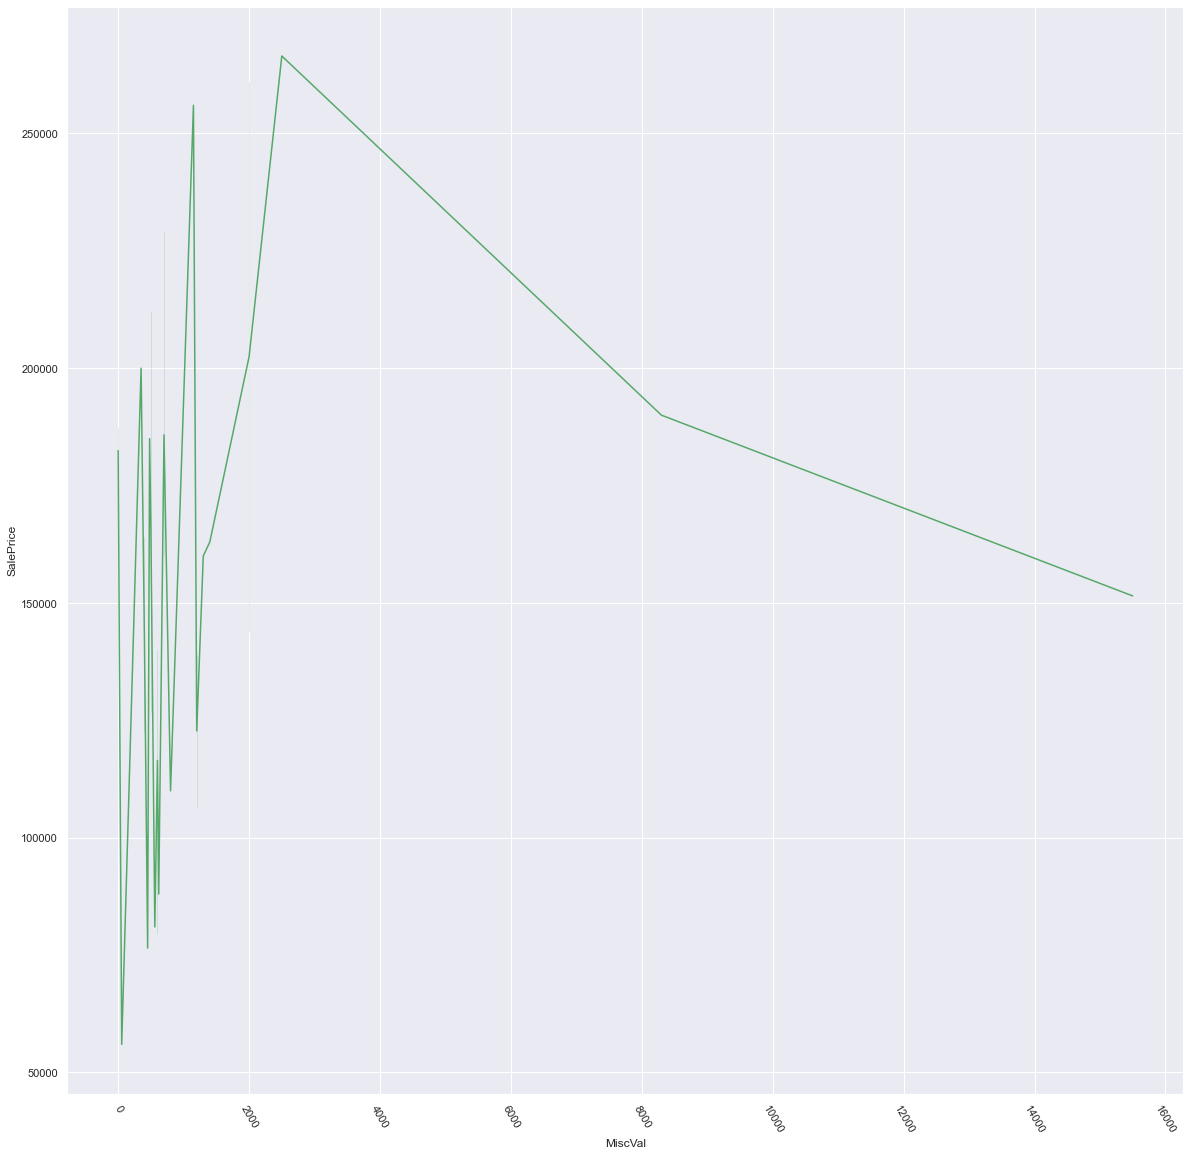

LowQualFinSF vs saleprice
0      1145
80        3
360       2
384       1
420       1
473       1
371       1
232       1
513       1
481       1
515       1
514       1
120       1
528       1
572       1
144       1
234       1
390       1
156       1
53        1
392       1
Name: LowQualFinSF, dtype: int64


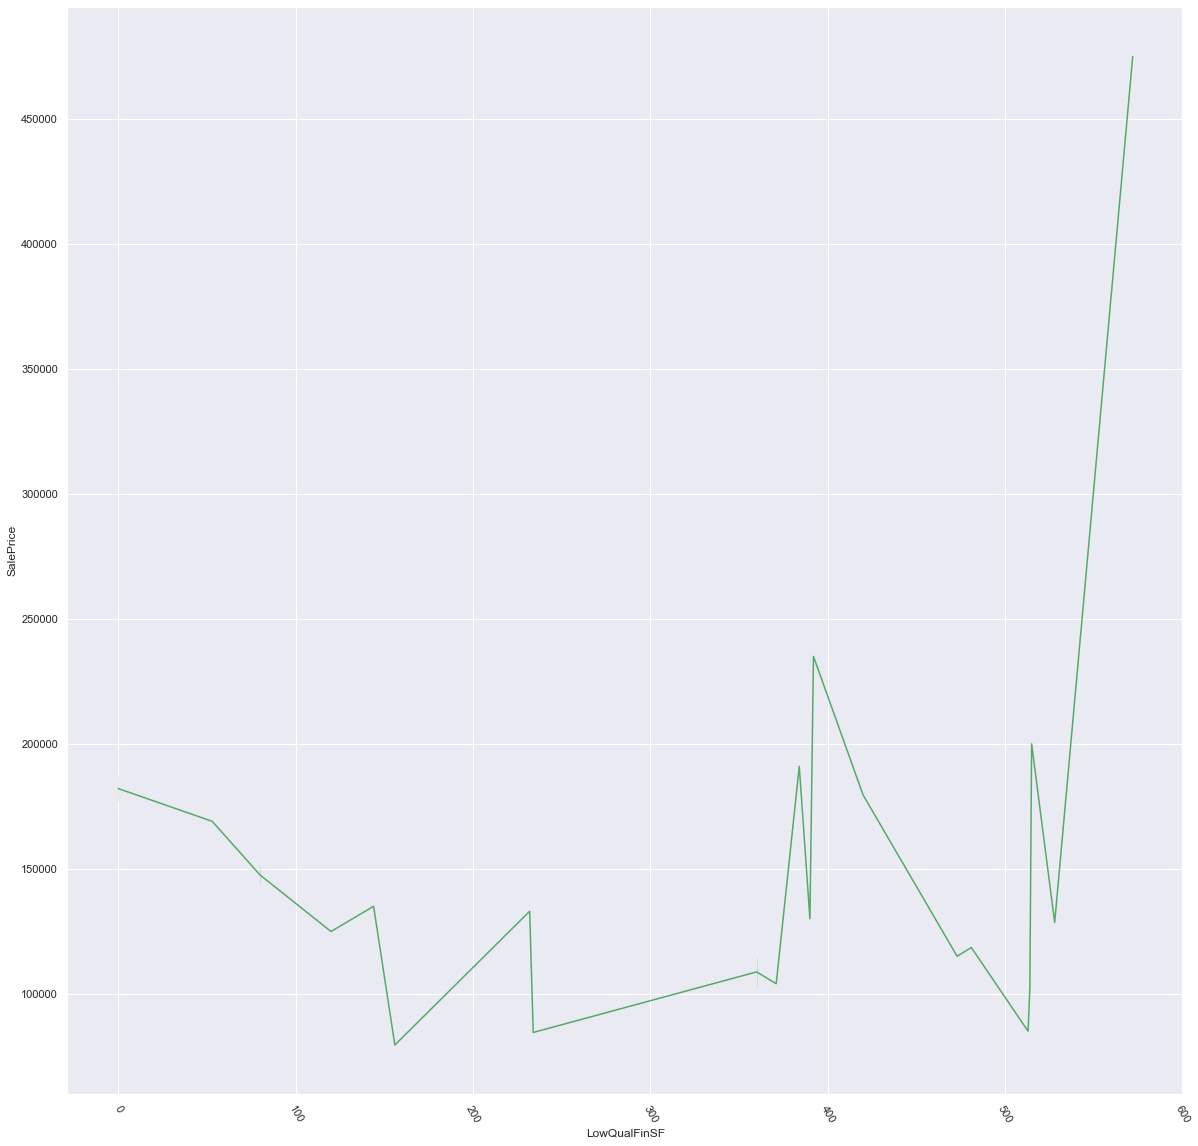

YrSold vs saleprice
2007    264
2009    260
2006    254
2008    248
2010    142
Name: YrSold, dtype: int64


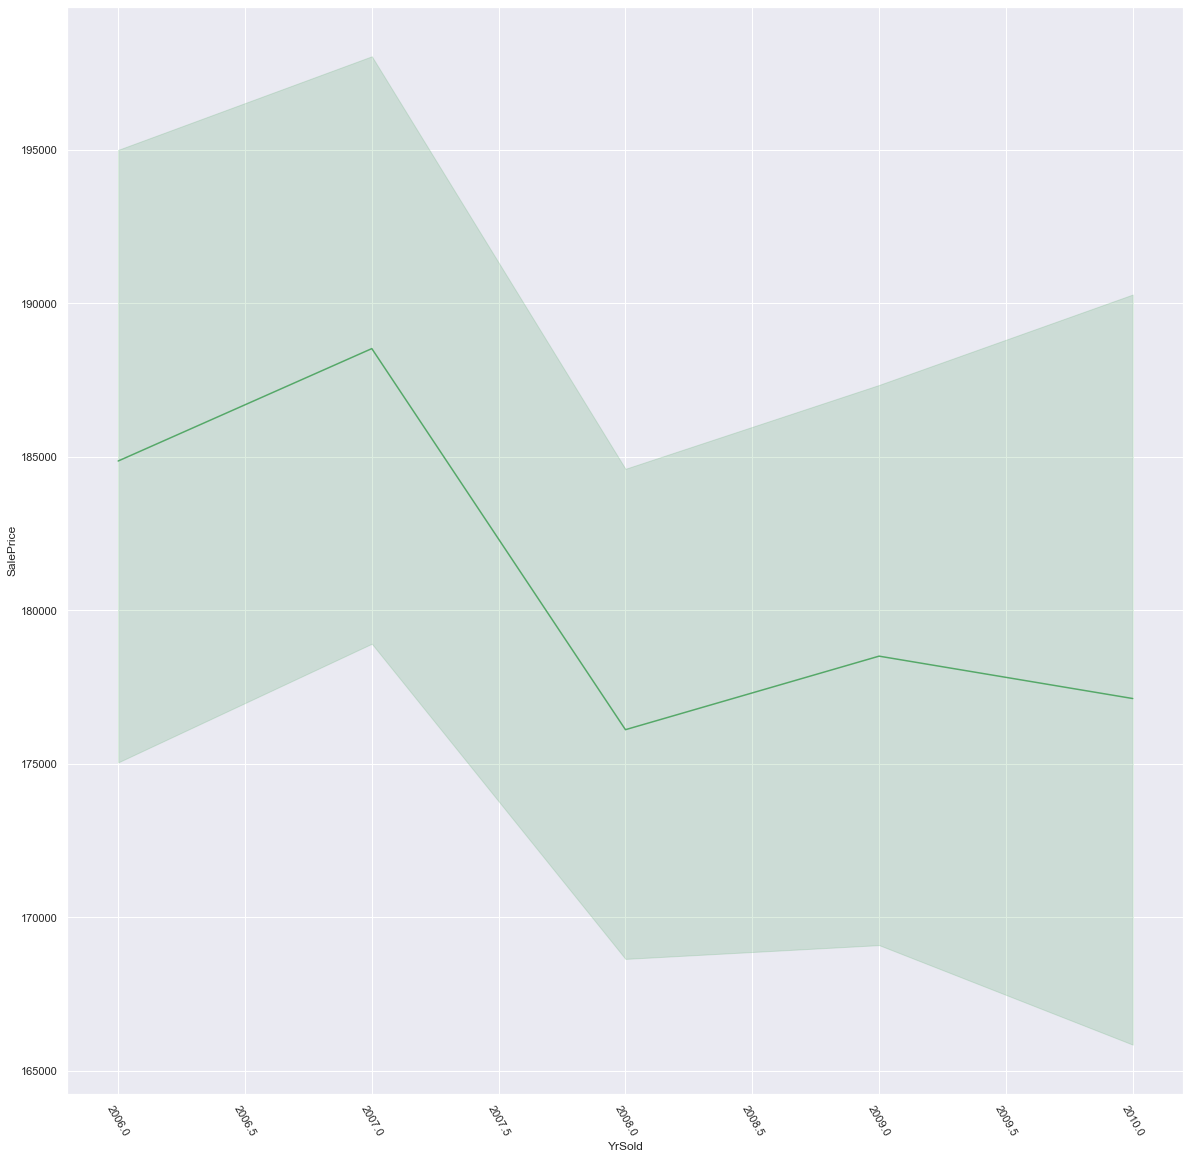

MSSubClass vs saleprice
20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64


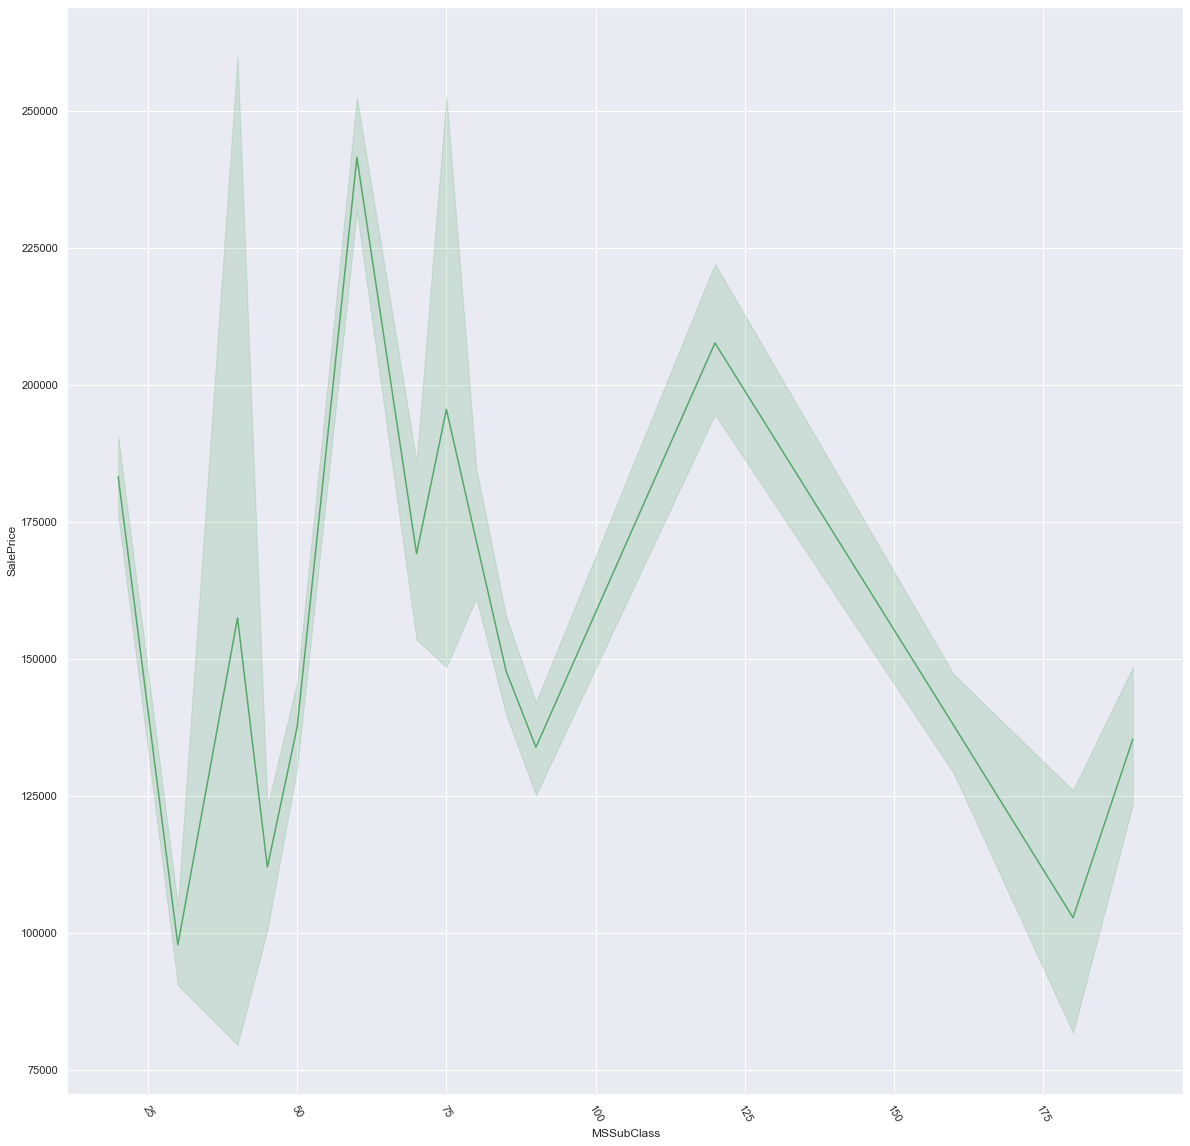

OverallCond vs saleprice
5    640
6    209
7    172
8     61
4     43
3     21
9     16
2      5
1      1
Name: OverallCond, dtype: int64


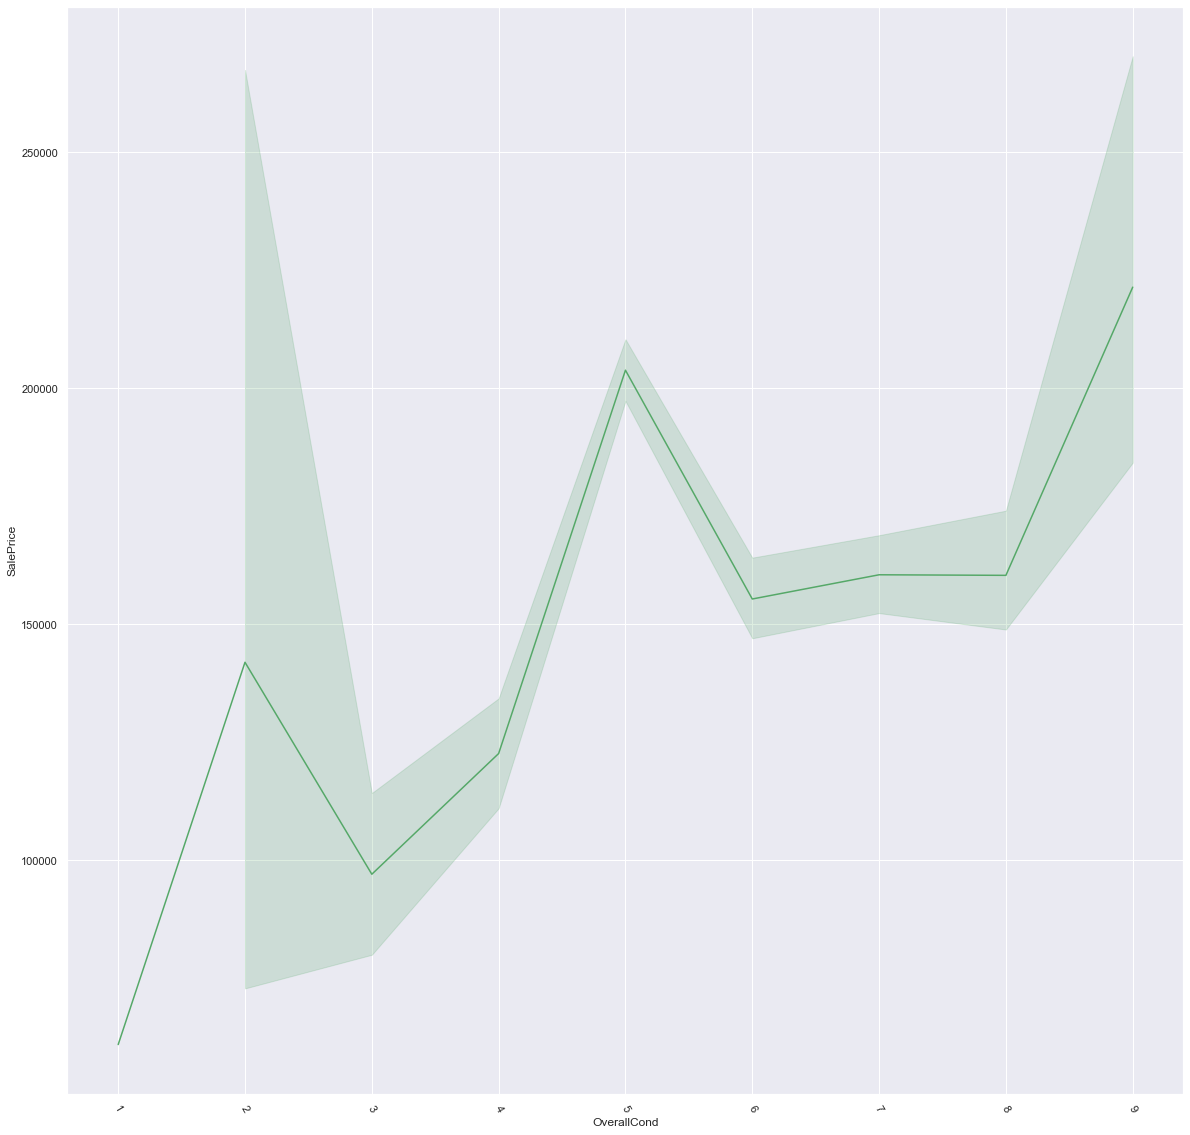

EnclosedPorch vs saleprice
0      999
112     13
96       6
192      5
216      5
      ... 
80       1
242      1
136      1
272      1
172      1
Name: EnclosedPorch, Length: 106, dtype: int64


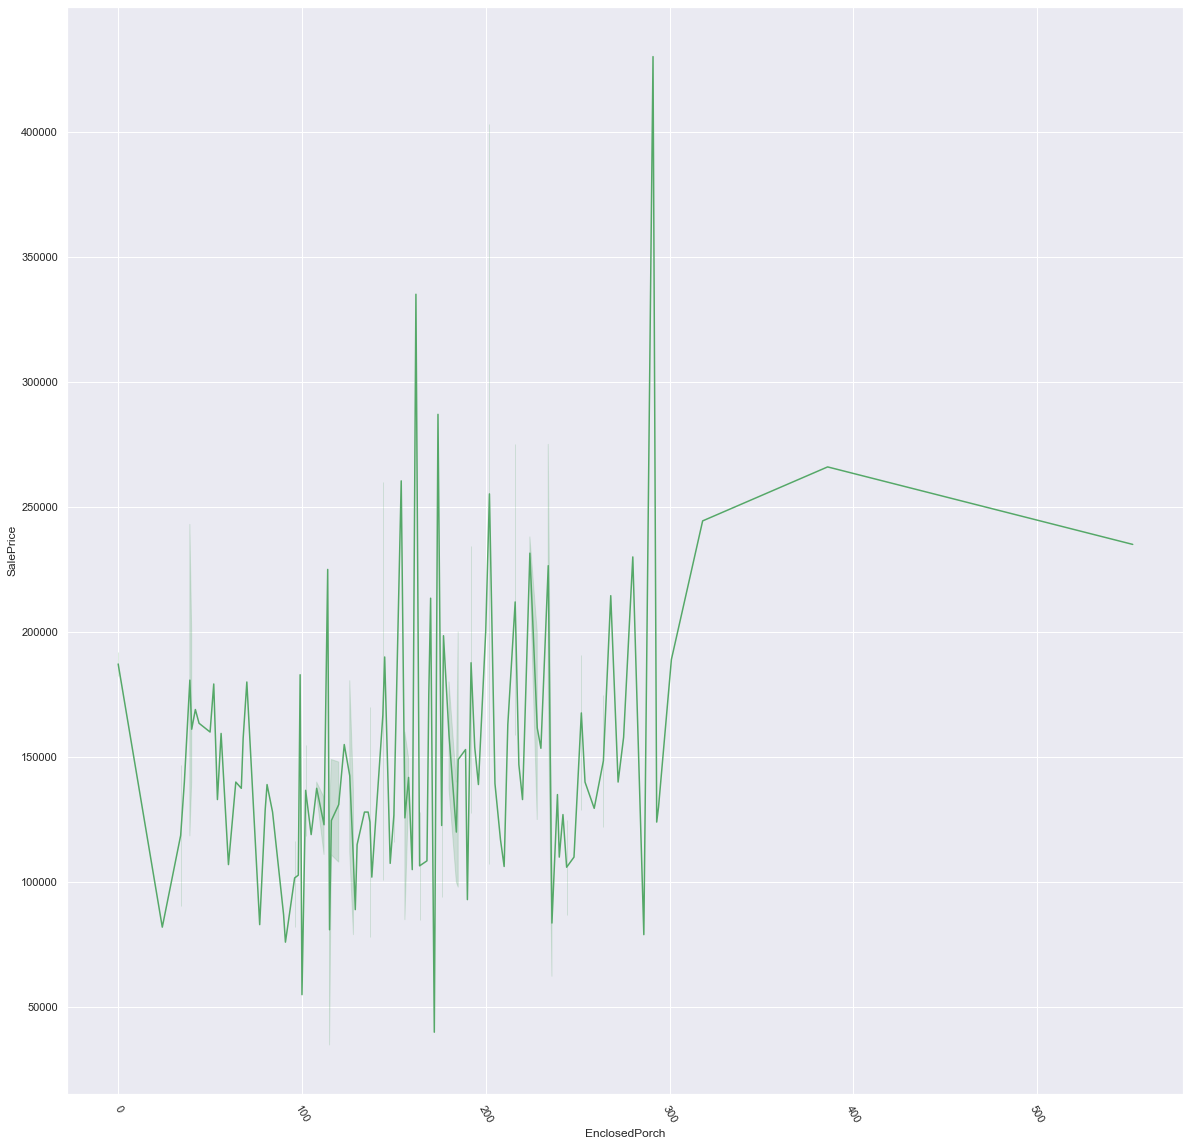

KitchenAbvGr vs saleprice
1    1114
2      52
3       1
0       1
Name: KitchenAbvGr, dtype: int64


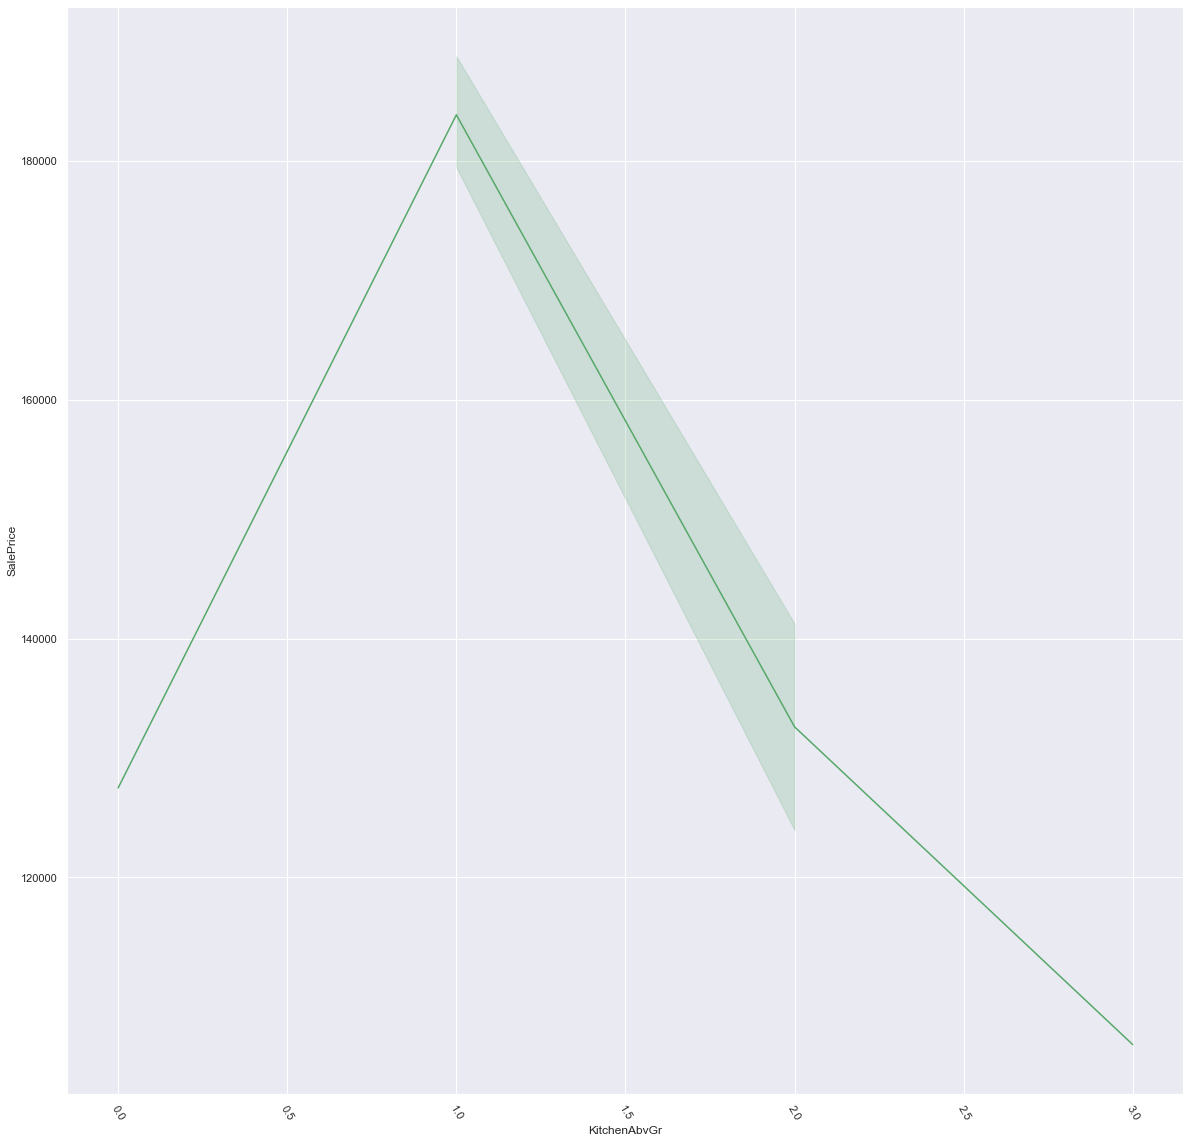

In [47]:
#plotting the variables with negative correlation to the target variable

for el in negcor:
        print(f'{el} vs saleprice')
        print(df[el].value_counts())
        plt.figure(figsize=(20,20))
        plt.xticks(rotation=-60)
        sns.lineplot(x=el,y='SalePrice',color='g',data=df)
        plt.show()

BsmtFinSF2-Type 2 finished square feet, finished basemnts fetch better prices

BsmtHalfBath'-Basement half bathrooms, there seems to be  dip in price as half bathroom number goes up

MiscVal'-Value of miscellaneous feature

LowQualFinSF'- Low quality finished square feet (all floors), quality decreases along  with the decrease in price

YrSold'-Year Sold (YYYY), vintage and newer houses fetch better prices

MSSubClass'-Identifies the type of dwelling involved in the sale.

OverallCond'-Rates the overall condition of the house, price goes up as the overal condition increases

EnclosedPorch'-Enclosed porch area in square feet, price of the house increases with more enclosed porch

KitchenAbvGr'-Kitchens above grade, 1 seems to fetch the better price

MSZoning vs salesprice
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


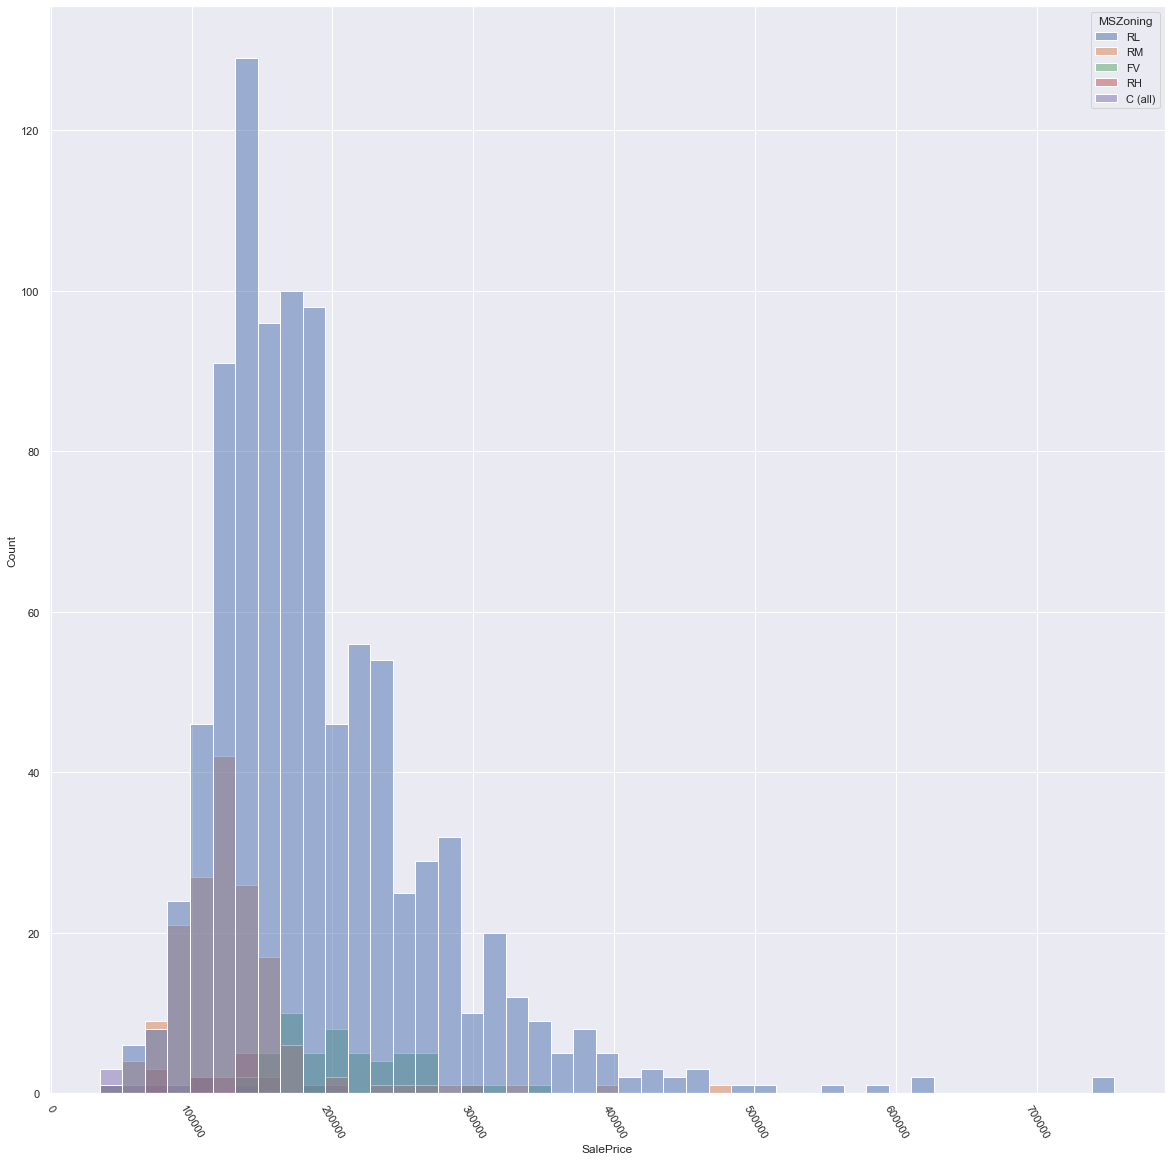

Street vs salesprice
Pave    1164
Grvl       4
Name: Street, dtype: int64


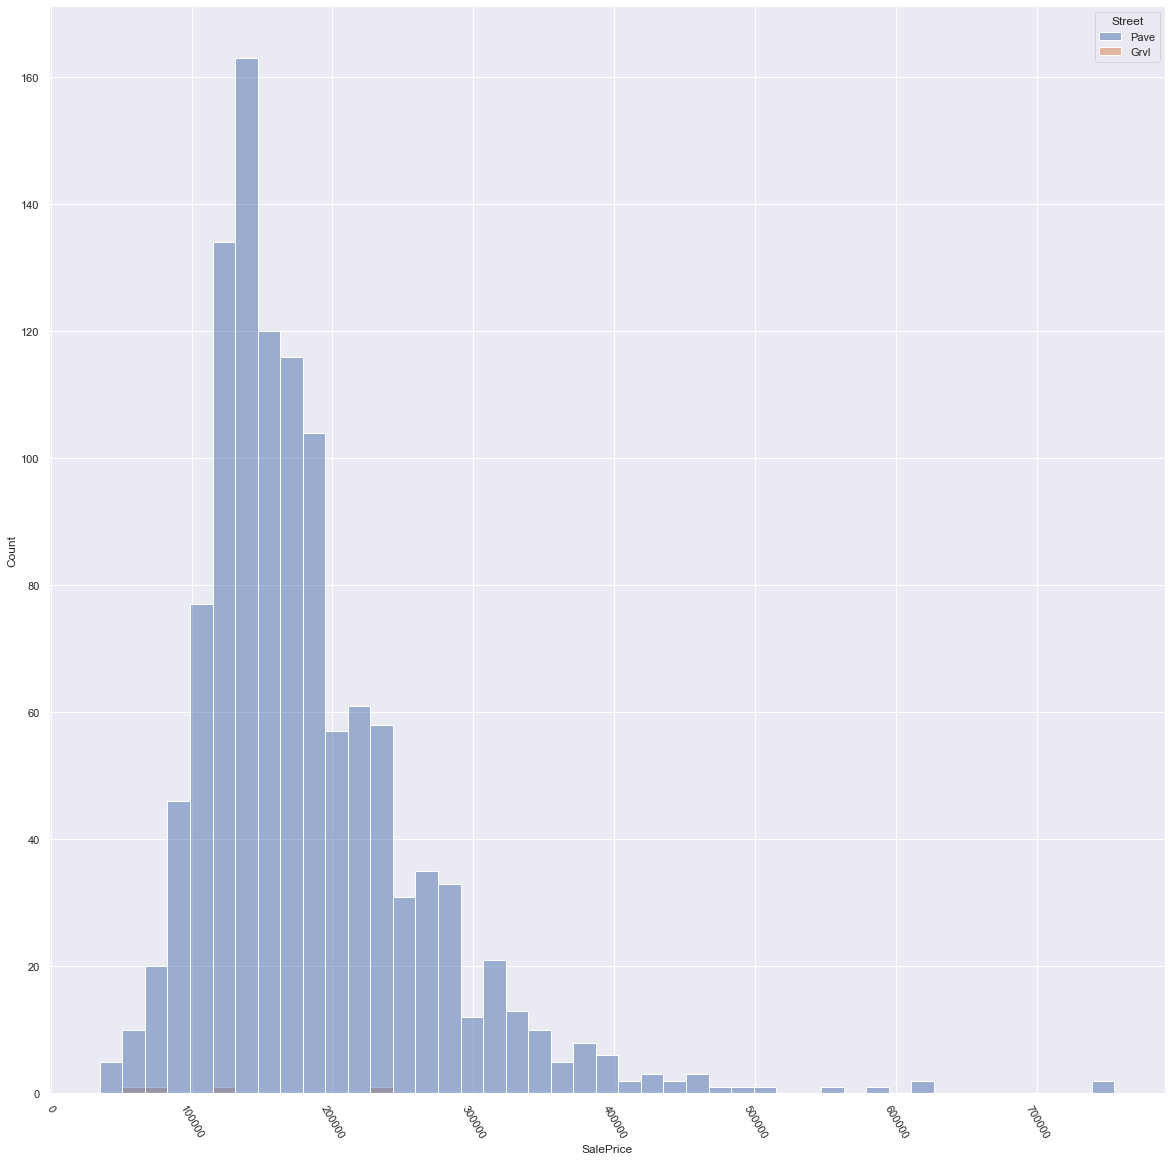

LotShape vs salesprice
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


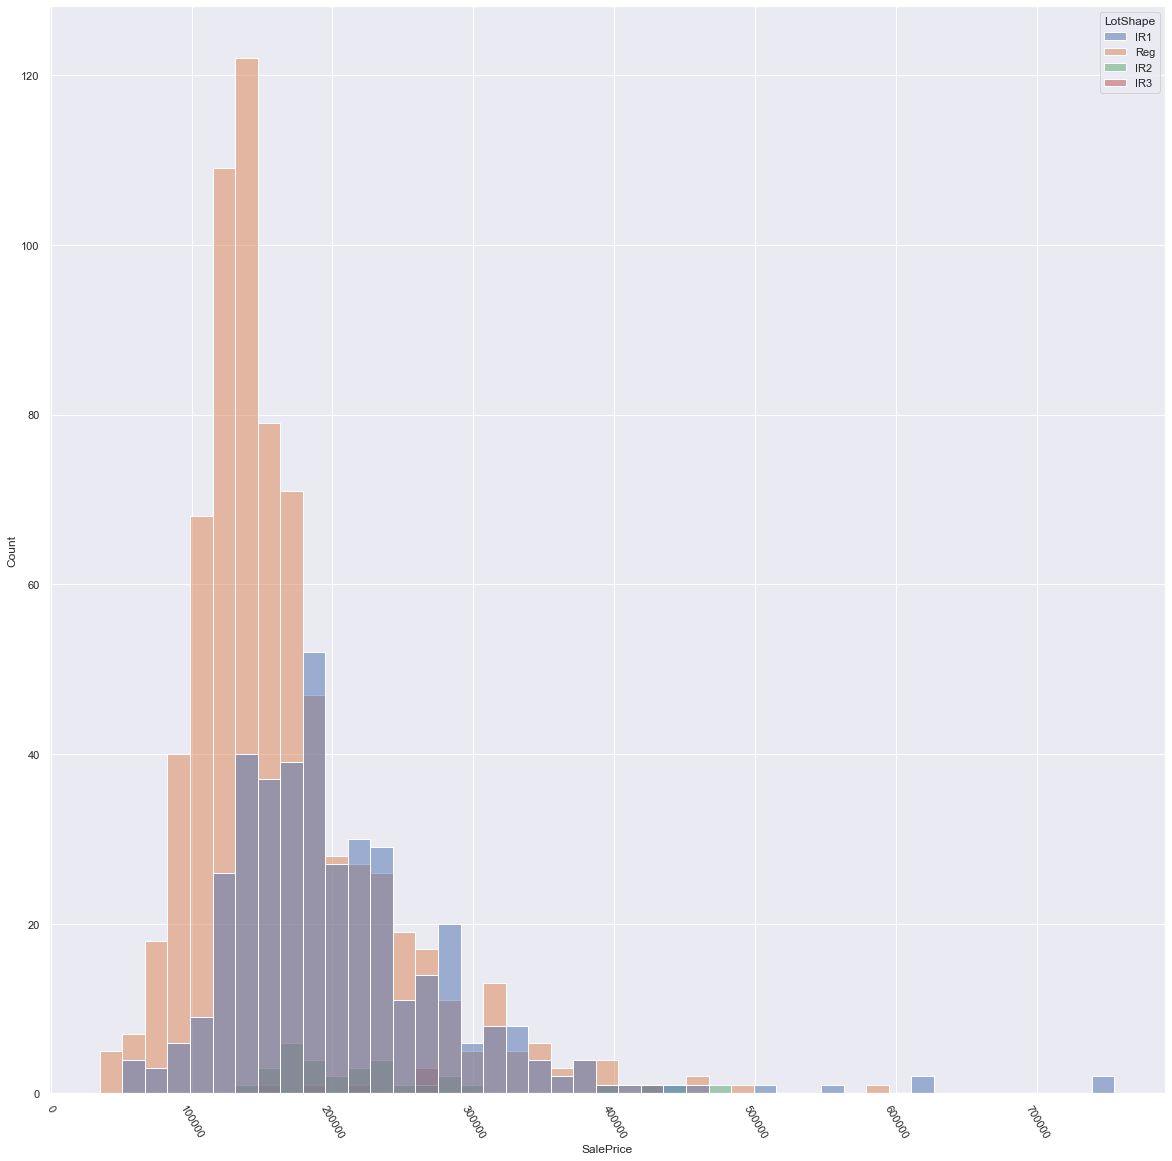

LandContour vs salesprice
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64


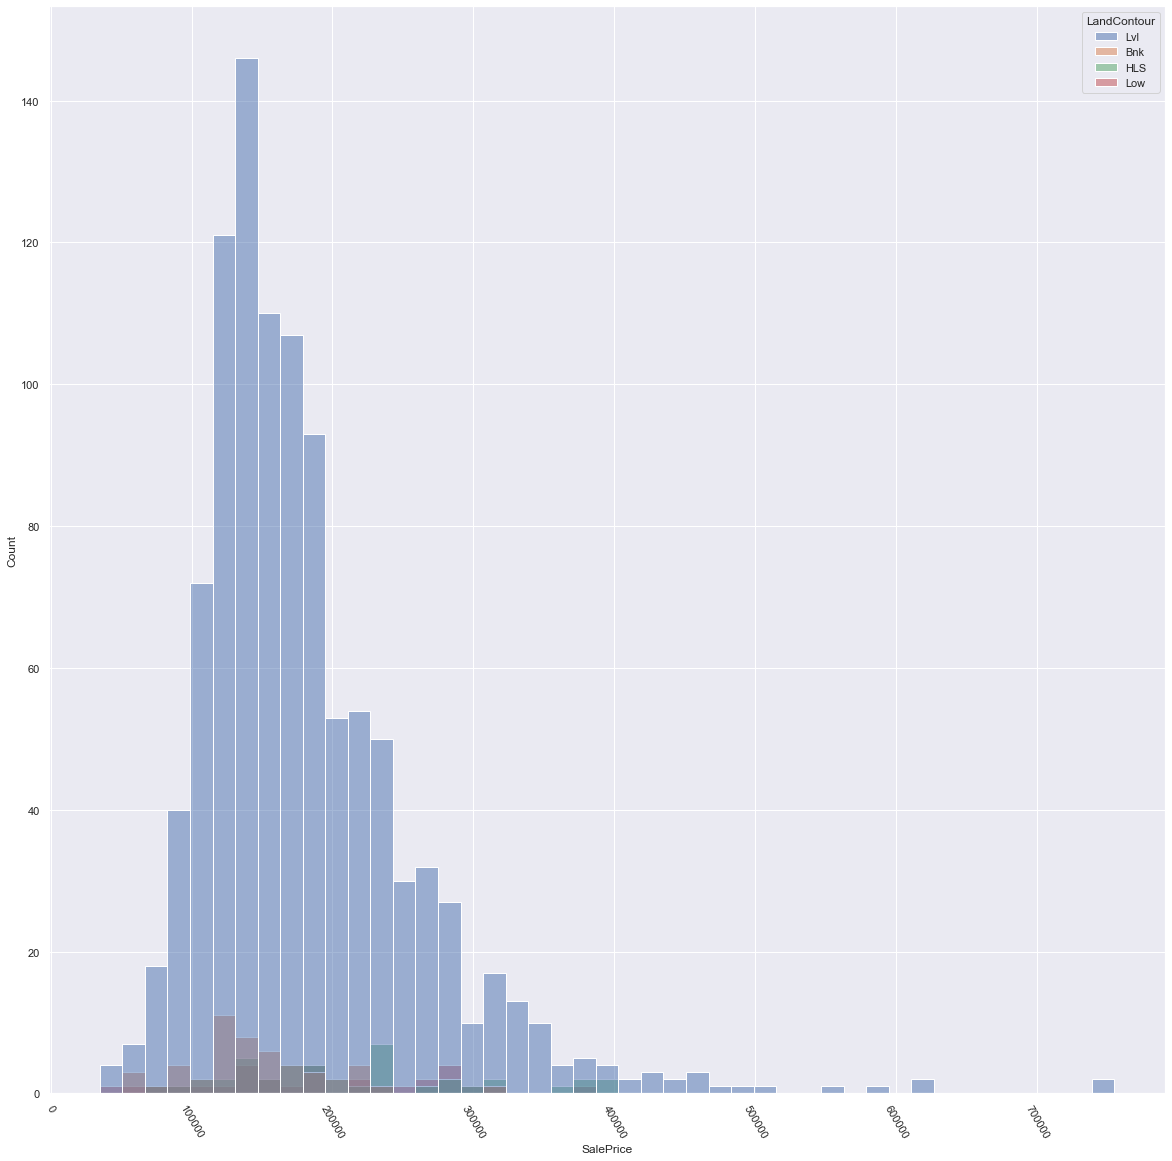

Utilities vs salesprice
AllPub    1168
Name: Utilities, dtype: int64


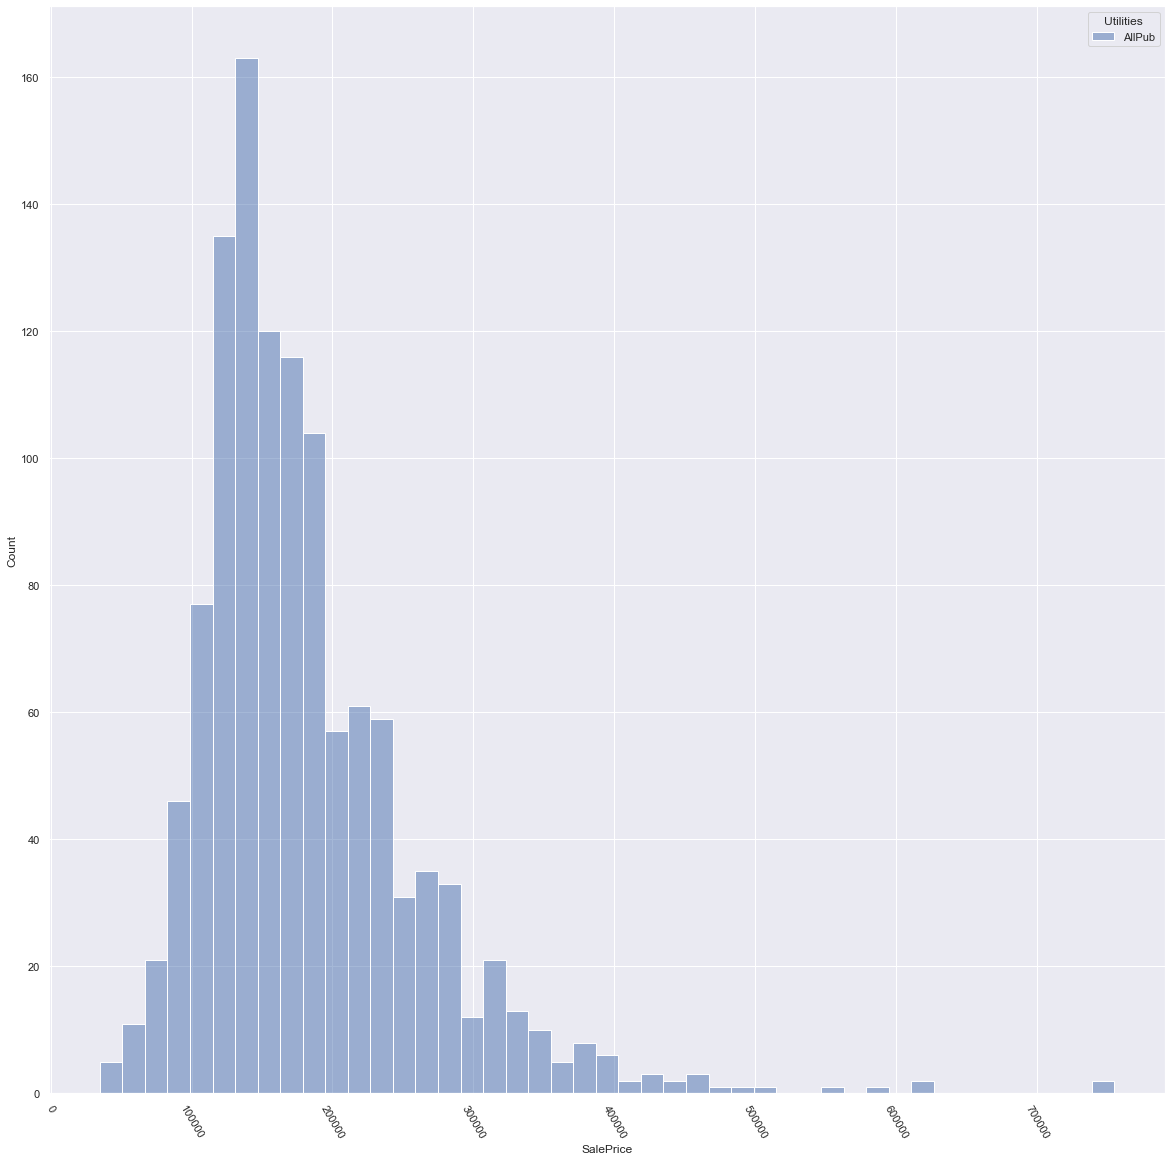

LotConfig vs salesprice
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64


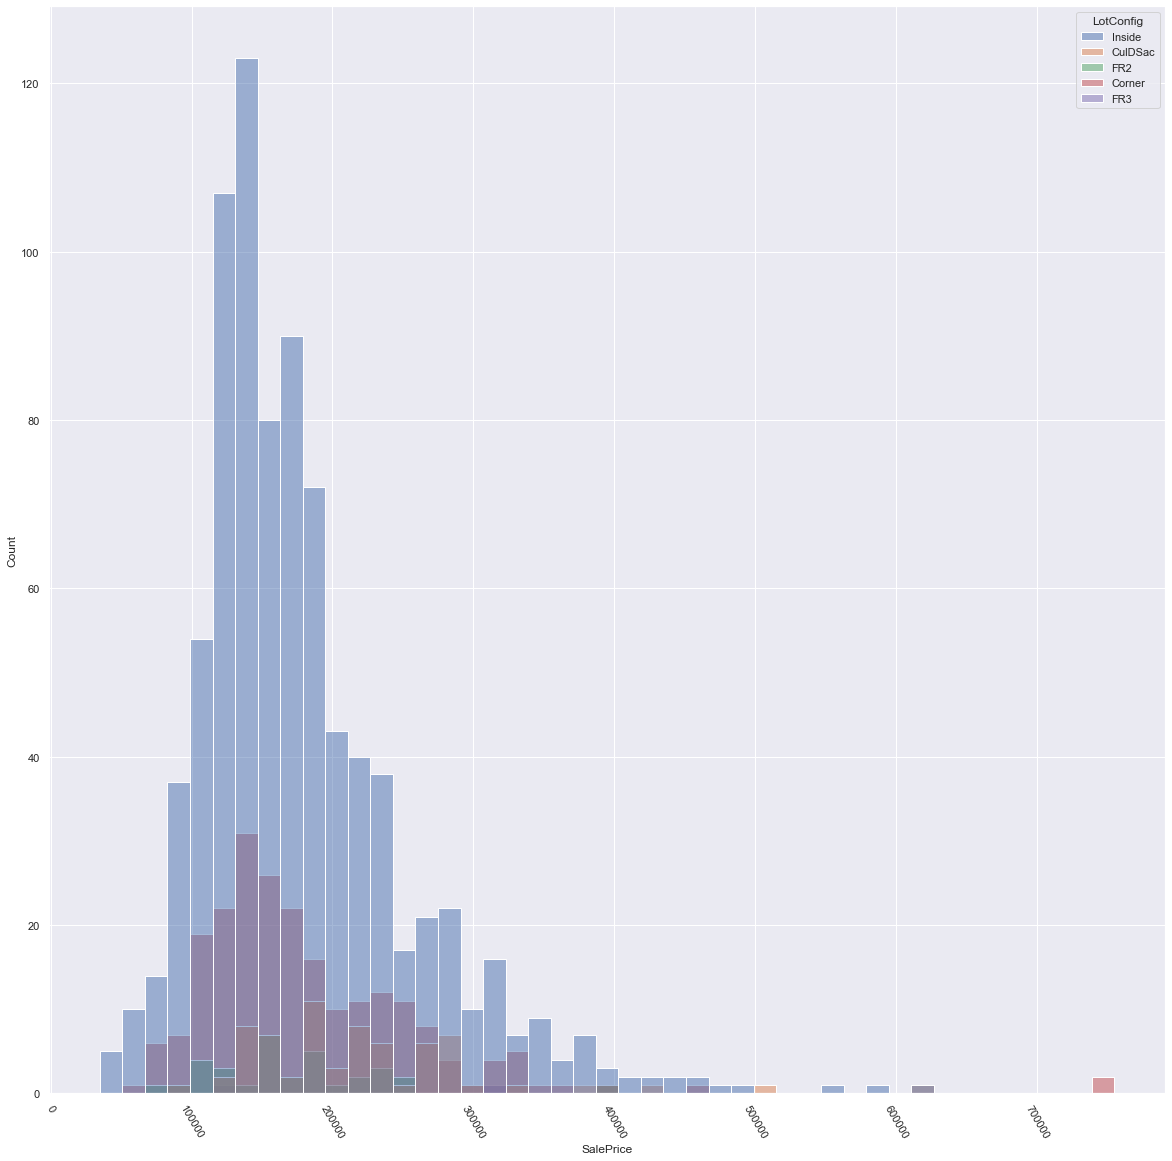

LandSlope vs salesprice
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64


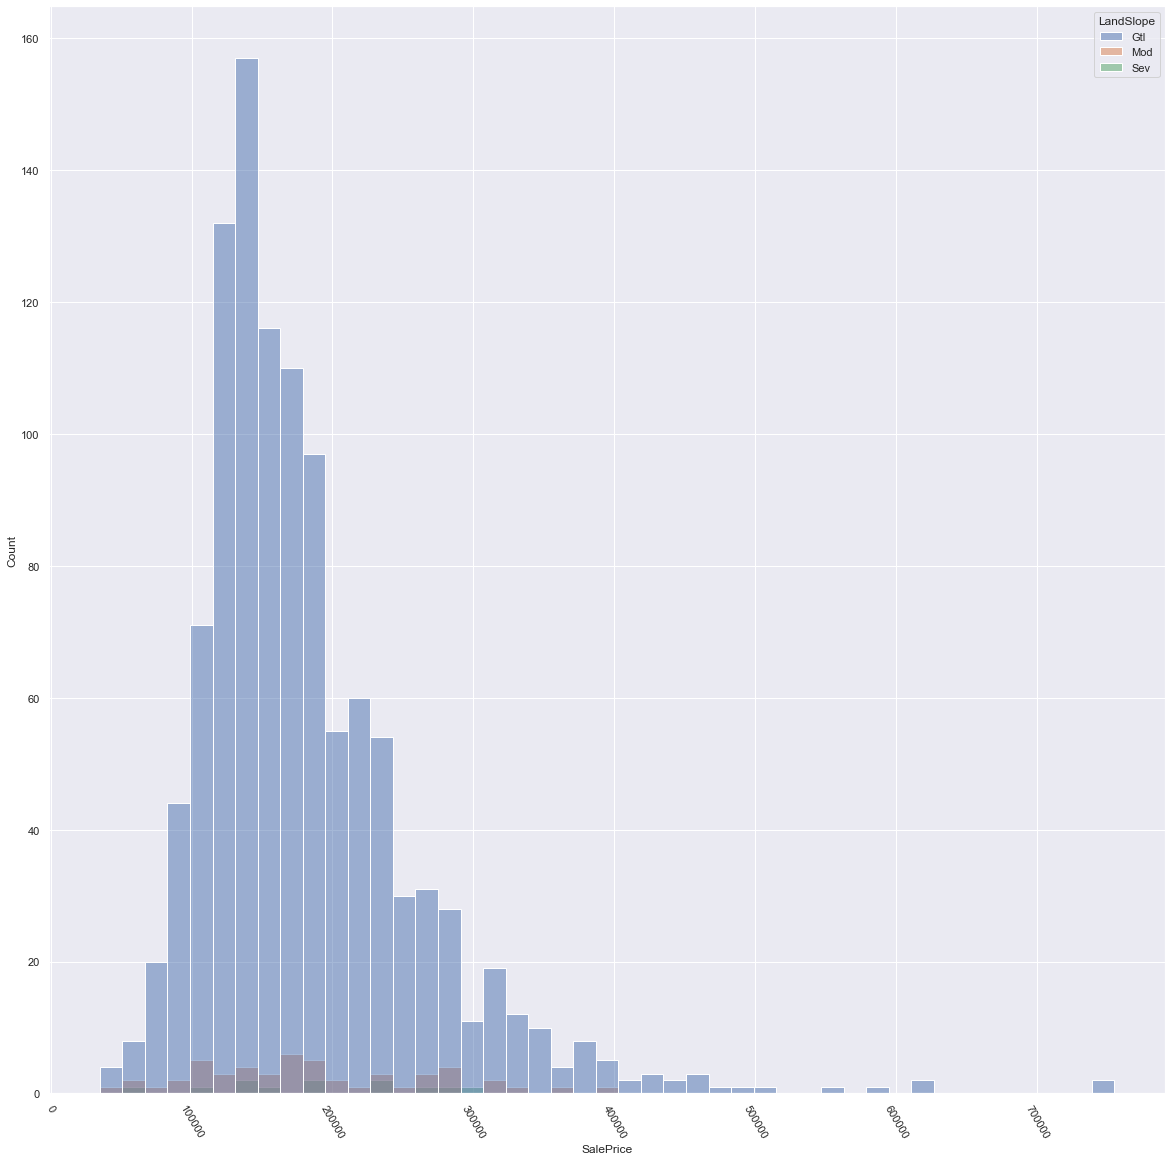

Neighborhood vs salesprice
NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
Timber      24
ClearCr     24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64


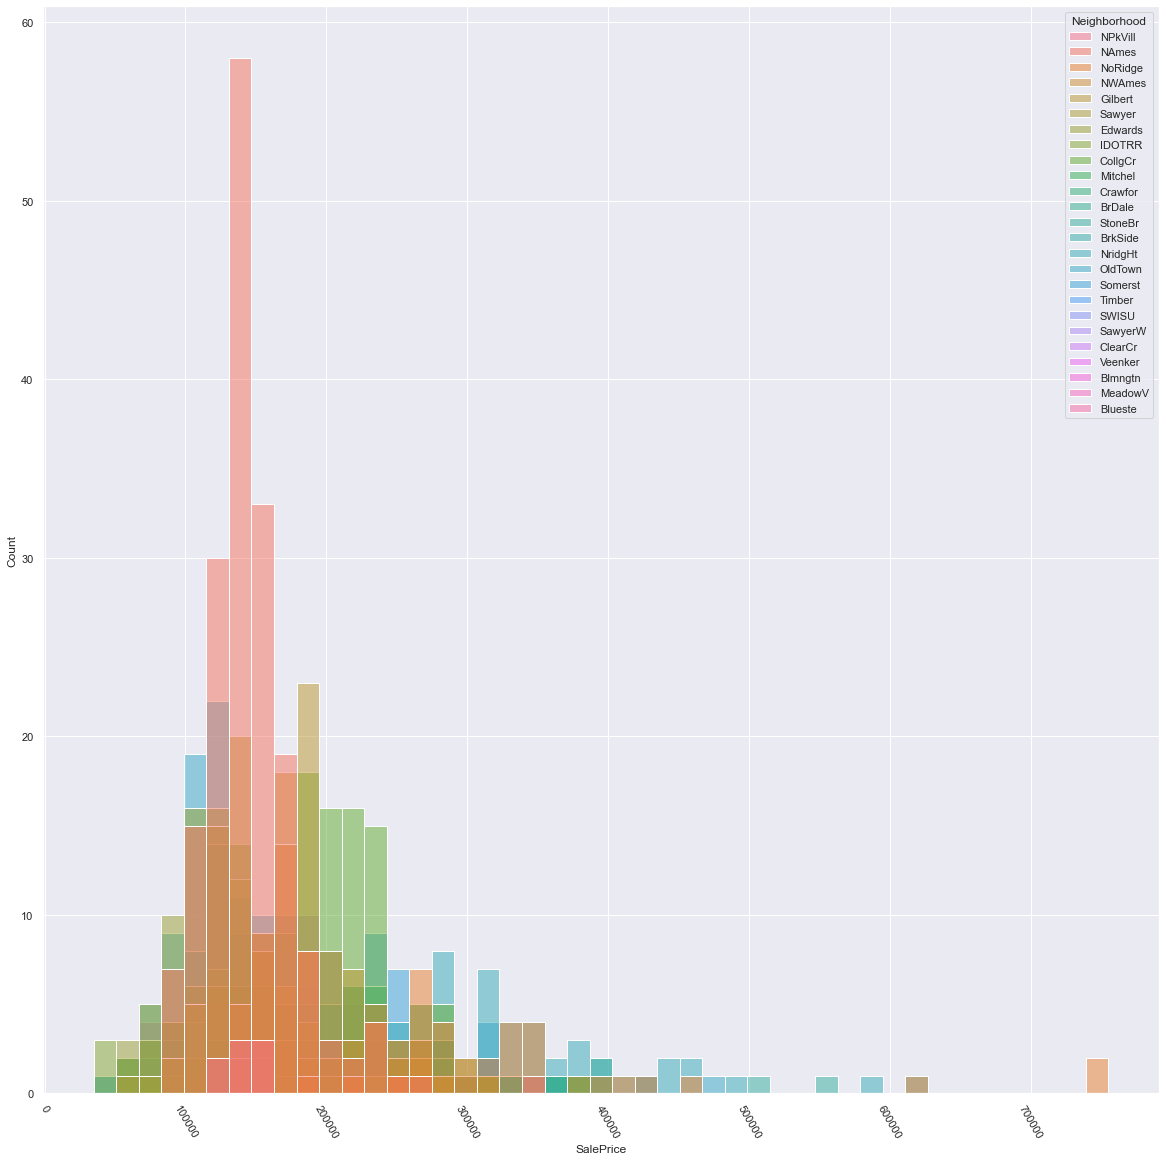

Condition1 vs salesprice
Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64


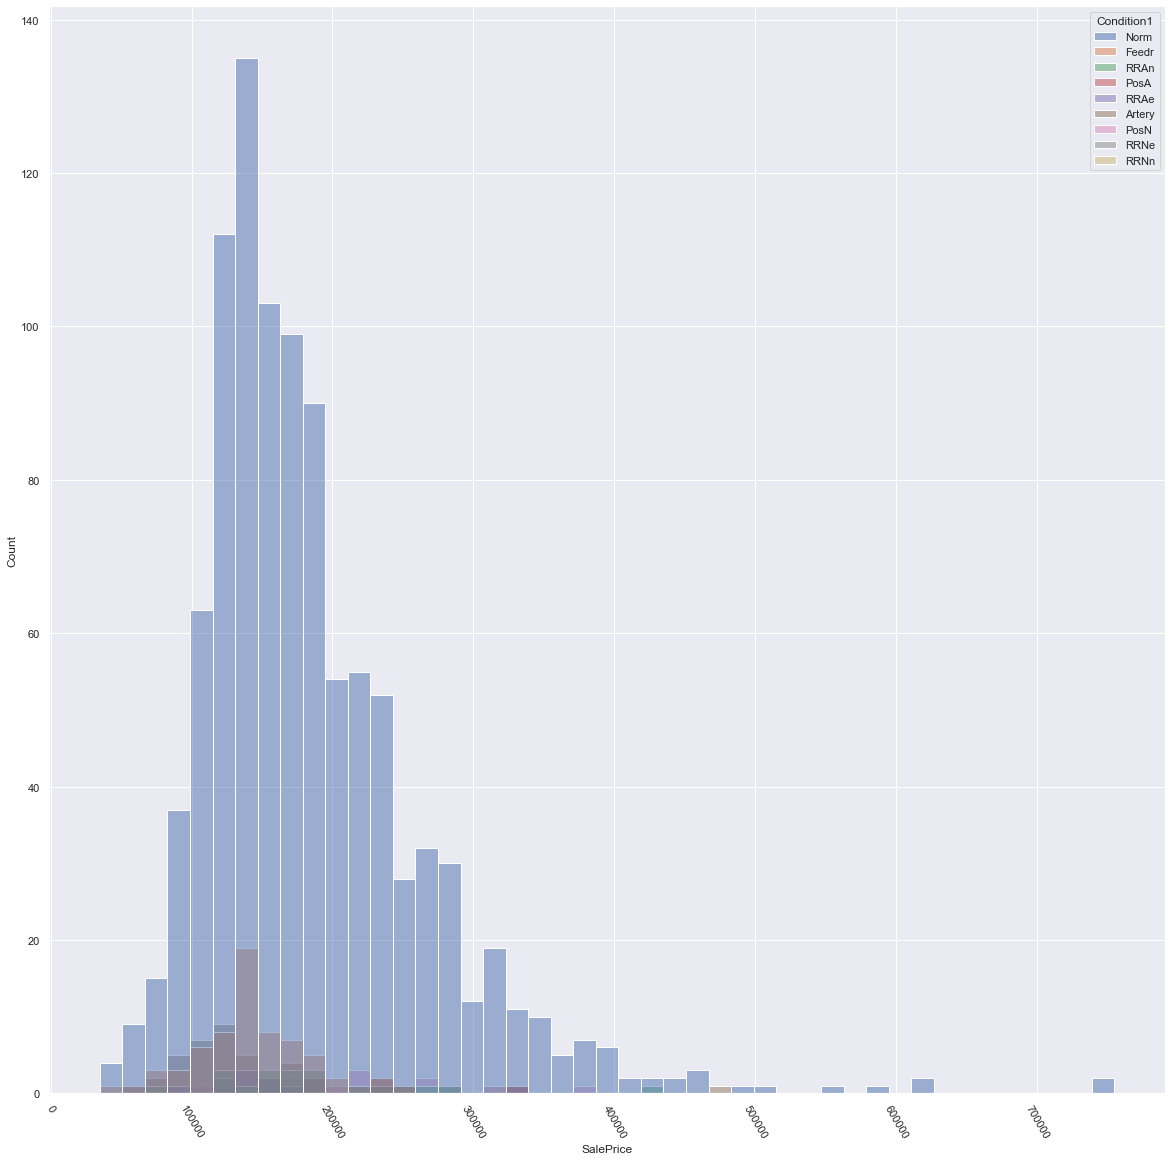

Condition2 vs salesprice
Norm      1154
Feedr        6
PosN         2
Artery       2
RRAe         1
RRNn         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64


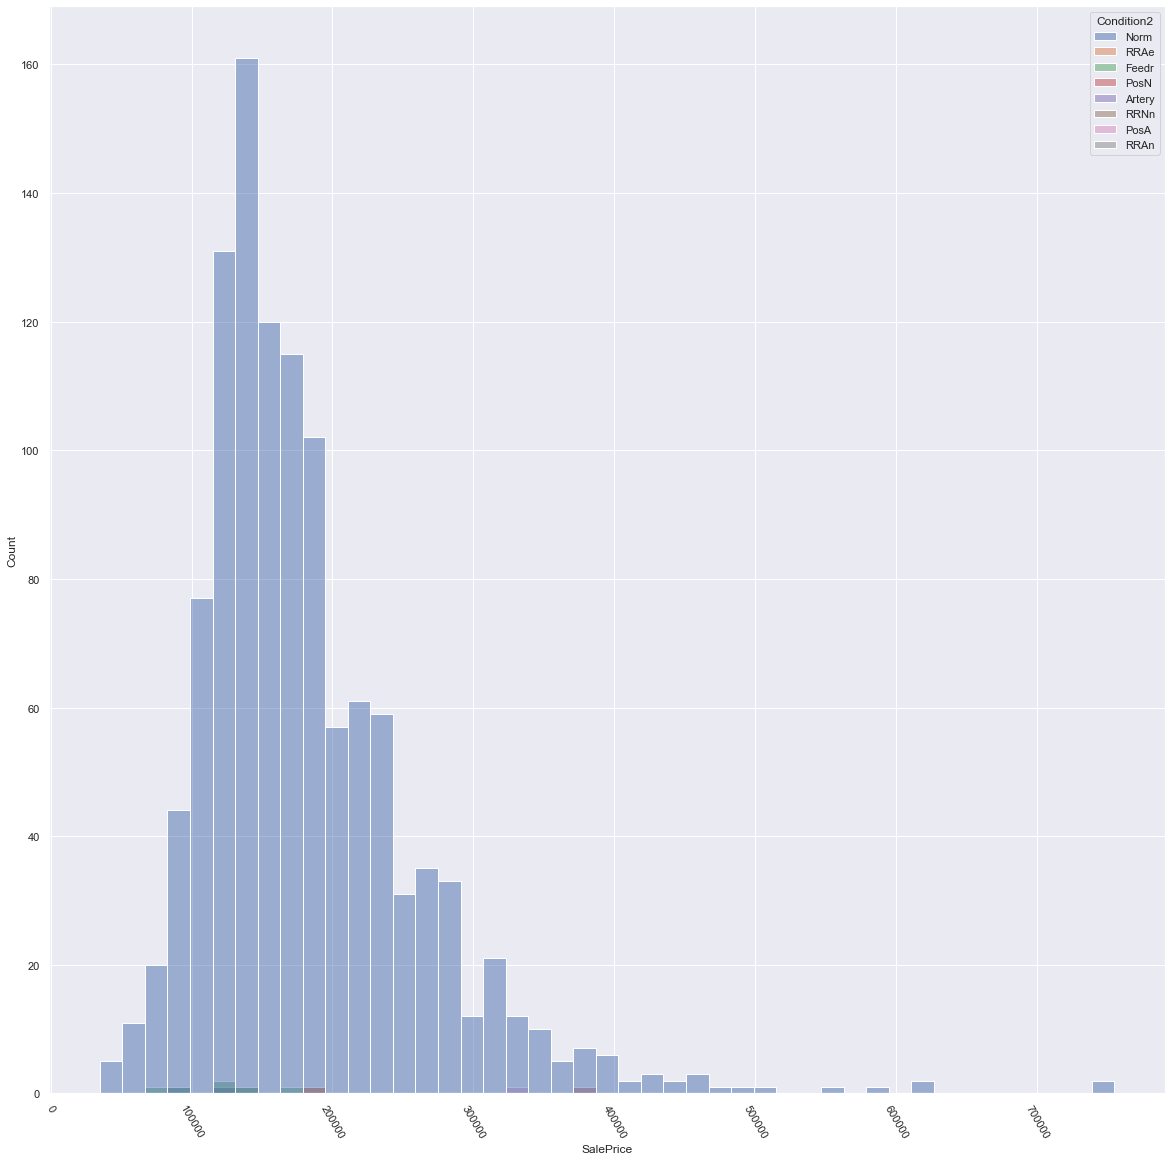

BldgType vs salesprice
1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64


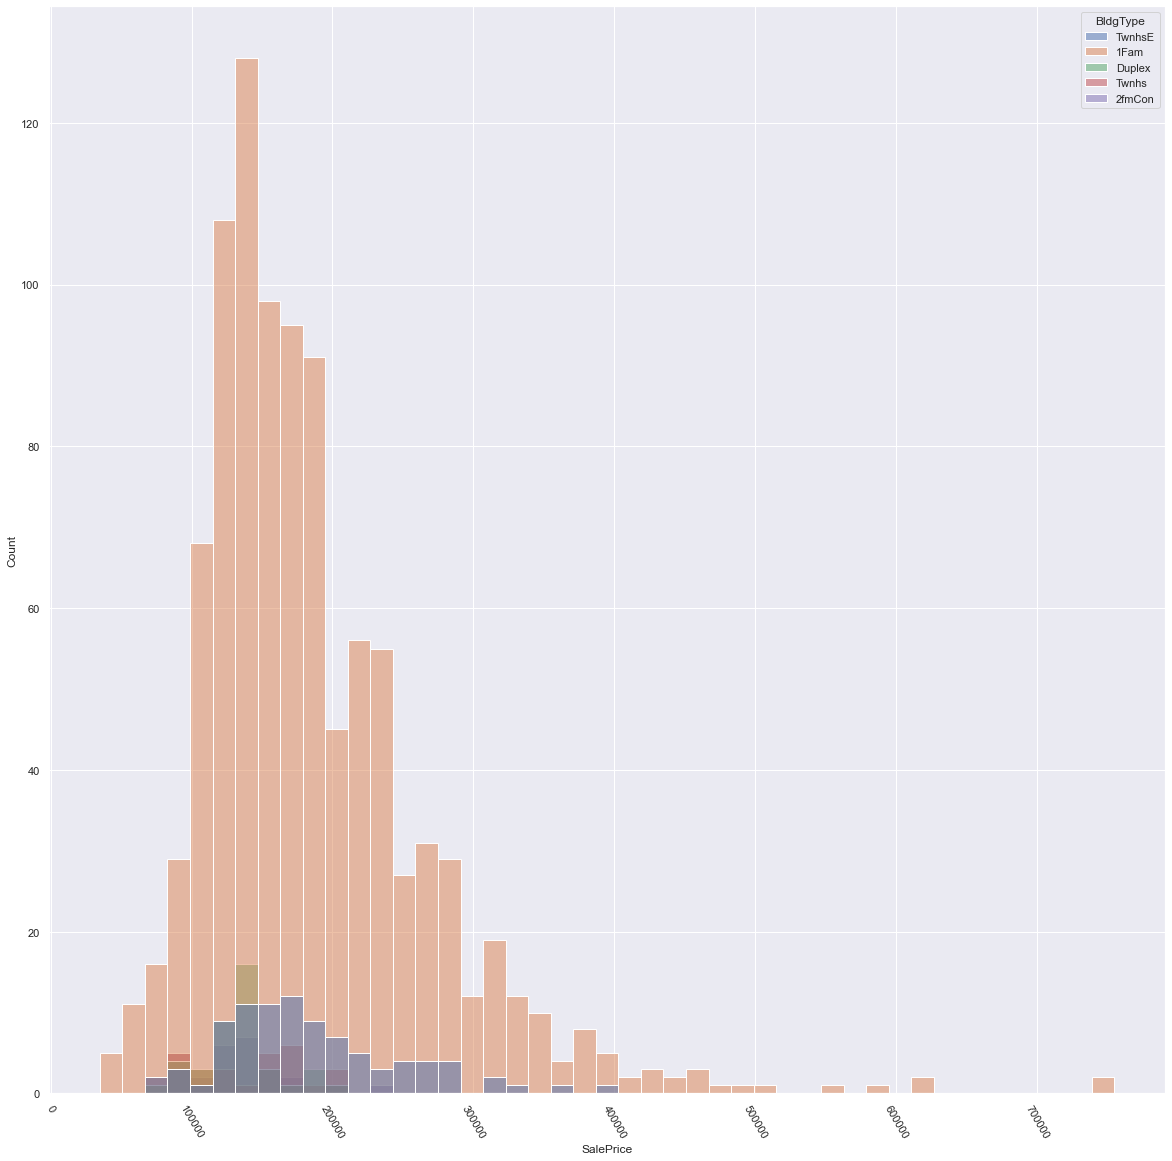

HouseStyle vs salesprice
1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64


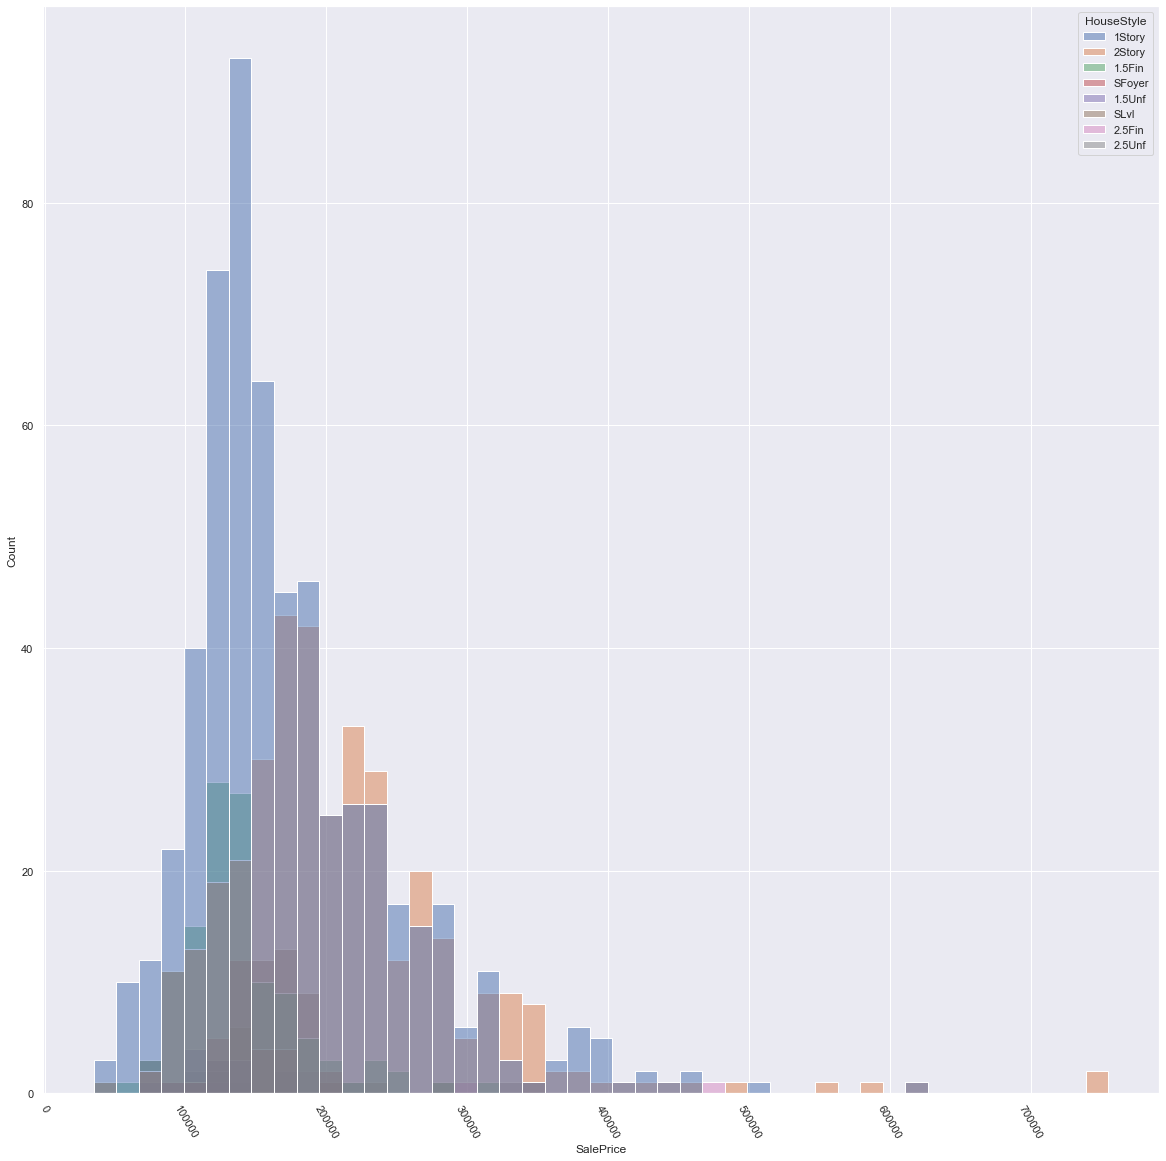

RoofStyle vs salesprice
Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64


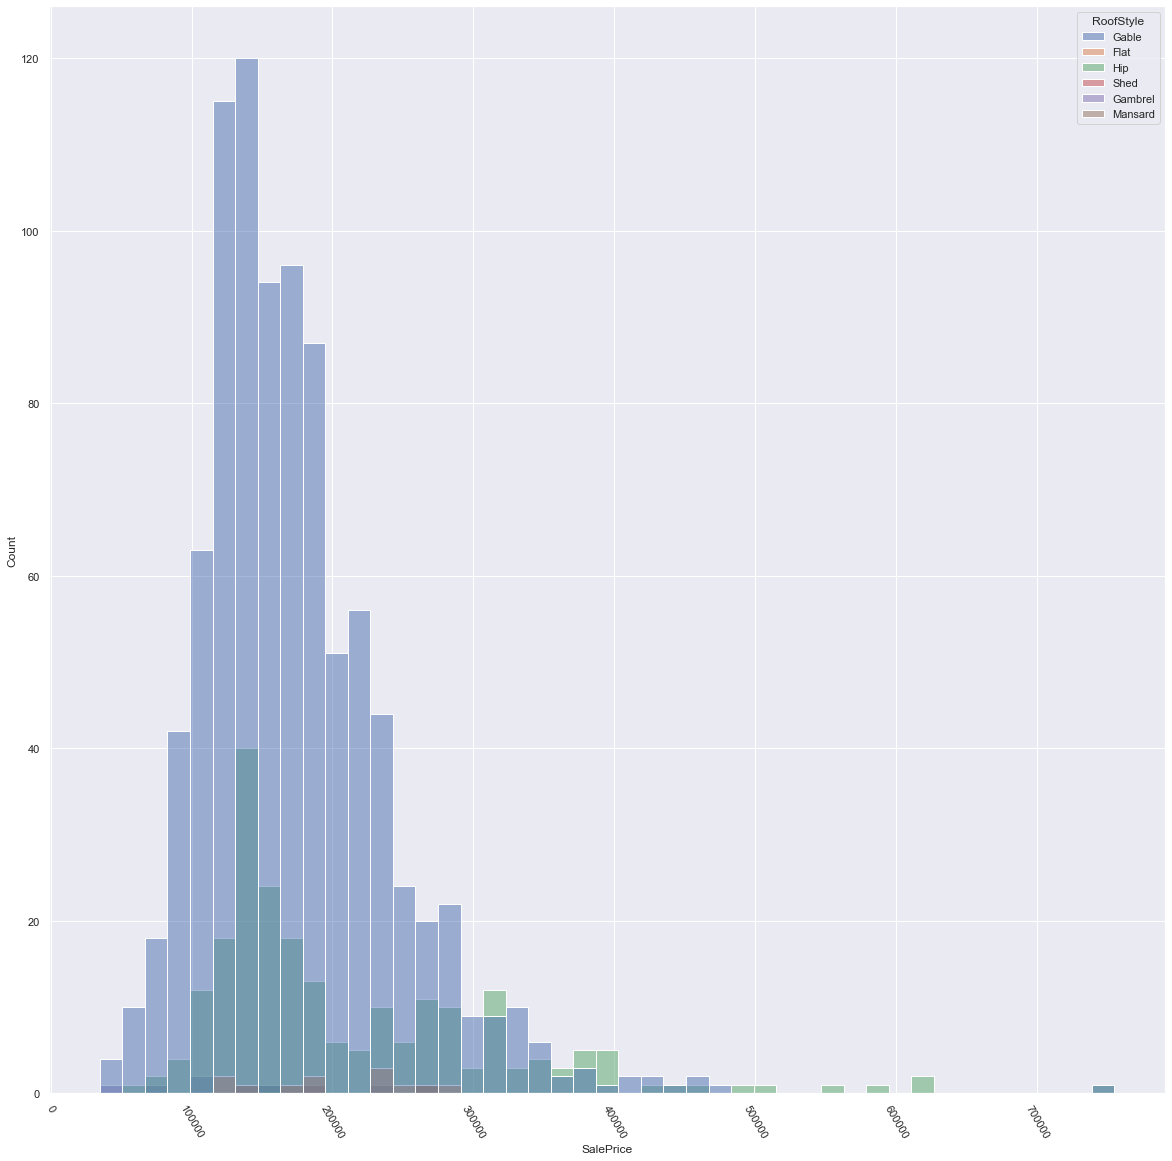

RoofMatl vs salesprice
CompShg    1144
Tar&Grv      10
WdShngl       6
WdShake       4
Roll          1
ClyTile       1
Metal         1
Membran       1
Name: RoofMatl, dtype: int64


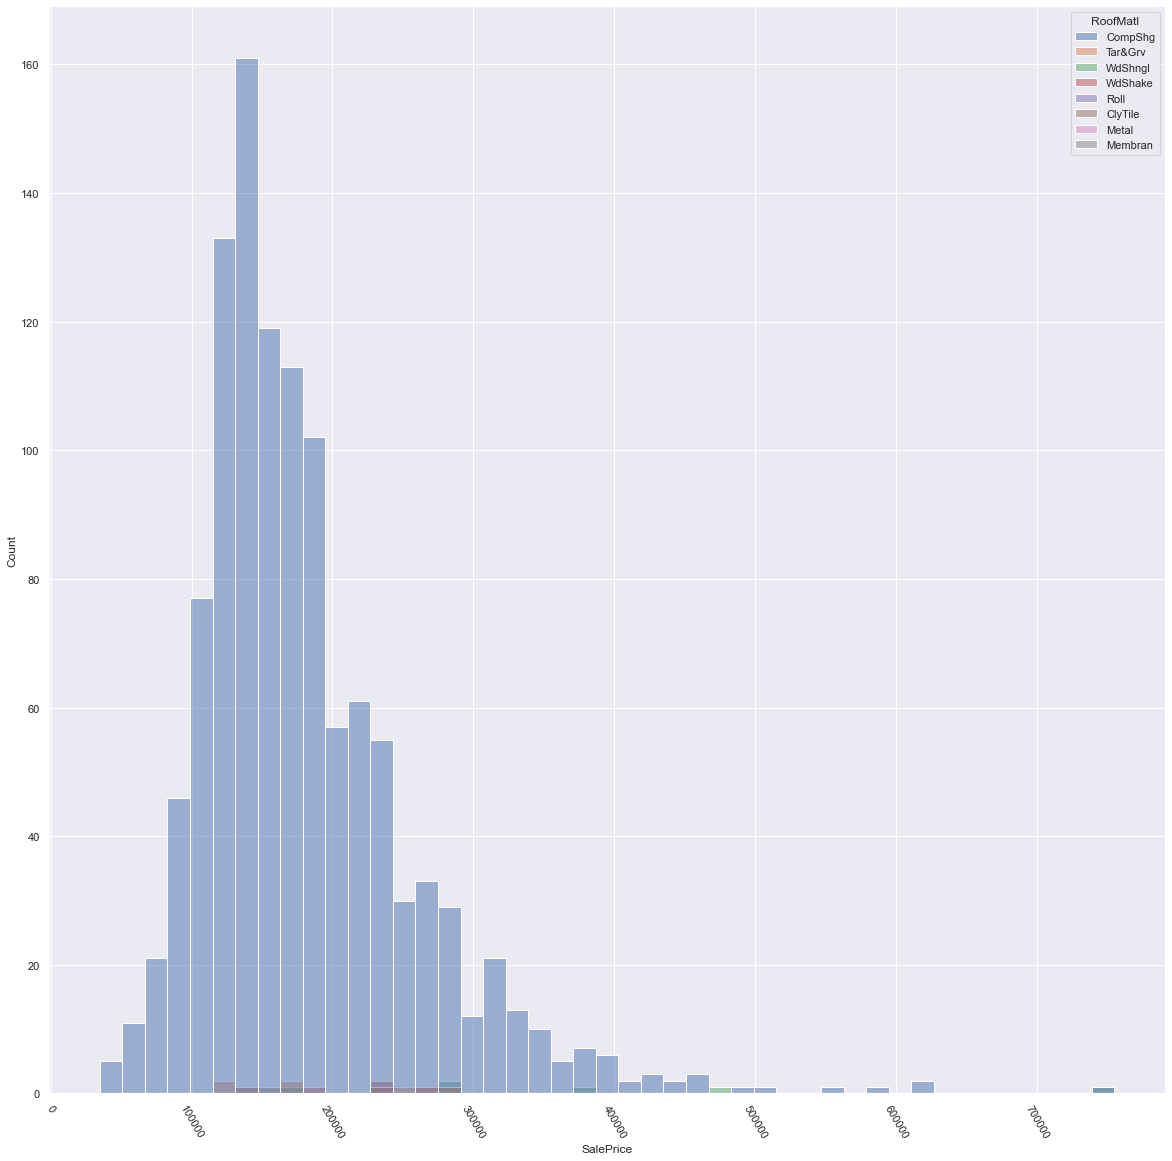

Exterior1st vs salesprice
VinylSd    396
HdBoard    179
MetalSd    178
Wd Sdng    174
Plywood     93
CemntBd     42
BrkFace     41
Stucco      22
WdShing     19
AsbShng     19
Stone        2
AsphShn      1
ImStucc      1
BrkComm      1
Name: Exterior1st, dtype: int64


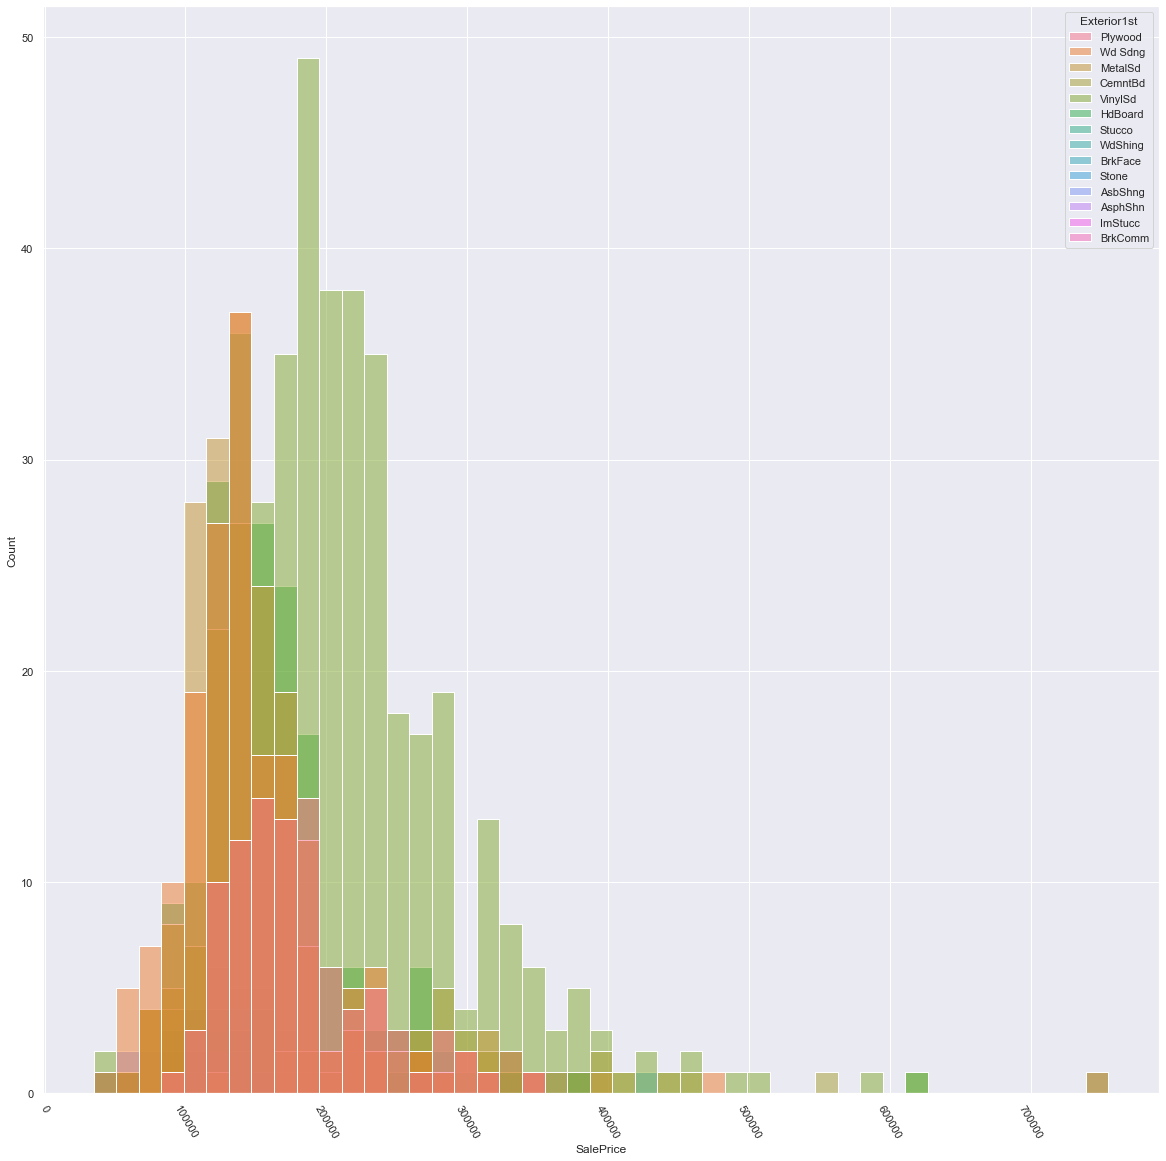

Exterior2nd vs salesprice
VinylSd    387
MetalSd    173
HdBoard    170
Wd Sdng    165
Plywood    118
CmentBd     42
Wd Shng     31
Stucco      23
BrkFace     20
AsbShng     18
ImStucc      8
Brk Cmn      5
Stone        4
AsphShn      3
Other        1
Name: Exterior2nd, dtype: int64


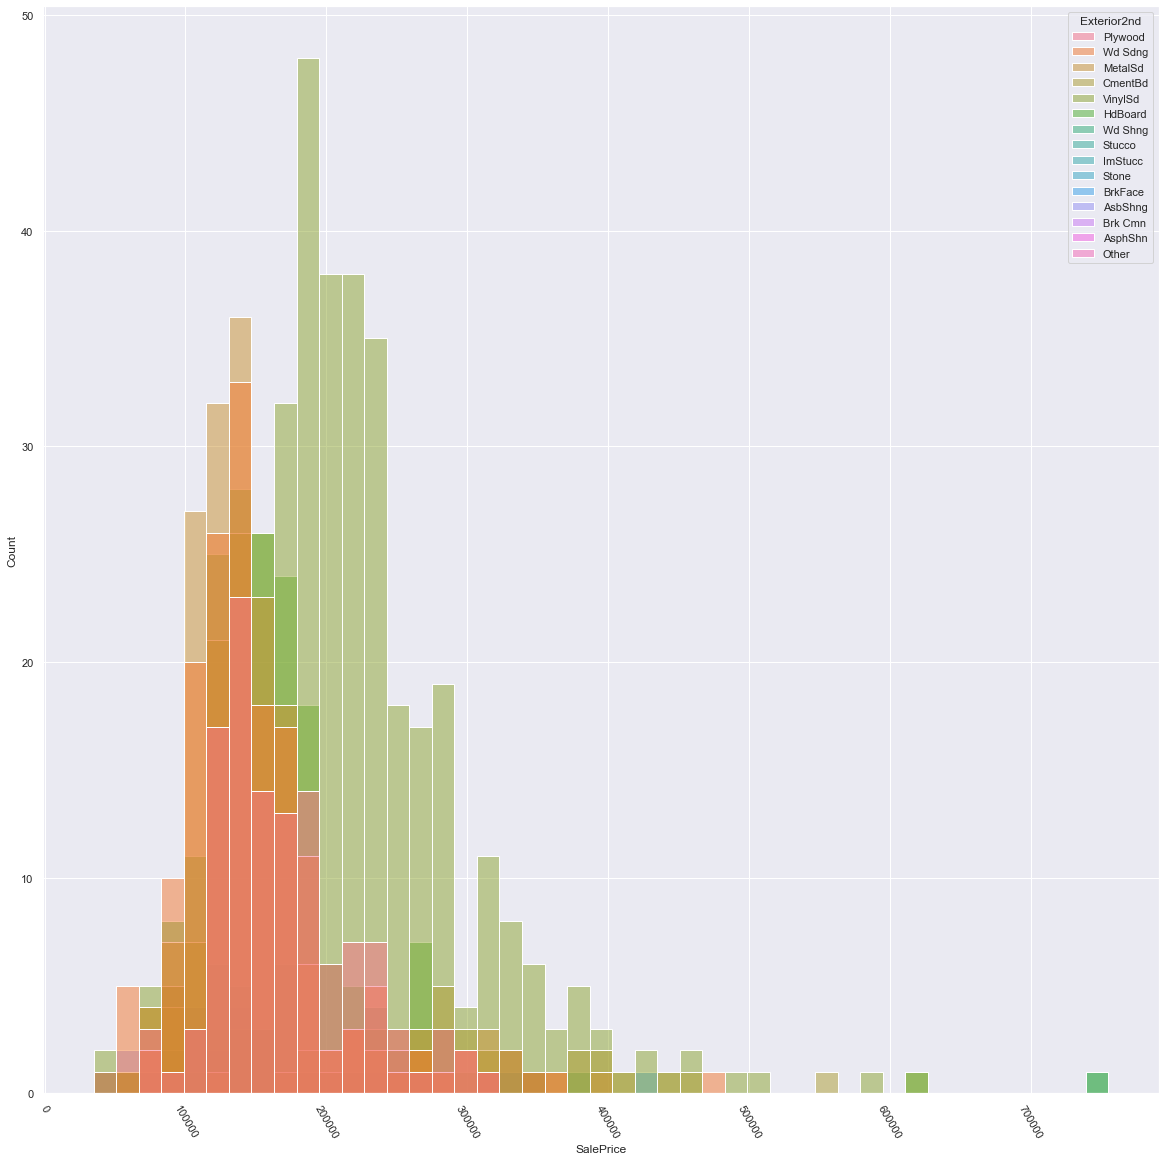

MasVnrType vs salesprice
None       703
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64


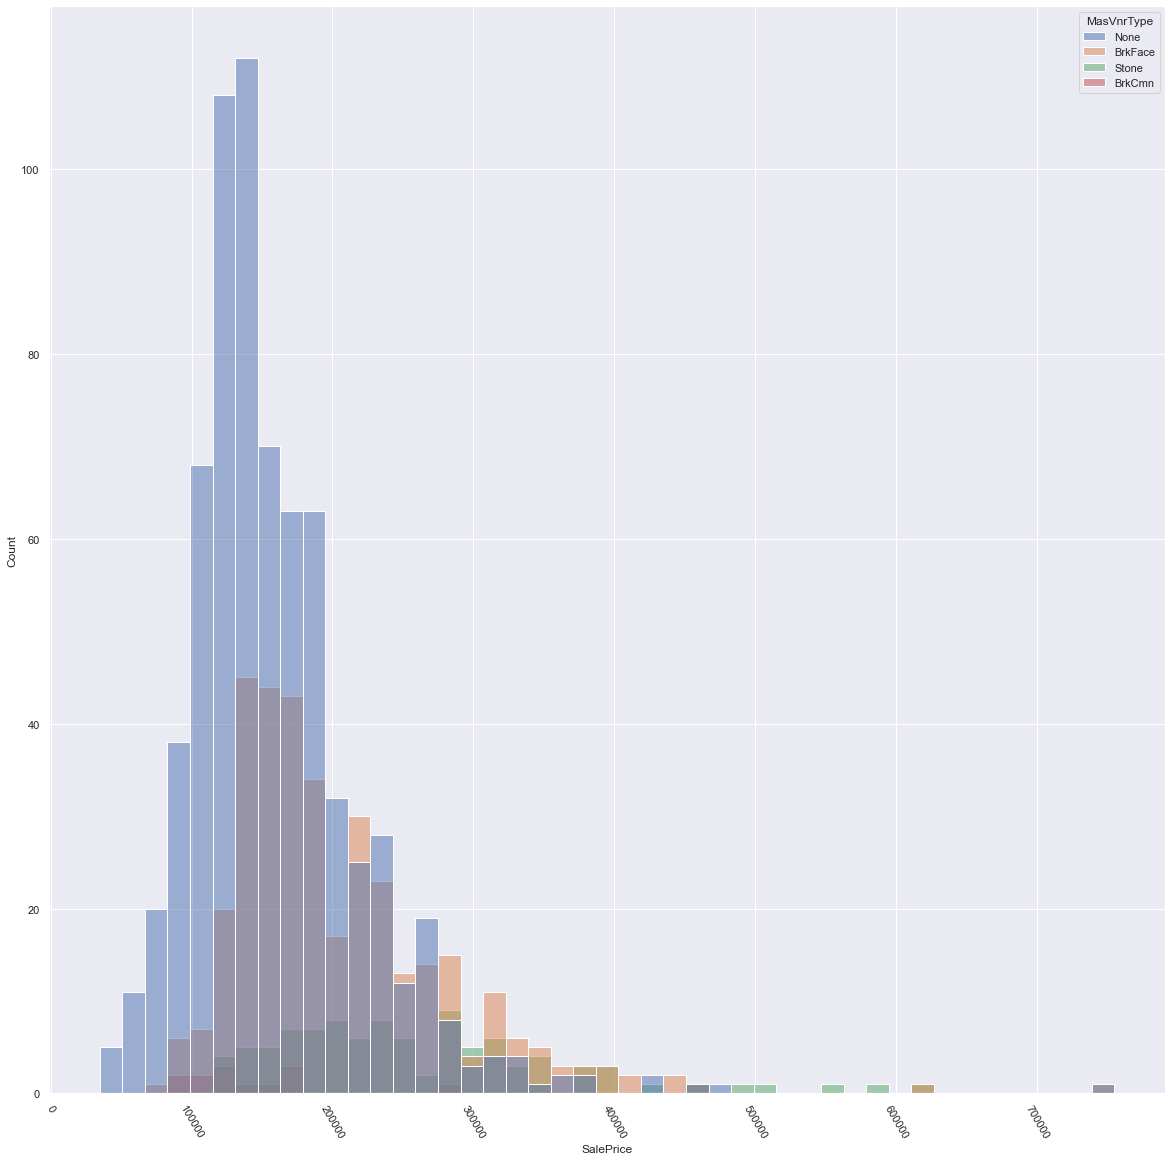

ExterQual vs salesprice
TA    717
Gd    397
Ex     43
Fa     11
Name: ExterQual, dtype: int64


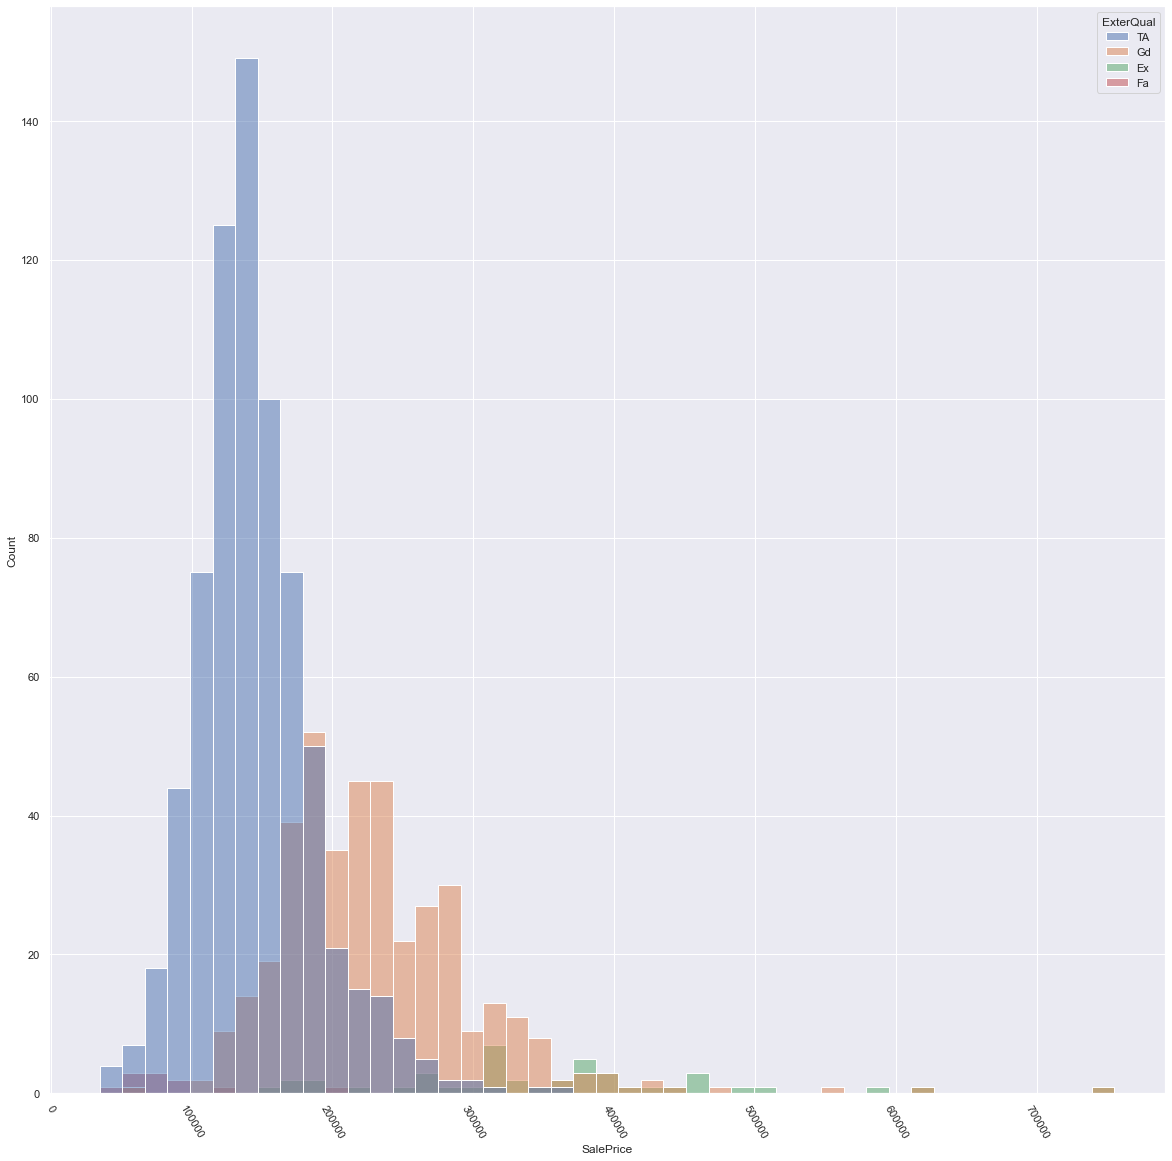

ExterCond vs salesprice
TA    1022
Gd     117
Fa      26
Ex       2
Po       1
Name: ExterCond, dtype: int64


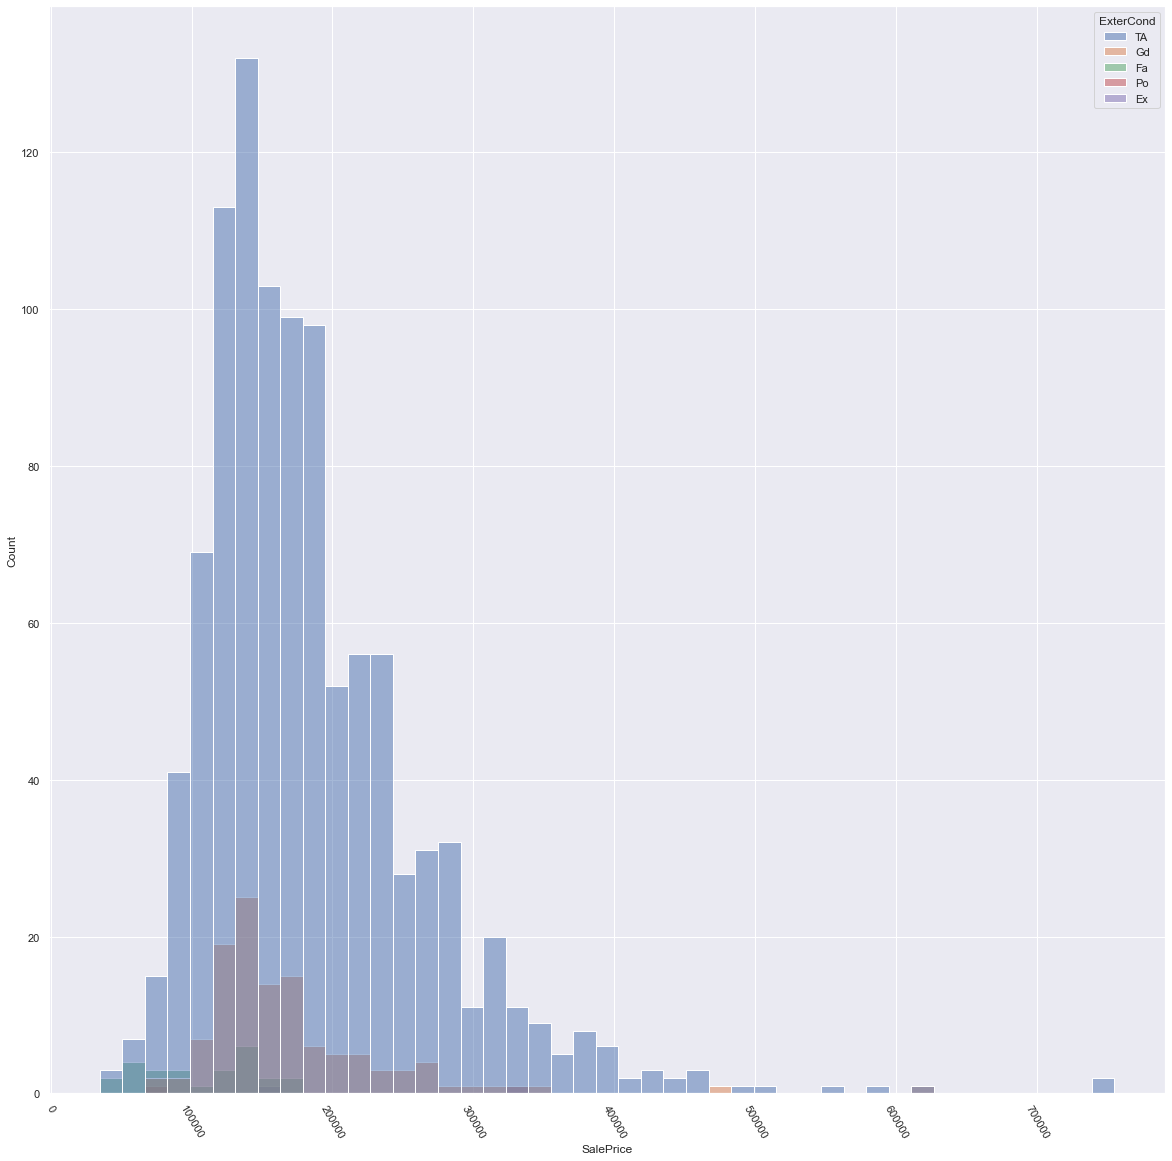

Foundation vs salesprice
CBlock    516
PConc     513
BrkTil    112
Slab       21
Stone       5
Wood        1
Name: Foundation, dtype: int64


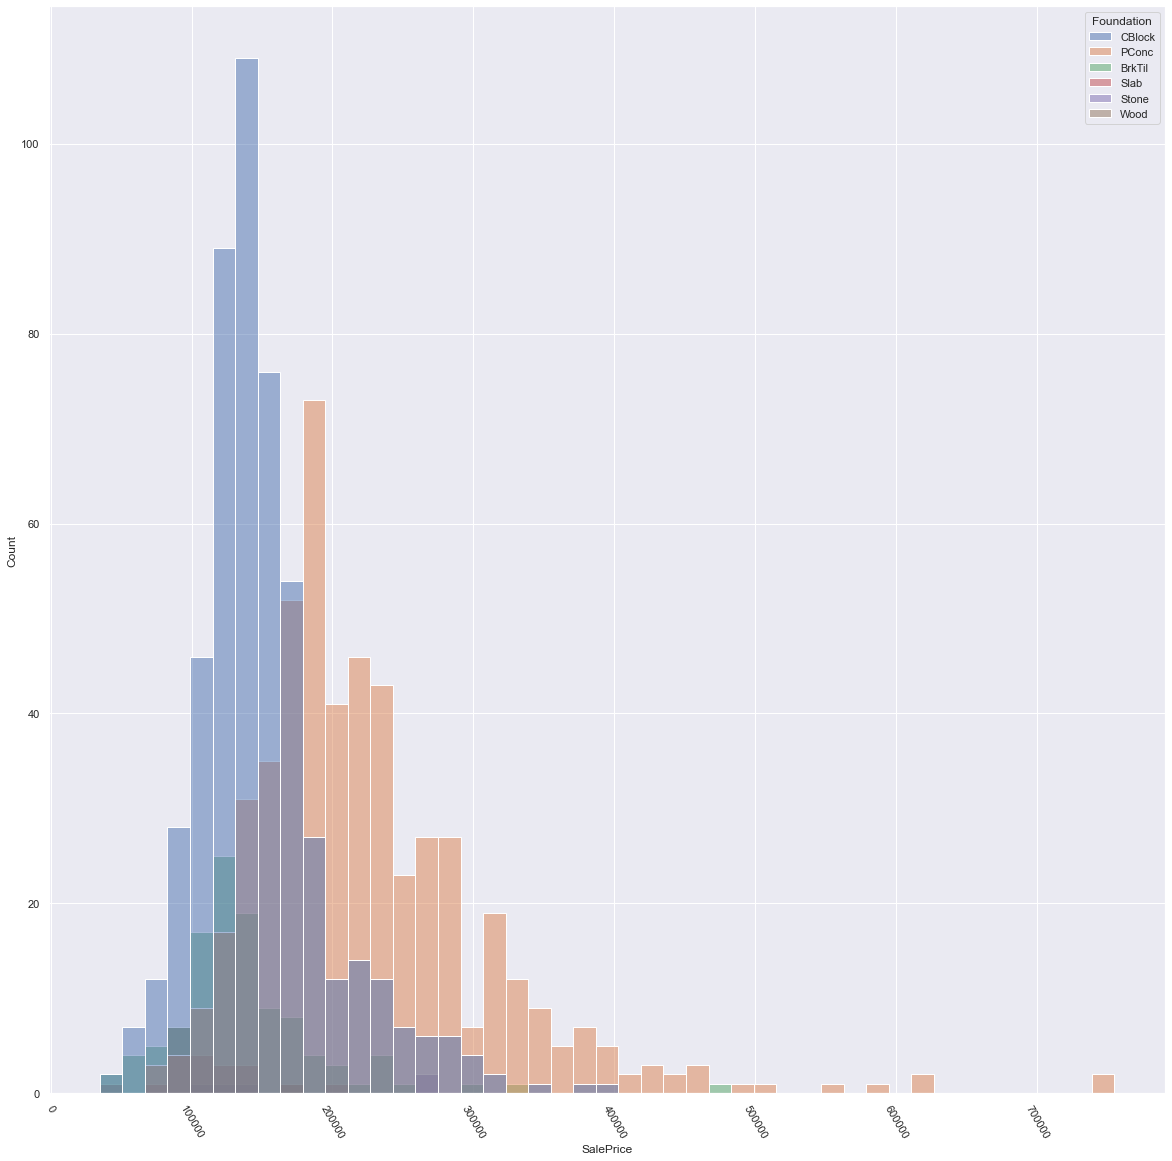

BsmtQual vs salesprice
TA    547
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64


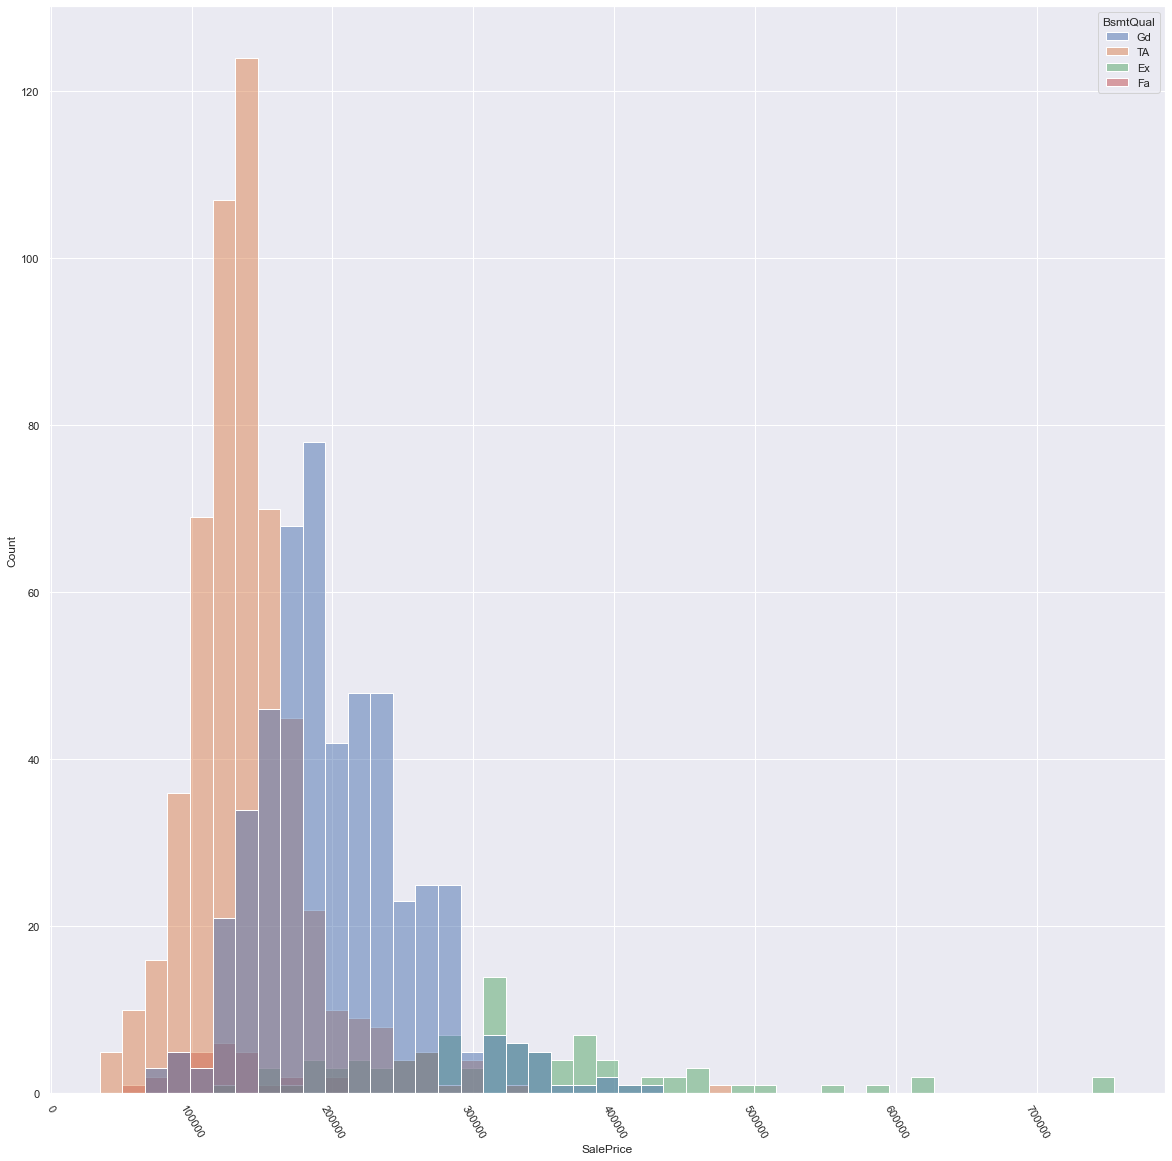

BsmtCond vs salesprice
TA    1071
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64


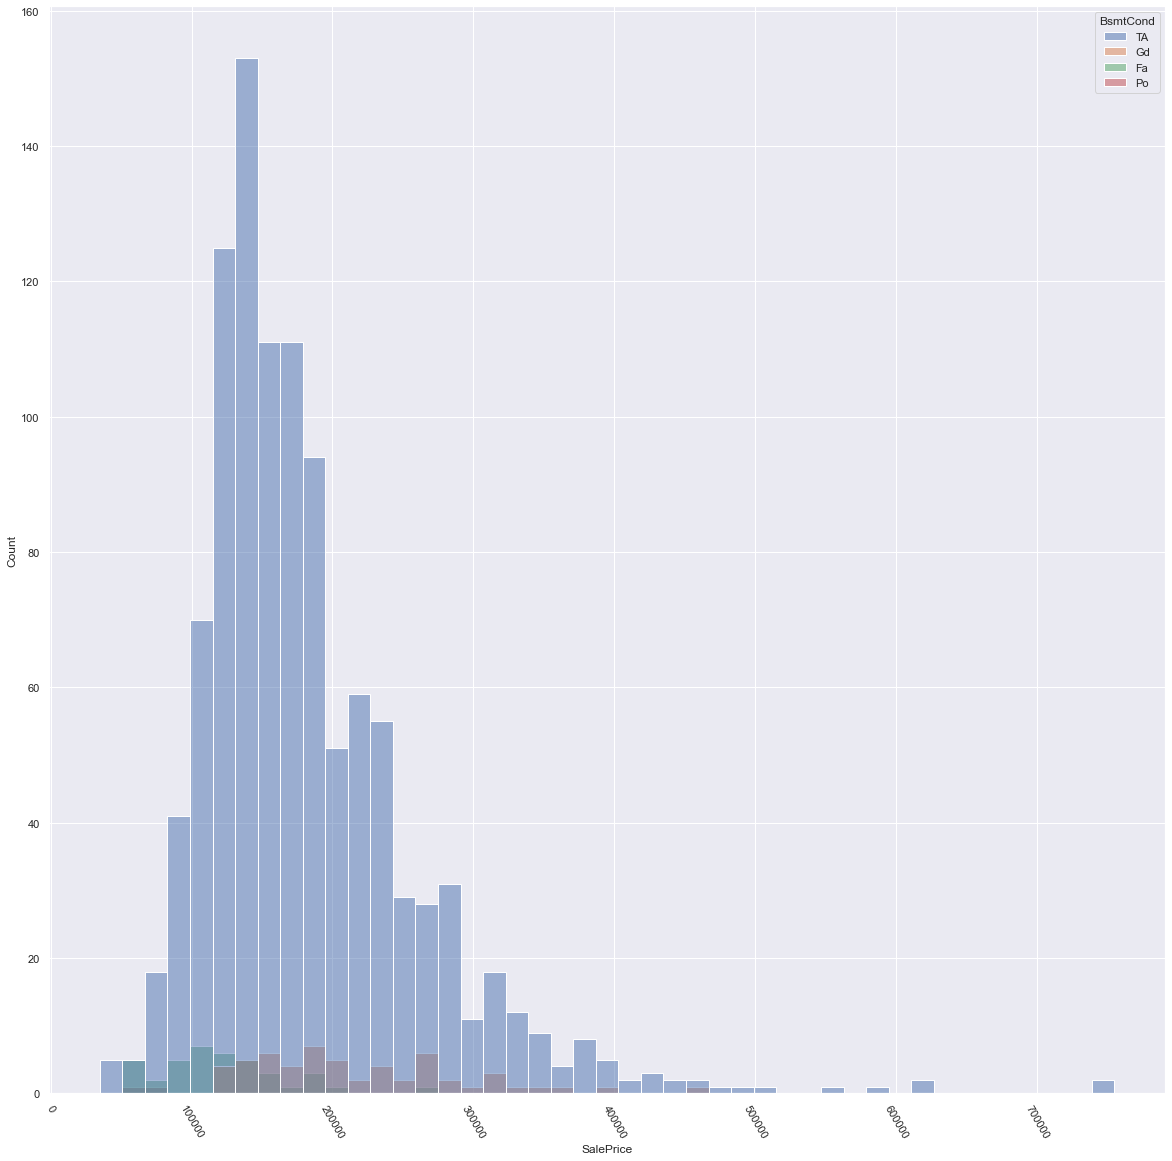

BsmtExposure vs salesprice
No    787
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64


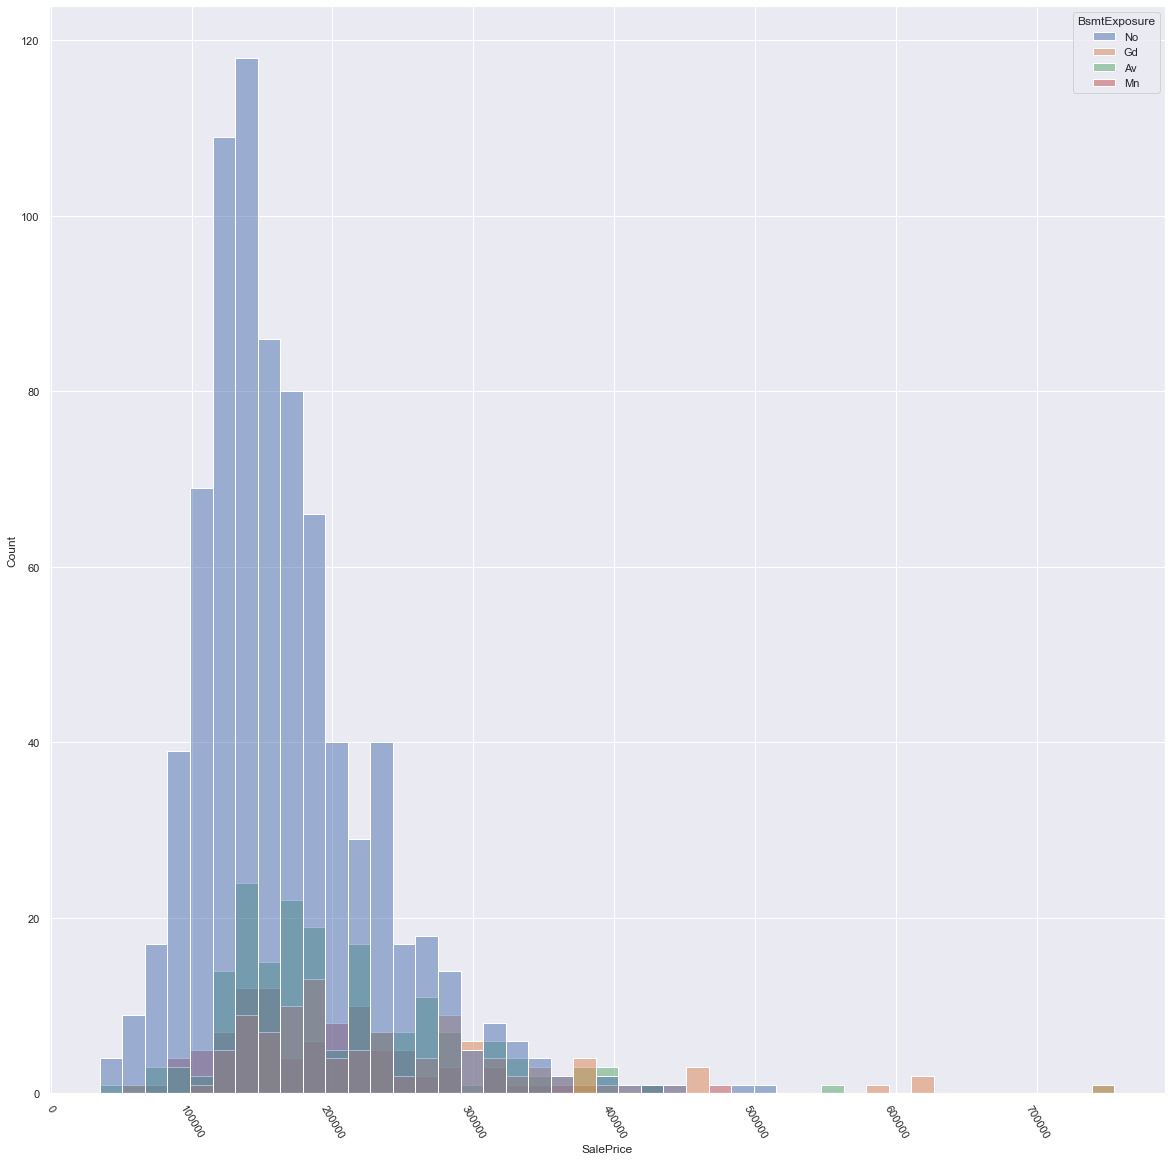

BsmtFinType1 vs salesprice
Unf    375
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64


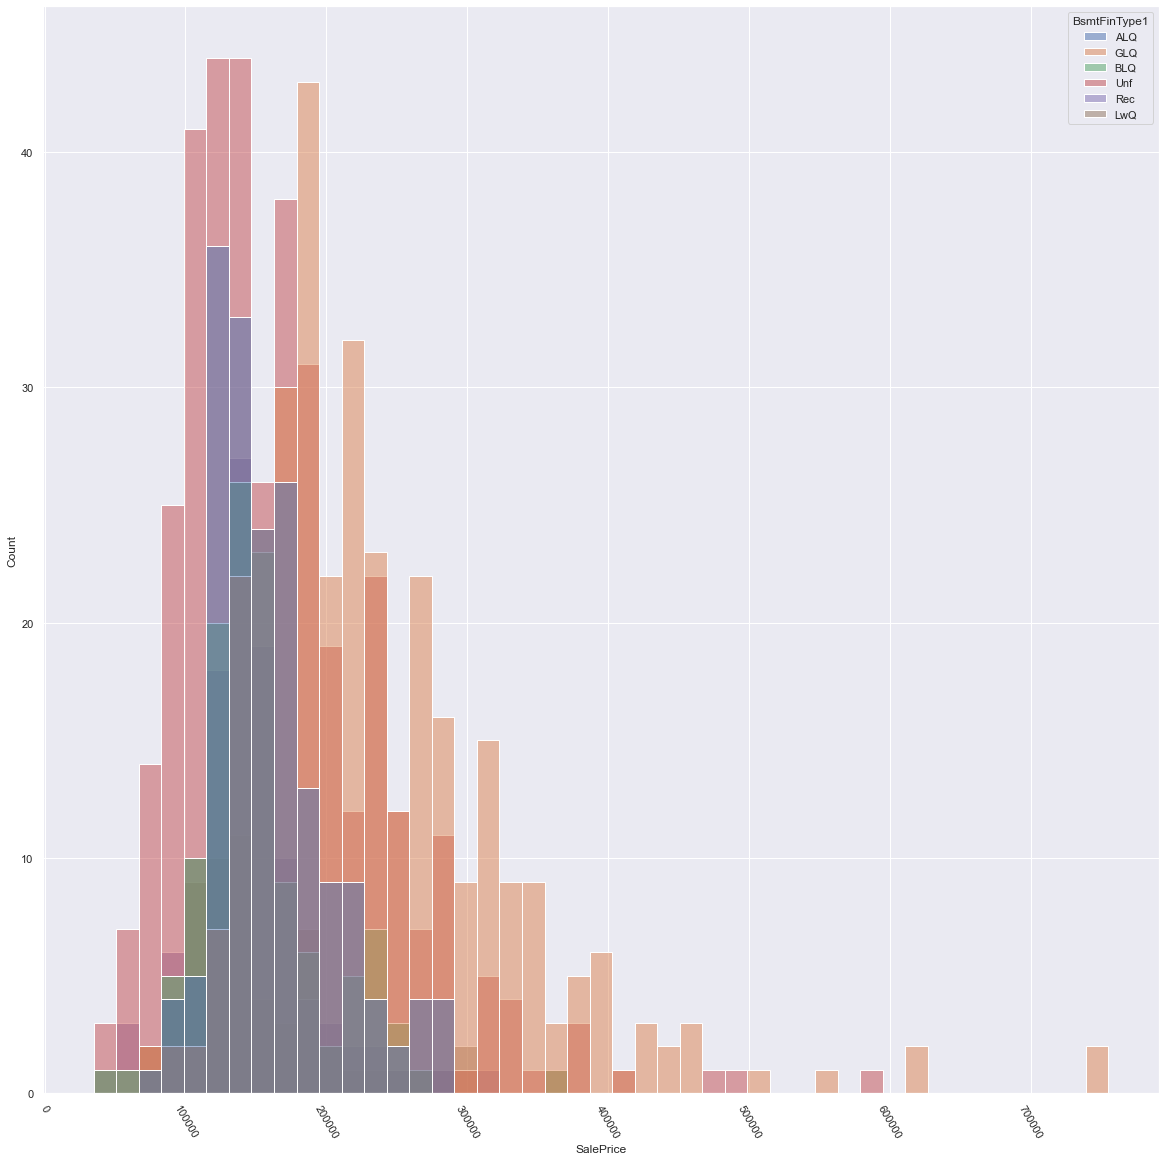

BsmtFinType2 vs salesprice
Unf    1033
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64


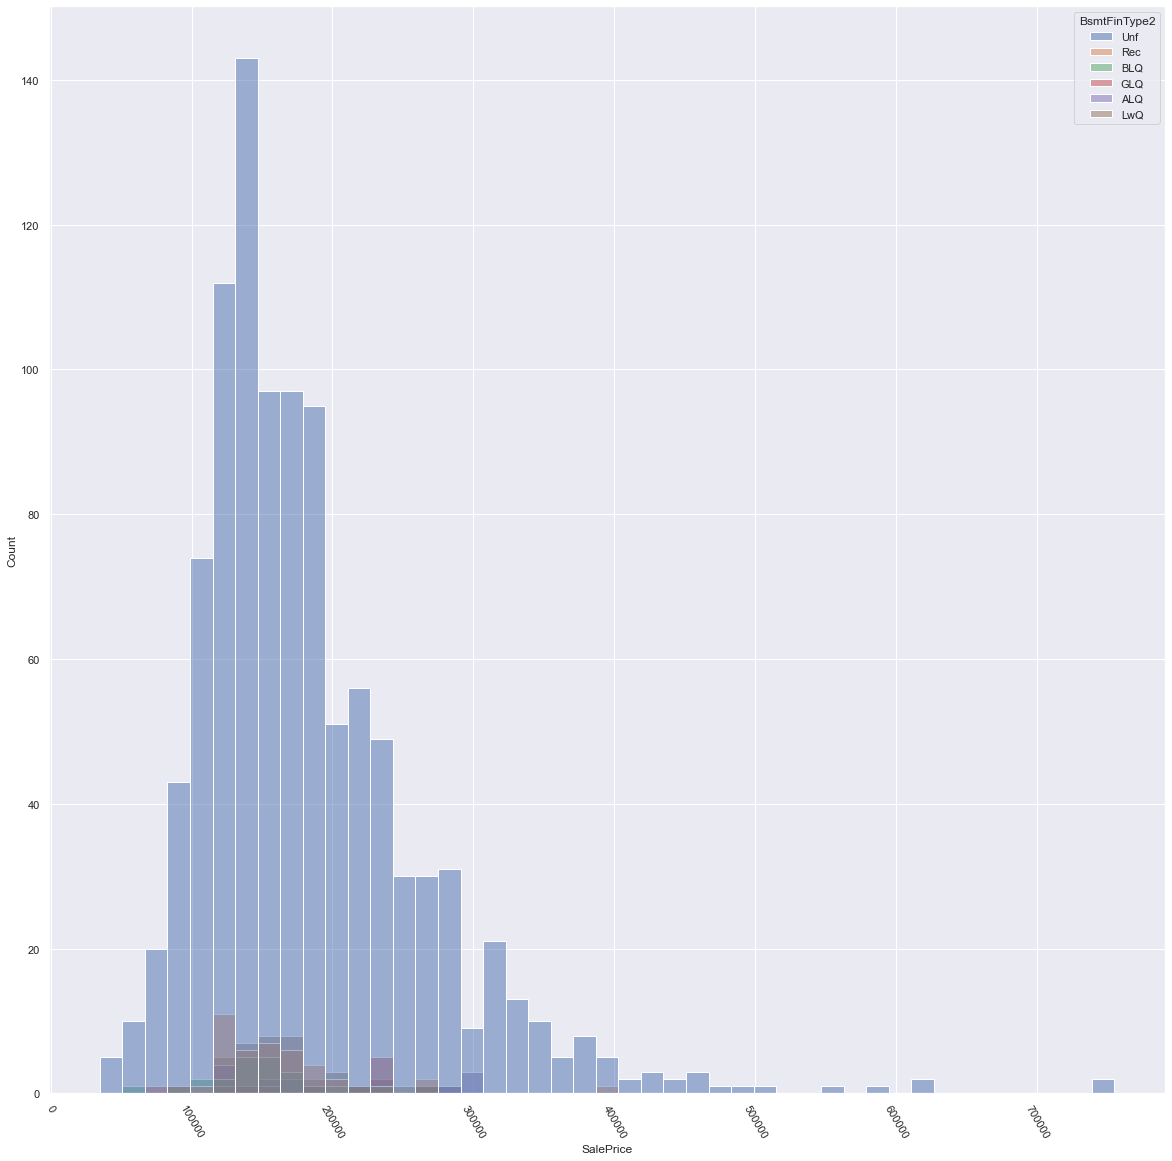

Heating vs salesprice
GasA     1143
GasW       14
Grav        5
Wall        4
Floor       1
OthW        1
Name: Heating, dtype: int64


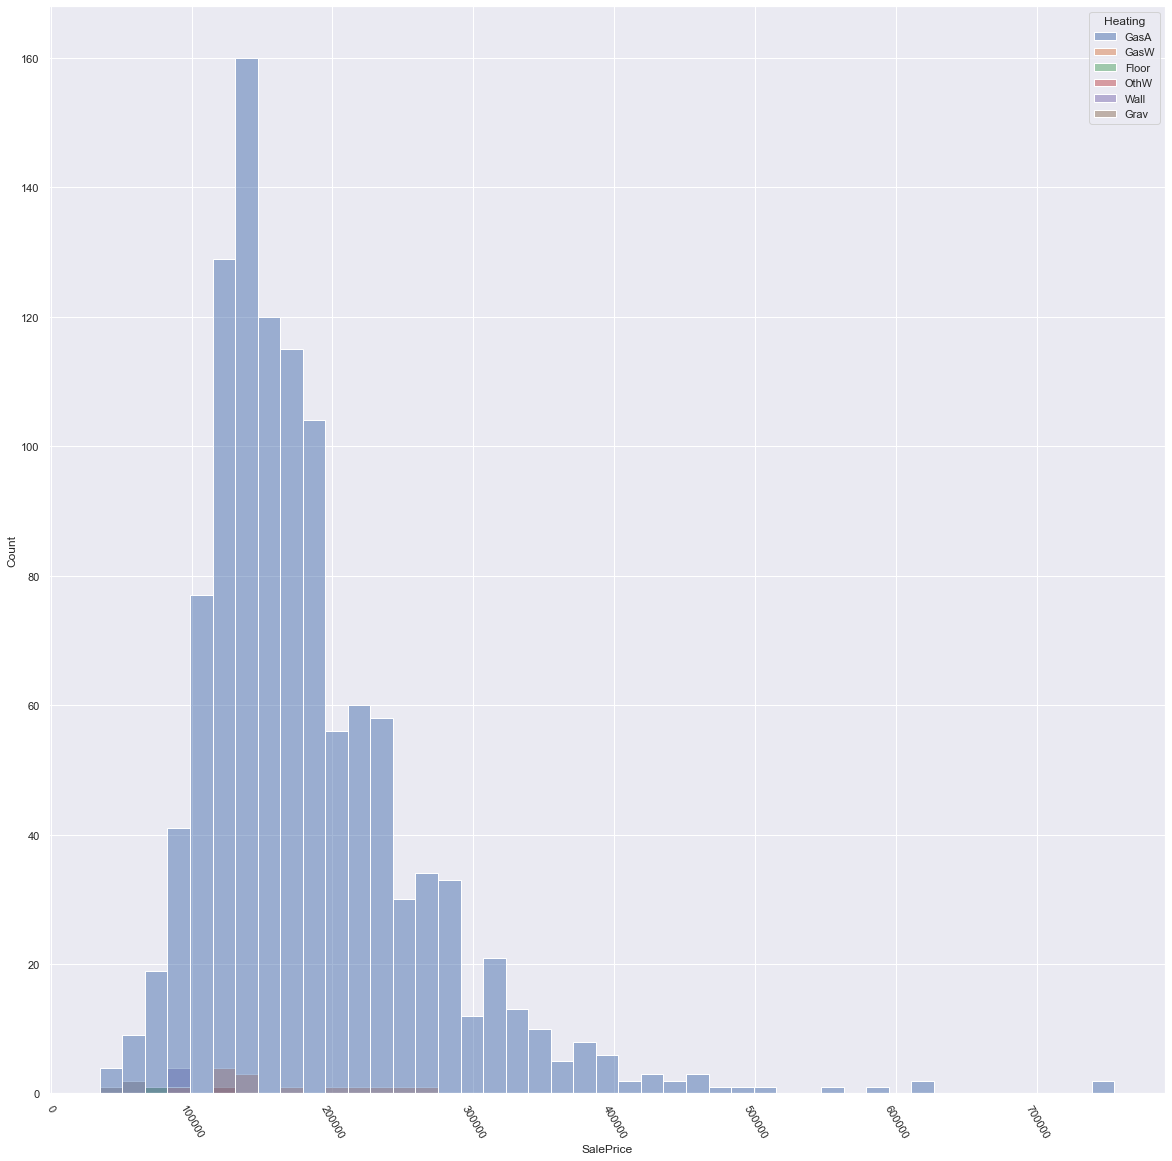

HeatingQC vs salesprice
Ex    585
TA    352
Gd    192
Fa     38
Po      1
Name: HeatingQC, dtype: int64


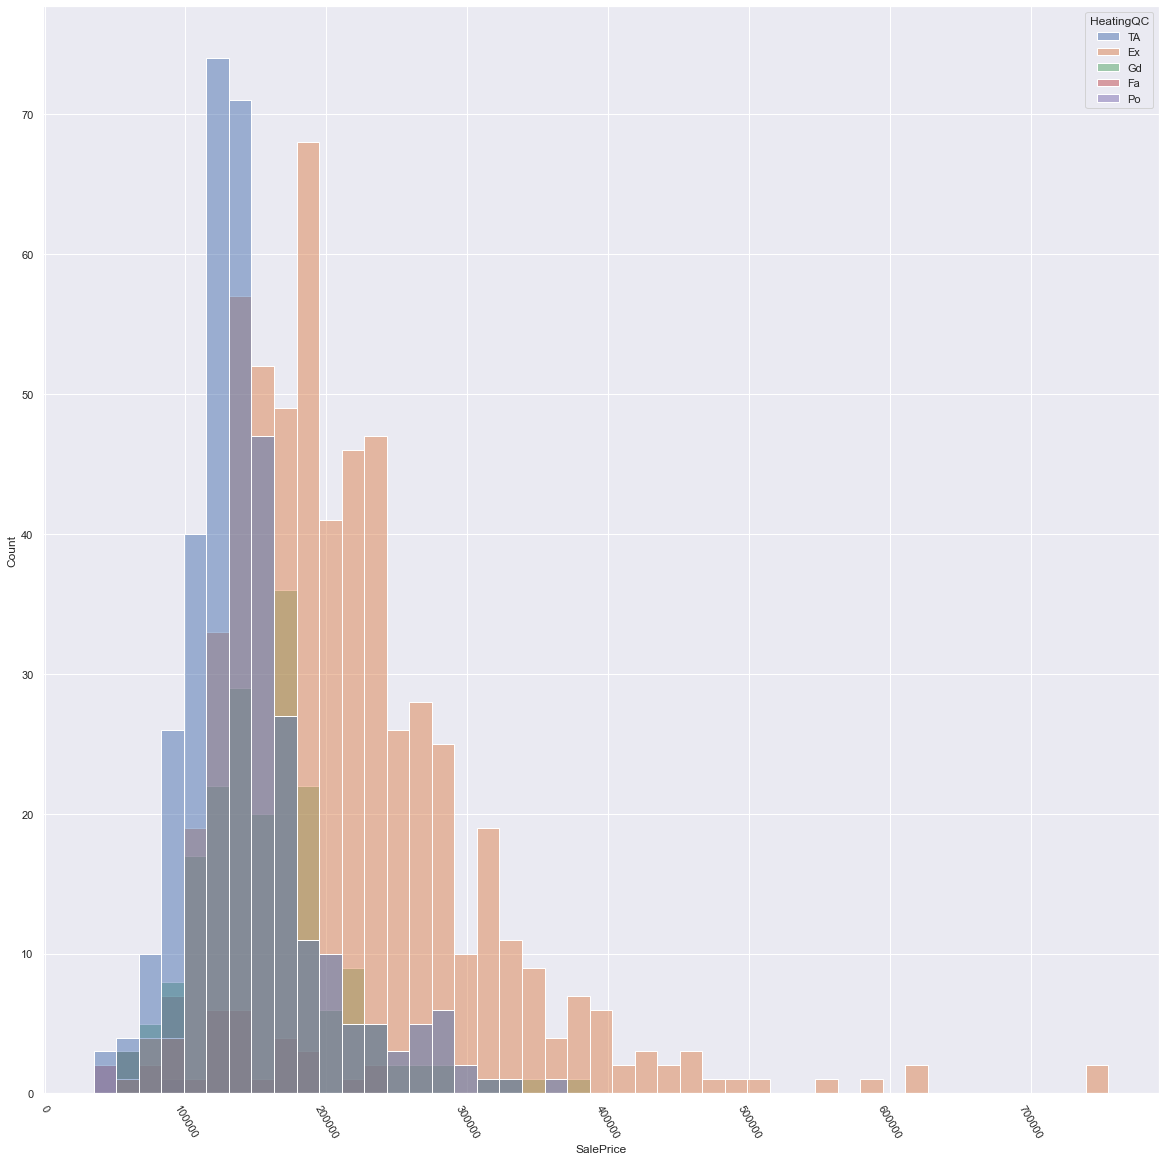

CentralAir vs salesprice
Y    1090
N      78
Name: CentralAir, dtype: int64


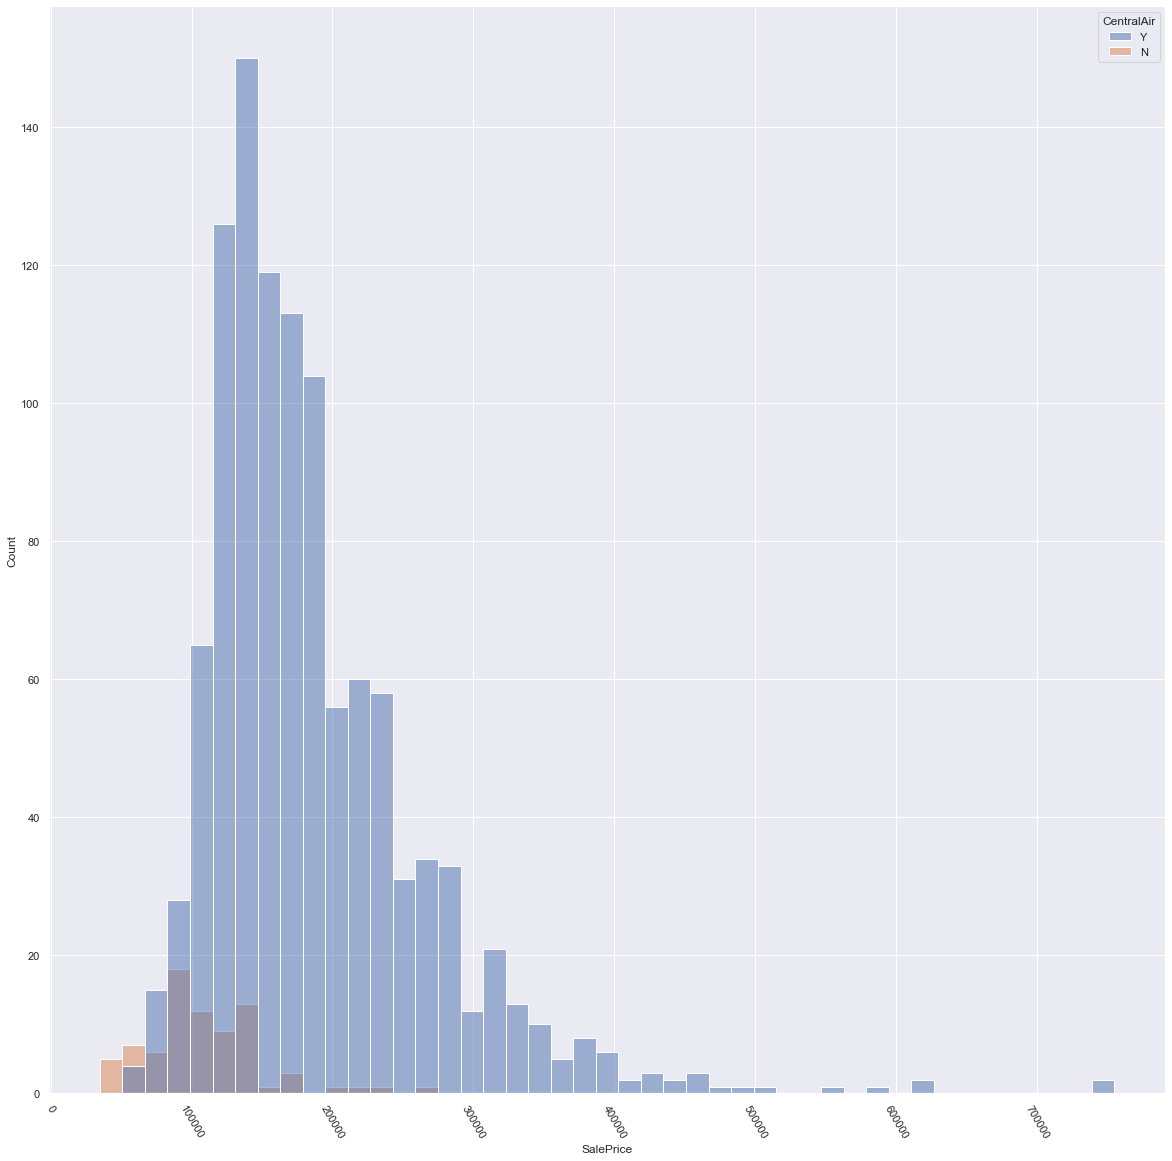

Electrical vs salesprice
SBrkr    1070
FuseA      74
FuseF      21
FuseP       2
Mix         1
Name: Electrical, dtype: int64


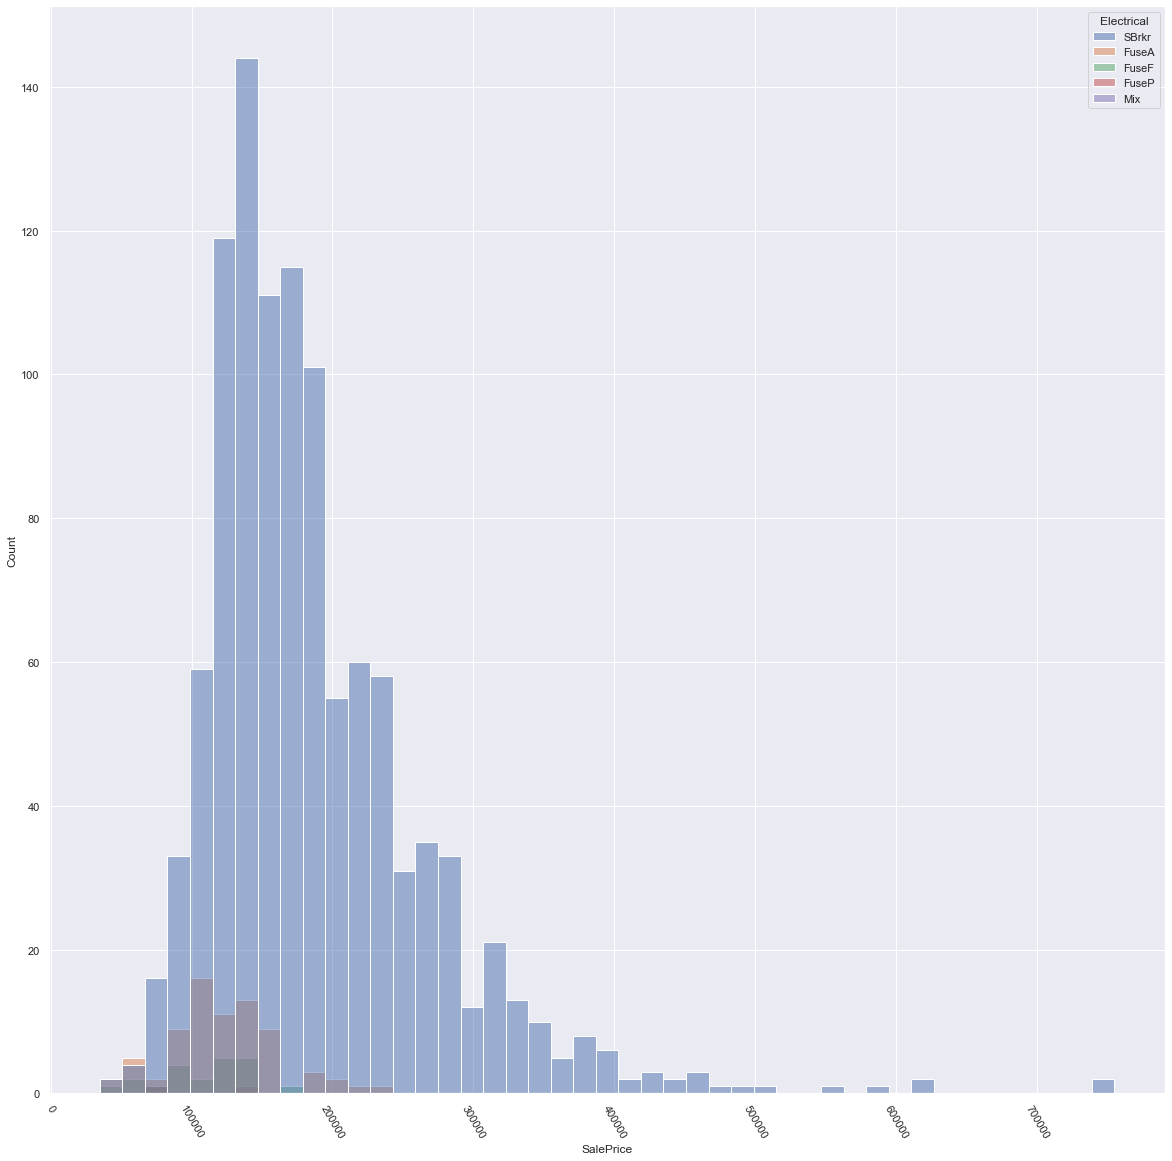

KitchenQual vs salesprice
TA    578
Gd    478
Ex     82
Fa     30
Name: KitchenQual, dtype: int64


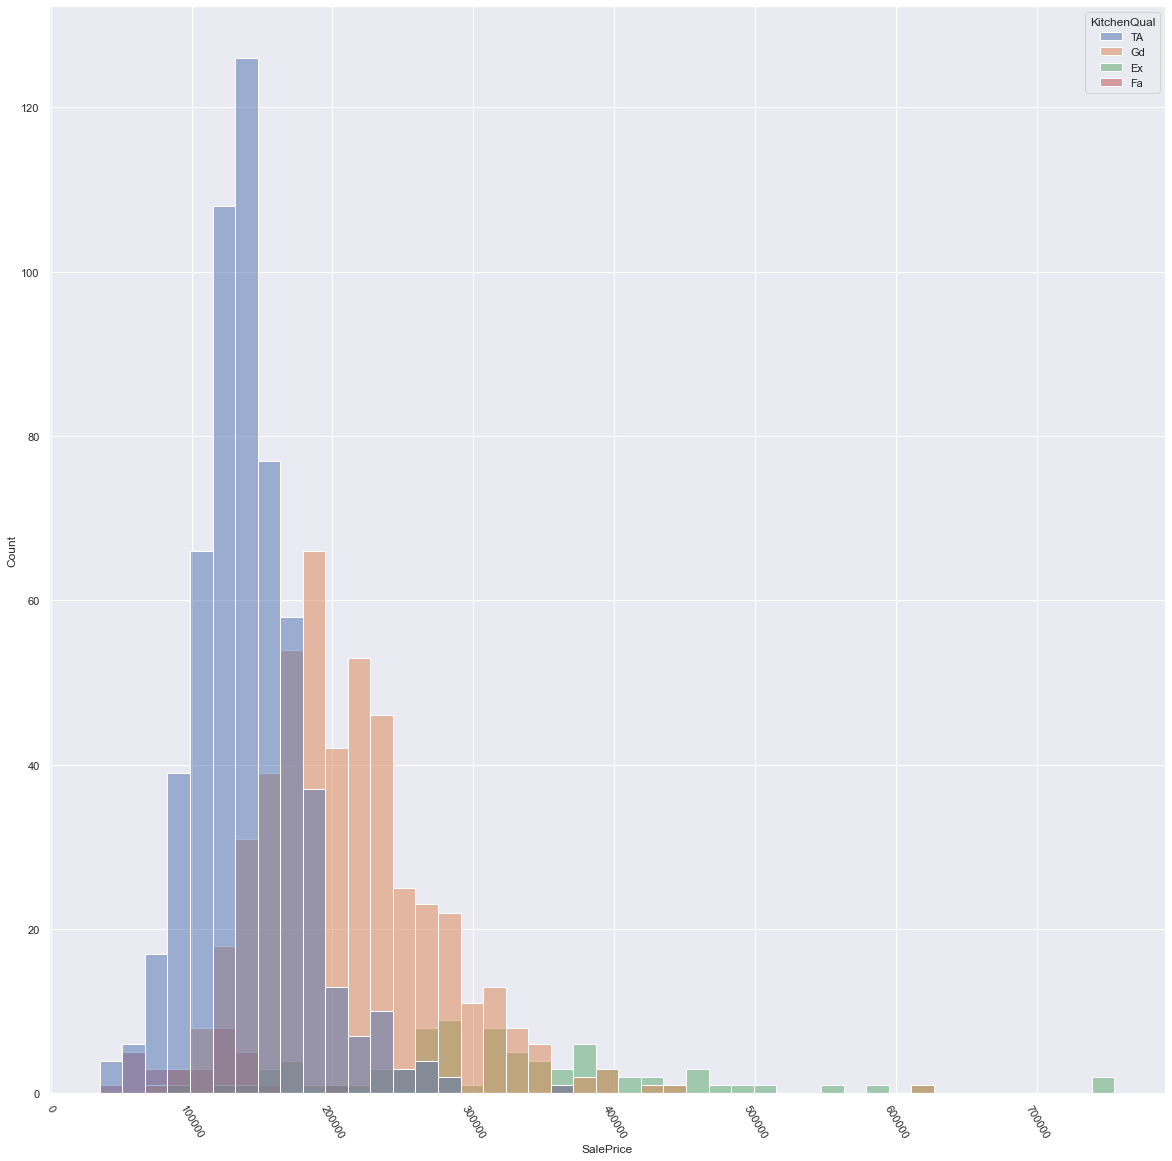

Functional vs salesprice
Typ     1085
Min2      30
Min1      25
Mod       12
Maj1      11
Maj2       4
Sev        1
Name: Functional, dtype: int64


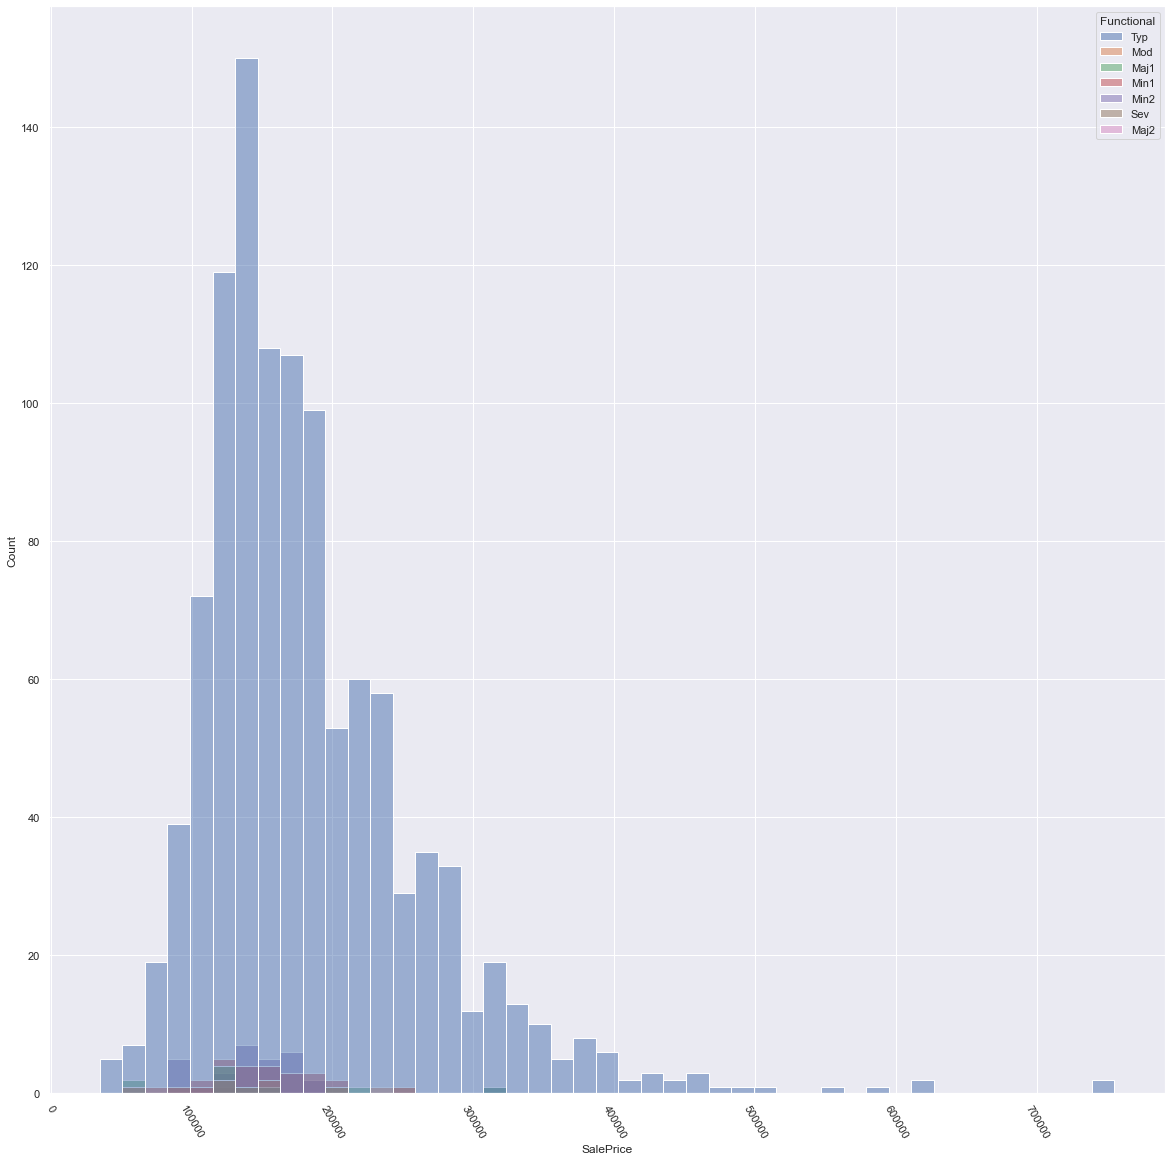

GarageType vs salesprice
Attchd     755
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64


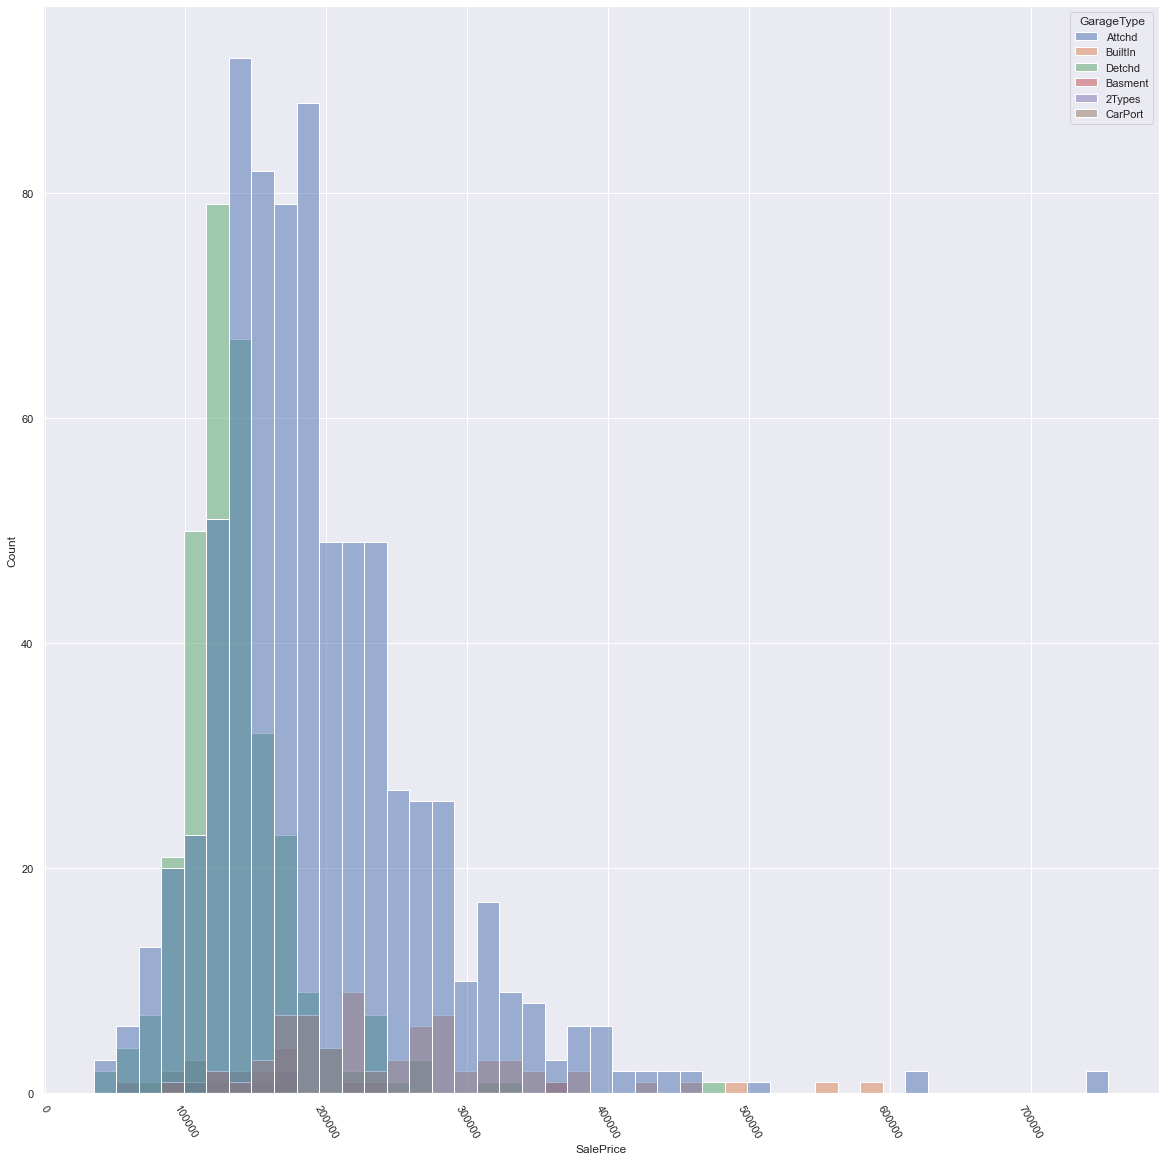

GarageFinish vs salesprice
Unf    551
RFn    339
Fin    278
Name: GarageFinish, dtype: int64


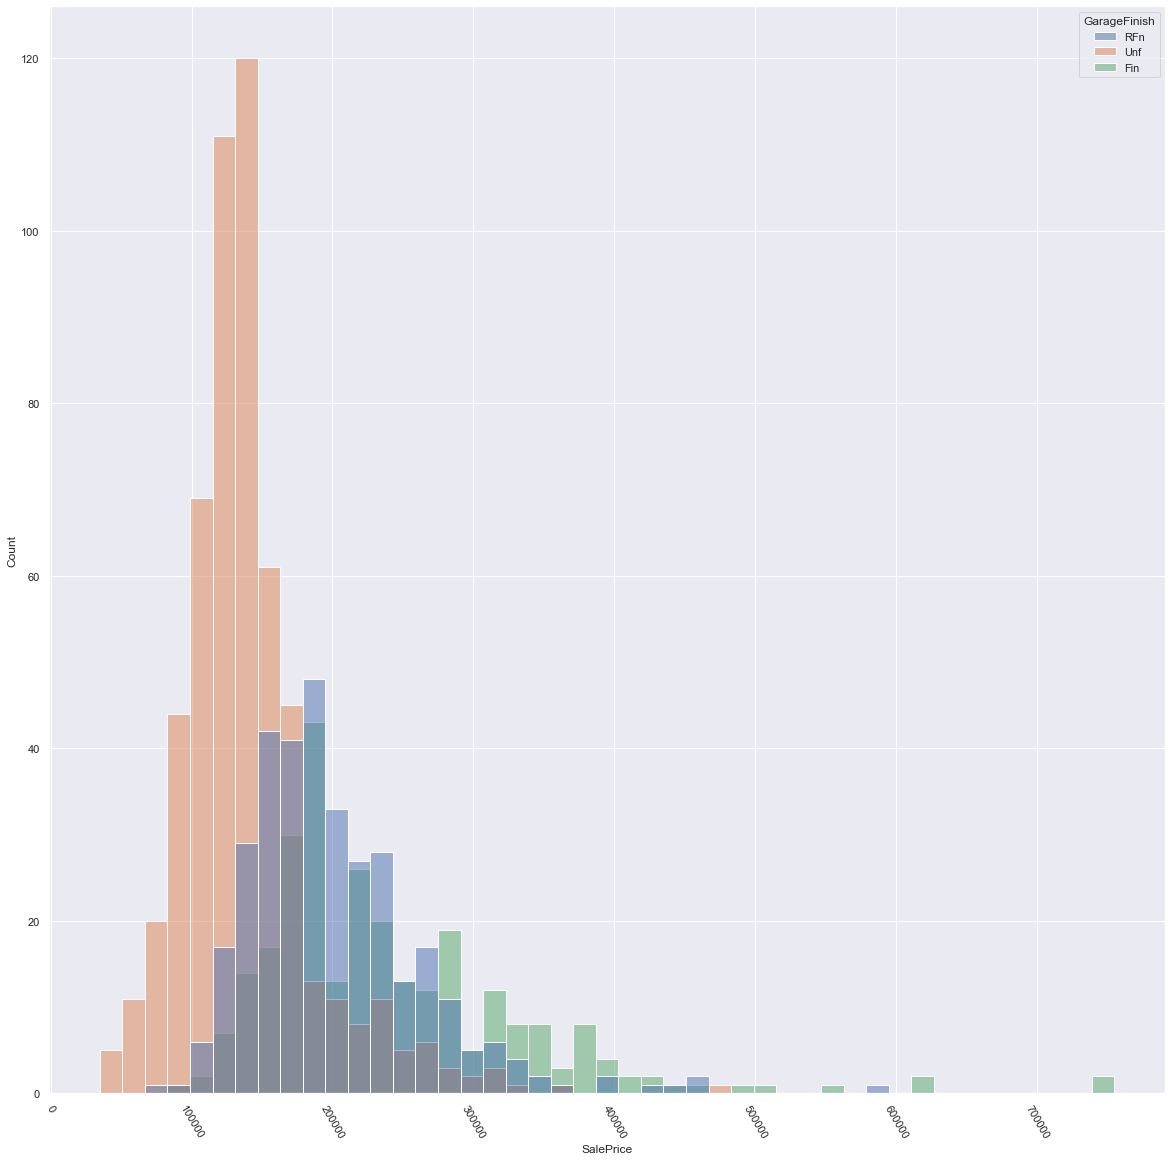

GarageQual vs salesprice
TA    1114
Fa      39
Gd      11
Ex       2
Po       2
Name: GarageQual, dtype: int64


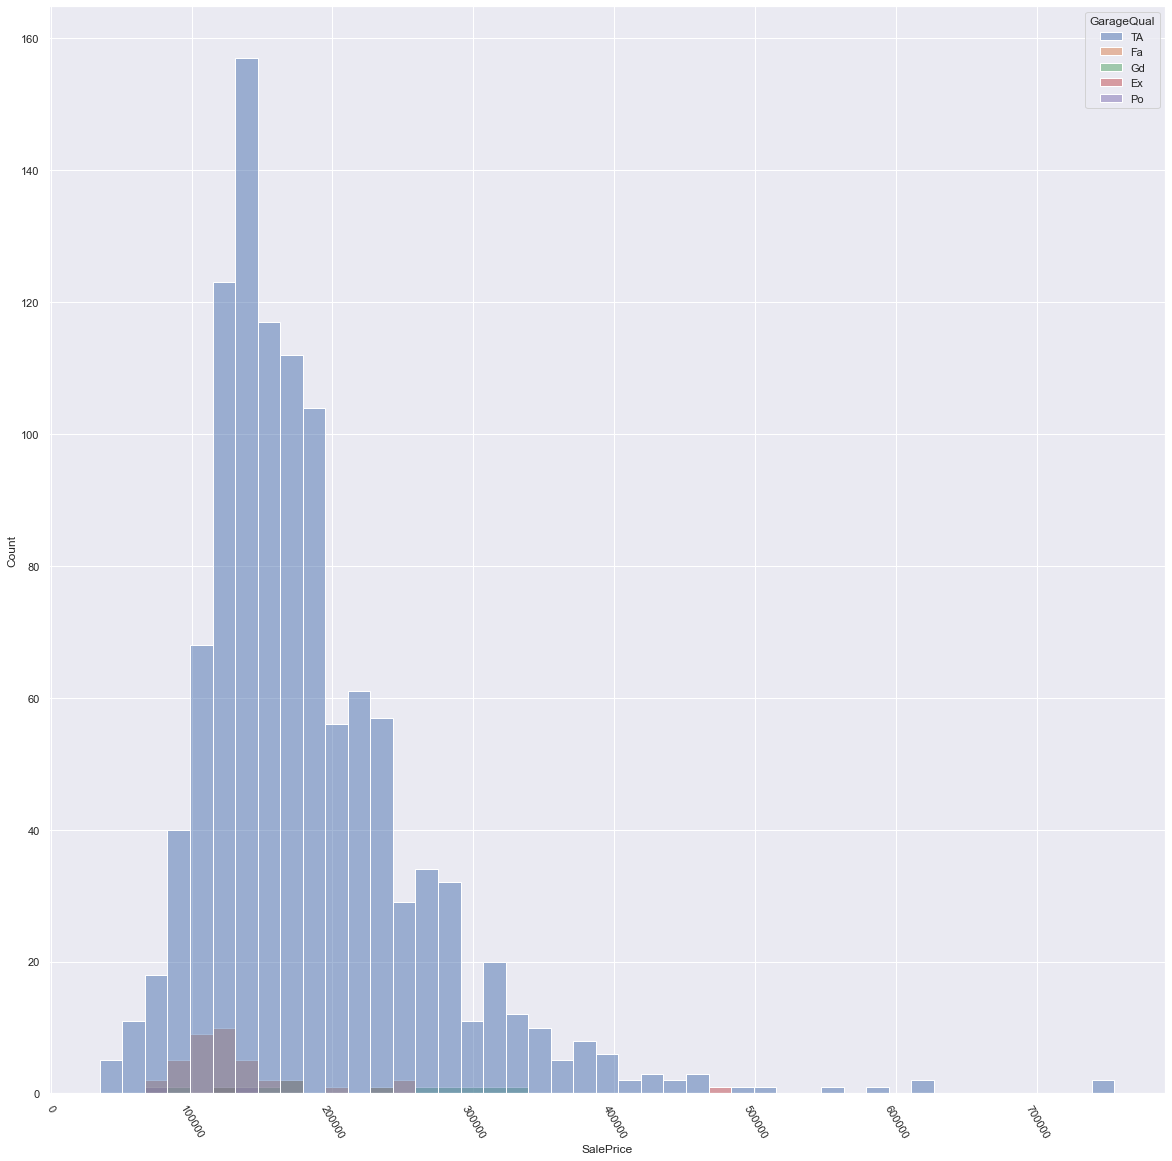

GarageCond vs salesprice
TA    1125
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64


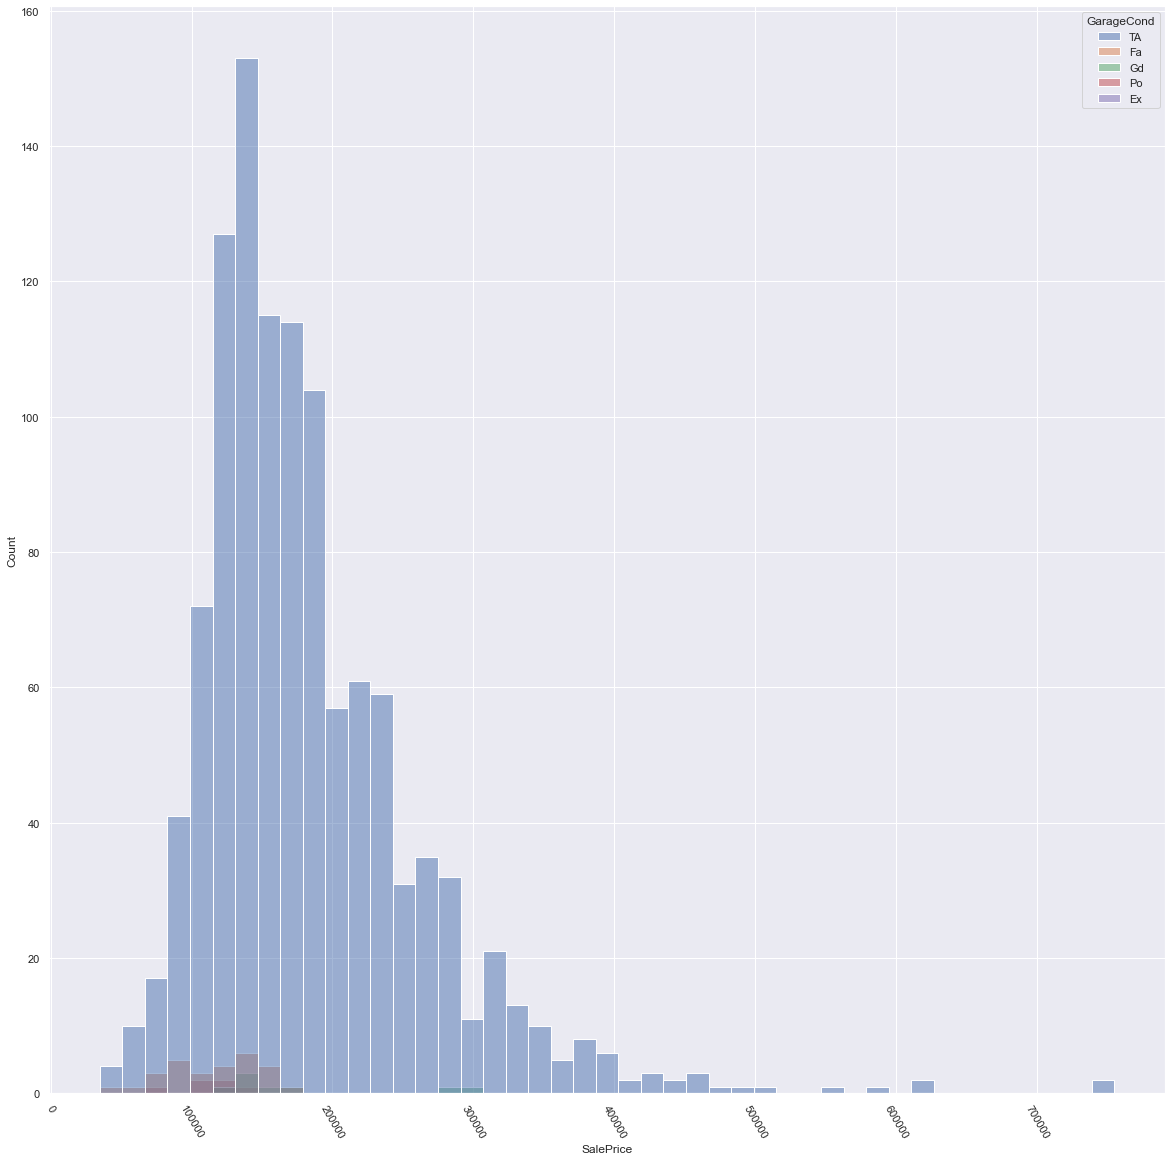

PavedDrive vs salesprice
Y    1071
N      74
P      23
Name: PavedDrive, dtype: int64


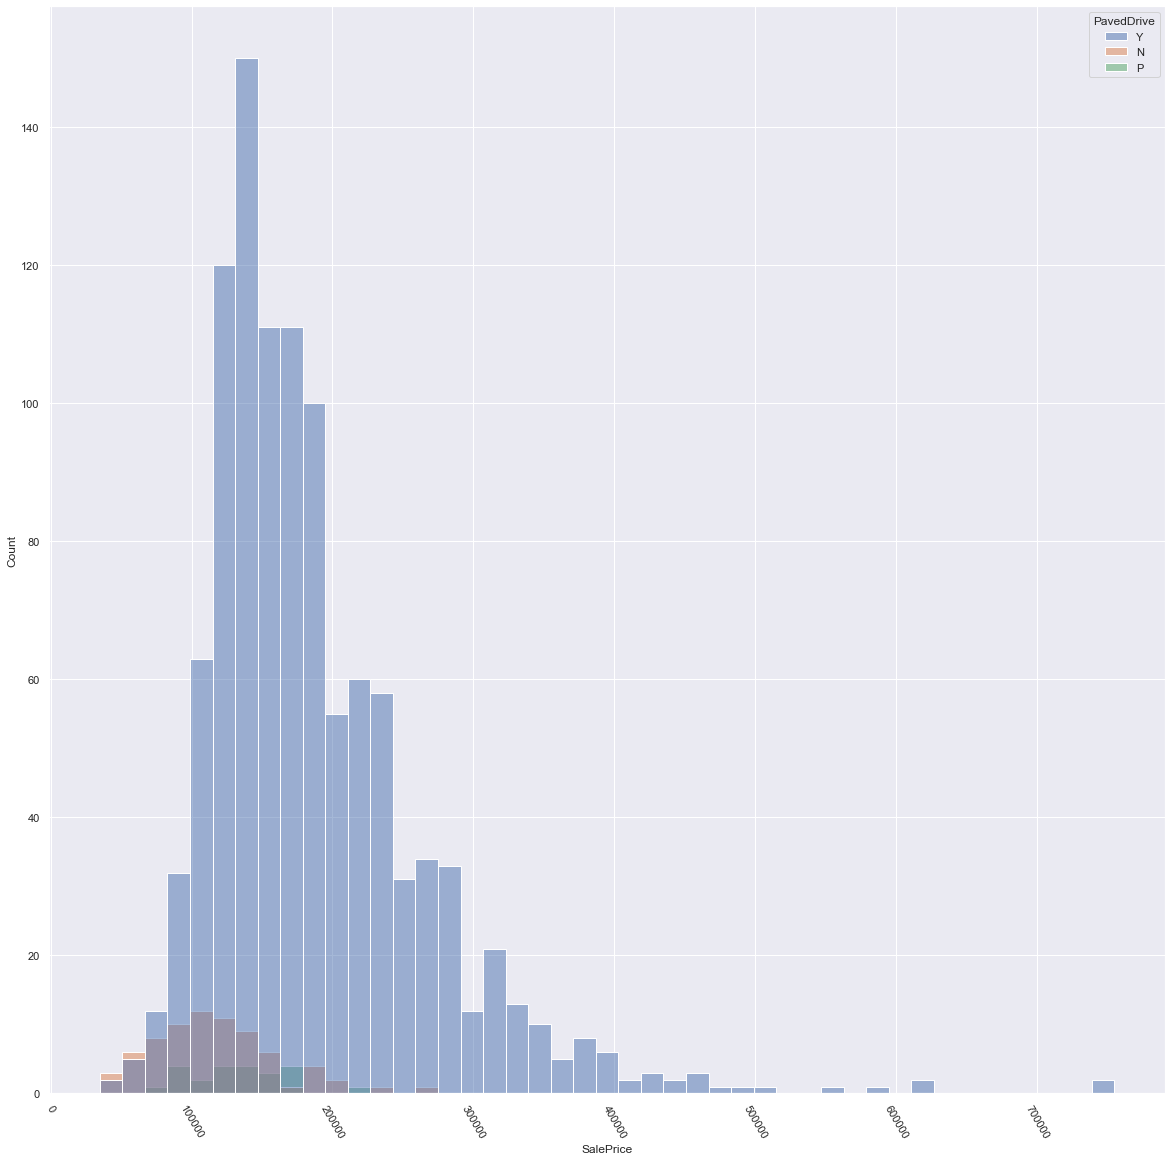

SaleType vs salesprice
WD       999
New      106
COD       38
ConLD      8
ConLI      5
ConLw      4
Oth        3
CWD        3
Con        2
Name: SaleType, dtype: int64


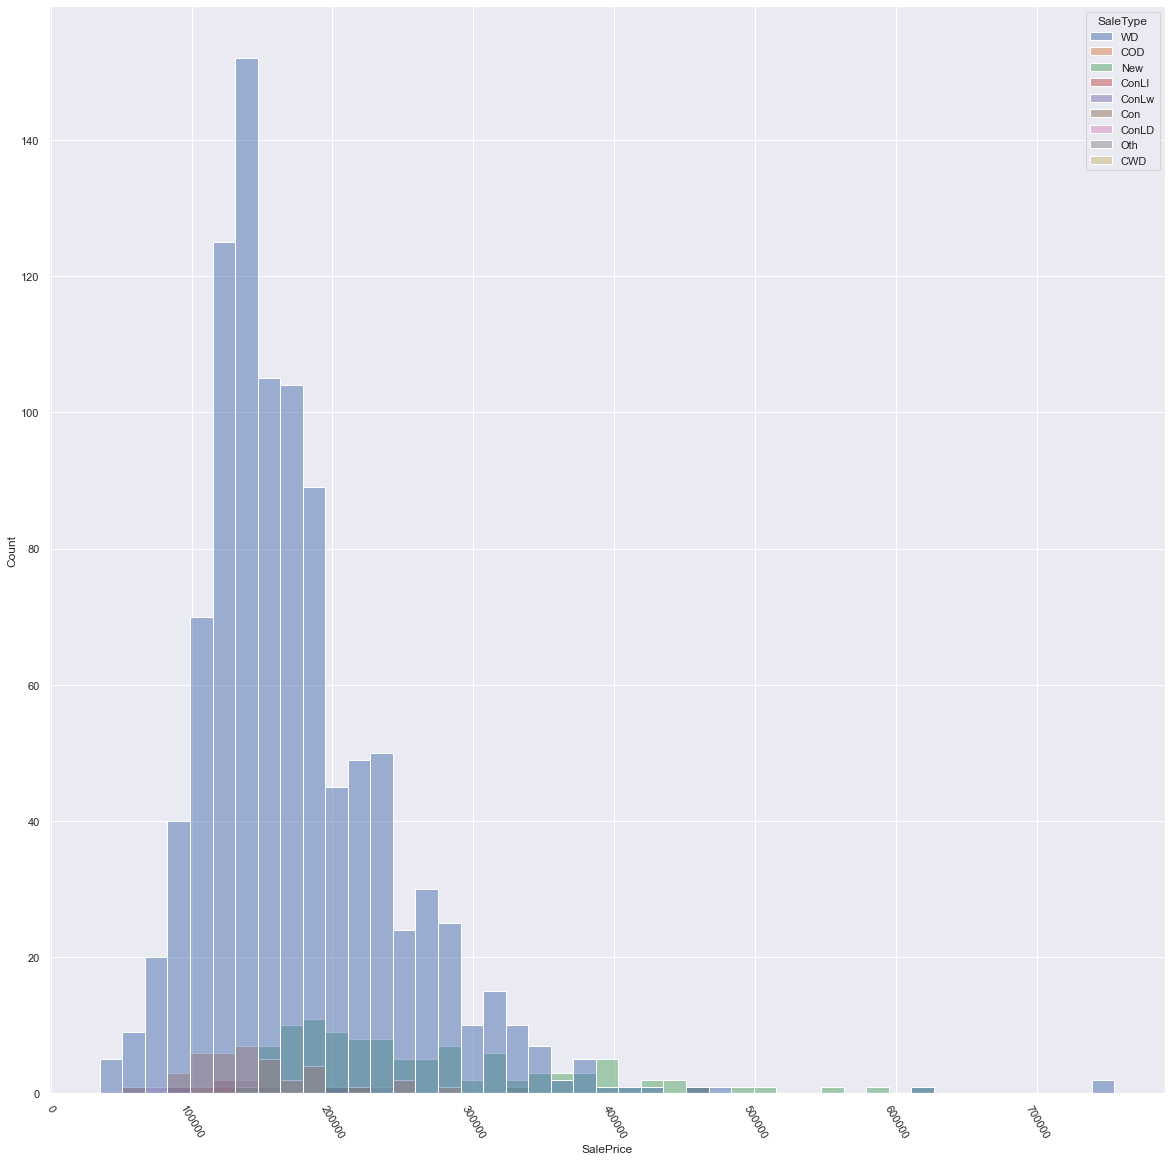

SaleCondition vs salesprice
Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64


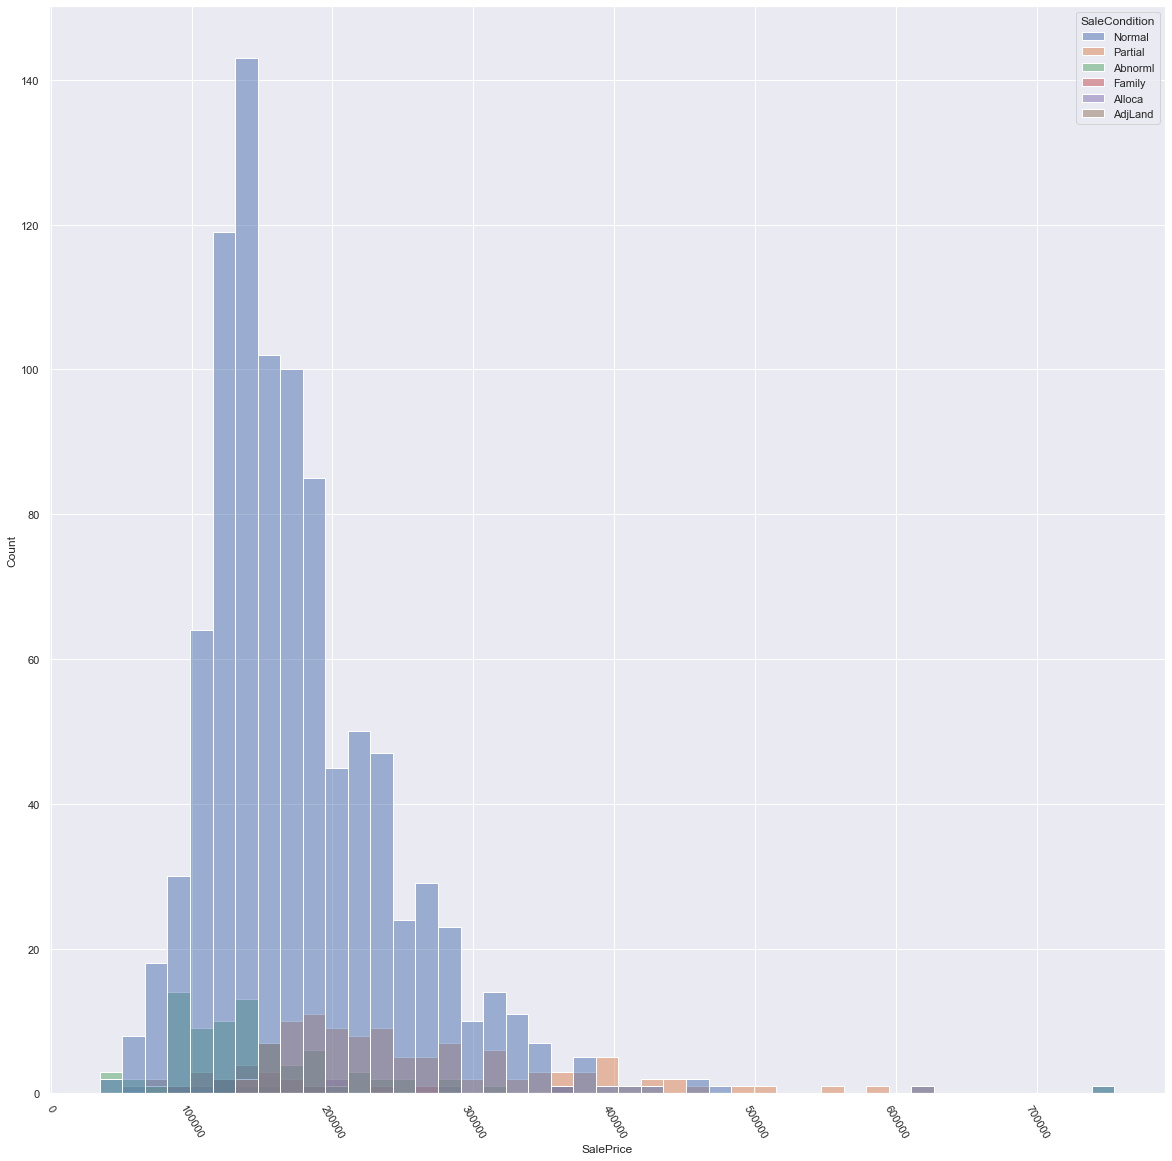

In [73]:
#plotting catogorical columns vs the target variable
for i in catg:
        print(f'{i} vs salesprice')
        print(df[i].value_counts())
        plt.figure(figsize=(20,20))
        plt.xticks(rotation=-60)
        sns.histplot(x='SalePrice',hue=i,data=df)
        plt.show()

MSZoning-Identifies the general zoning classification of the sale. Residential Low Density area seems to be commonly chosen zone for the houses

Street-Type of road access to property,Paved is ithe commonly prefered road in the dataset

LotShape-General shape of property,regular is the most common

LandContour-Flatness of the property, near flat or leveled property is the most common

Utilities-Type of utilities available, All public Utilities are the majority in the dataset

LotConfig-Lot configuration, corner lots seems to be the pricy ones

LandSlope-Slope of property, gentle slopes are the majority, followe by moderate slope, lesser slopes better price

Neighborhood-Physical locations within Ames city limits, College Creek seems to have lesser priced housed while BrkSide has 
some pricy houses

Condition1-Proximity to various conditions, mostly prefers normal conditions

Condition2-Proximity to various conditions, mostly prefers normal conditions

BldgType-Type of dwelling, single family houses are the most common

HouseStyle-Style of dwelling, increaase in price as the dwellings go higher

RoofStyle-Type of roof, hip seems t be used in cotly houses

Exterior1st-Exterior covering on house, better the qualiyu, better prices

SaleType-Home just constructed and sold, are sold at higher prices than rest

SaleCondition-Normal sales are common

### Handling outliers

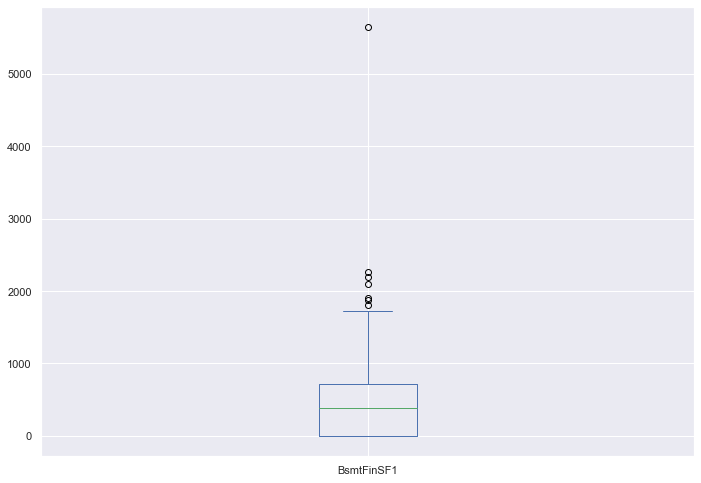

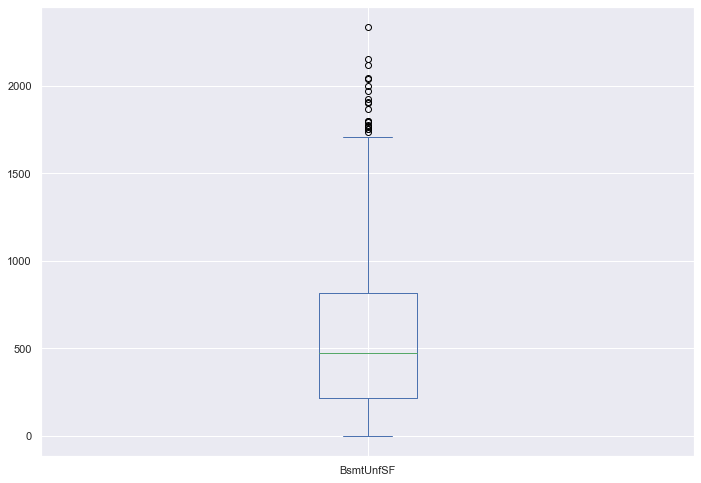

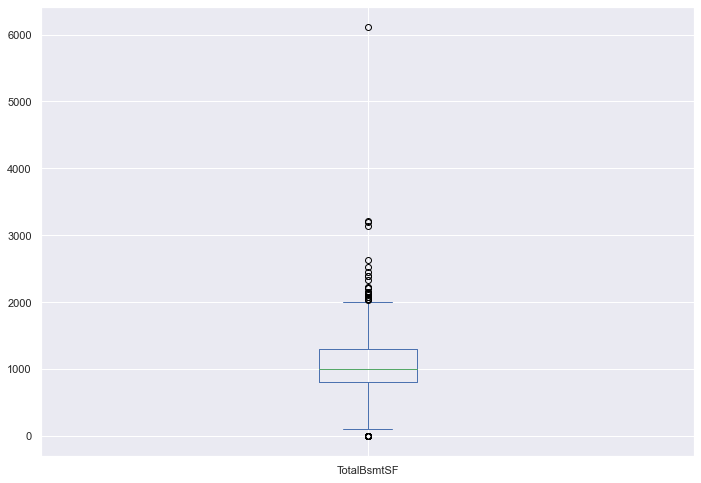

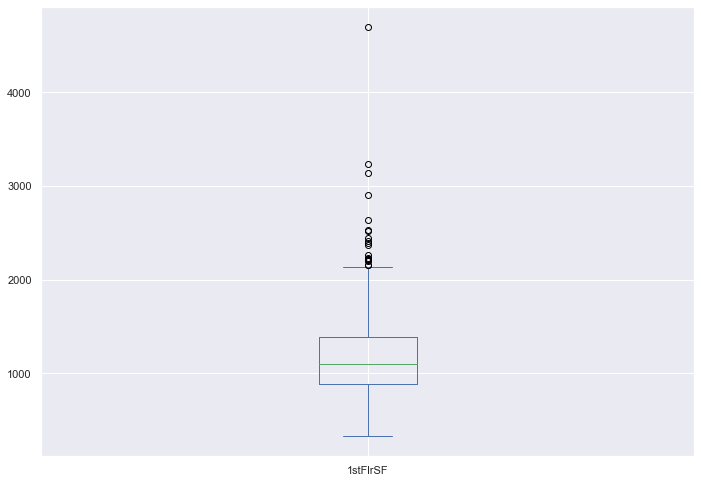

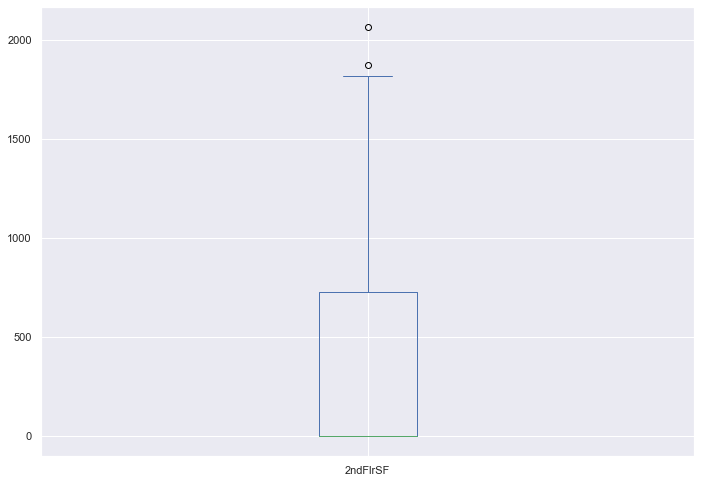

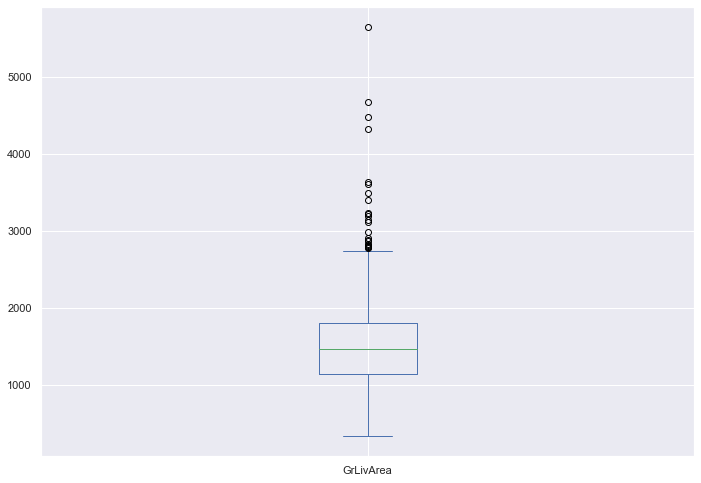

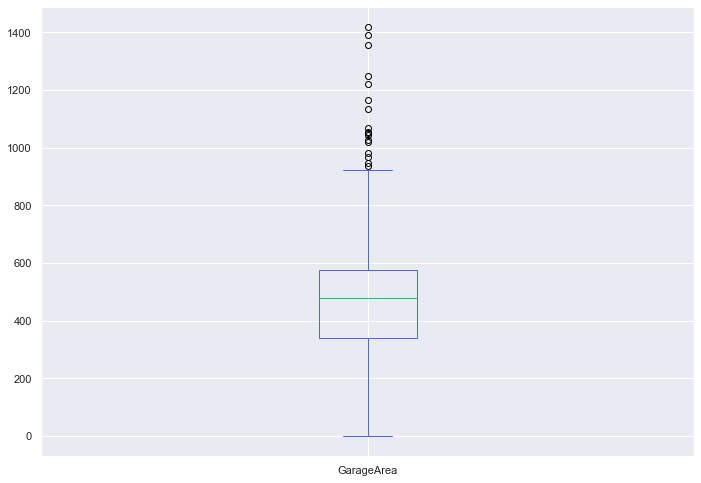

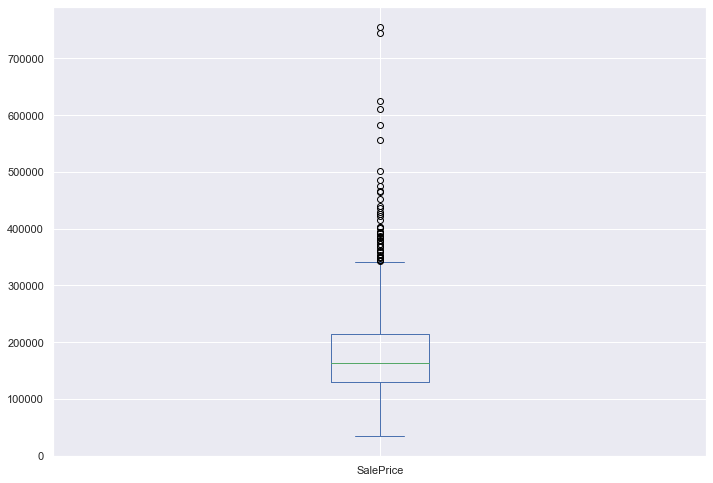

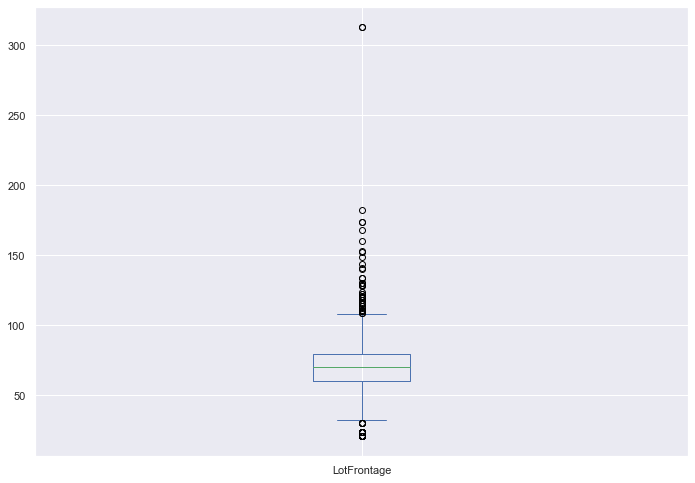

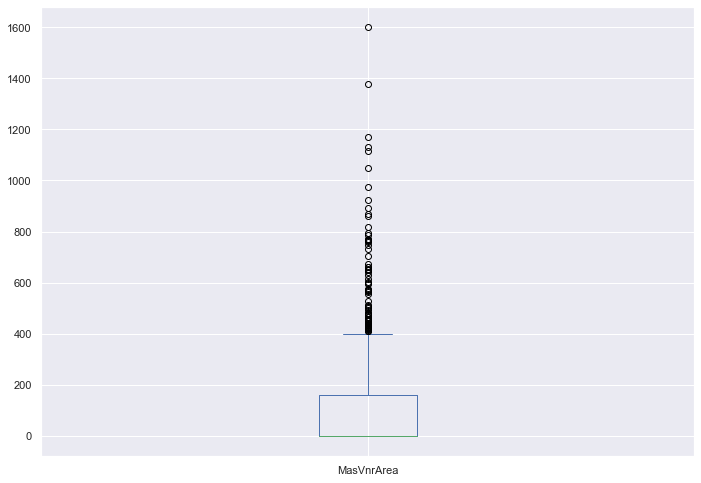

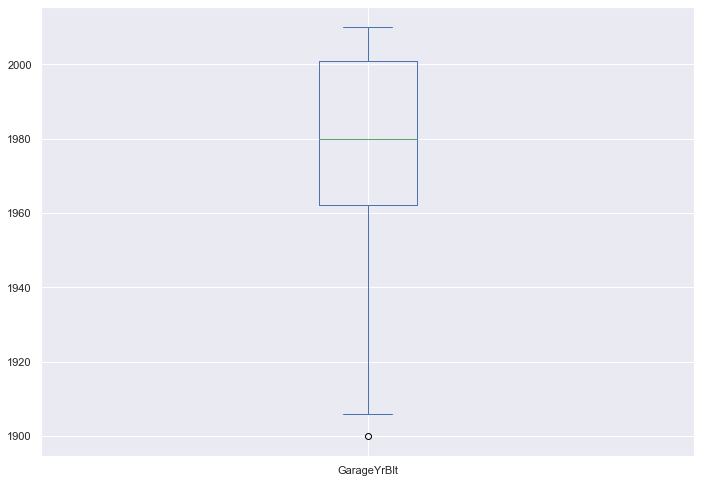

In [74]:
#handling outliers

outlier_cols = ['BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
                'GrLivArea', 'GarageArea', 'SalePrice', 'LotFrontage', 
                'MasVnrArea', 'GarageYrBlt']
for i in outlier_cols:
    df[i].plot.box()
    plt.show()

There are outliers in almost all the coulumns

In [75]:
from scipy.stats import zscore
z = np.abs(zscore(df[outlier_cols]))
threshold = 3
print(np.where(z>3))


(array([  40,   68,   78,  103,  103,  140,  141,  141,  141,  141,  141,
        141,  141,  142,  191,  192,  192,  195,  232,  232,  232,  232,
        241,  241,  241,  241,  243,  273,  300,  303,  305,  305,  305,
        305,  305,  338,  352,  355,  361,  361,  361,  361,  361,  369,
        394,  403,  423,  434,  452,  504,  504,  504,  504,  523,  525,
        561,  561,  574,  592,  592,  592,  592,  592,  592,  592,  608,
        614,  626,  681,  691,  691,  691,  691,  691,  691,  697,  697,
        720,  736,  757,  757,  758,  762,  762,  762,  762,  772,  772,
        800,  821,  821,  839,  839,  839,  839,  858,  858,  861,  863,
        864,  870,  897,  897,  914,  914,  914,  914,  980, 1032, 1046,
       1047, 1053, 1094, 1120, 1120, 1142, 1150], dtype=int64), array([ 8,  3,  7,  5,  7,  9,  0,  2,  3,  4,  5,  7,  8,  9,  8,  4,  5,
        8,  1,  5,  7,  9,  0,  3,  7,  9,  2,  5,  7,  8,  1,  2,  3,  5,
        7,  9,  9,  9,  0,  2,  3,  5,  9,  7,  7, 10, 

In [76]:
#creating an oulier free dataframe
df_new = df[(z<3).all(axis = 1)]
df_new

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0            120       RL         70.0     4928   Pave      IR1         Lvl   
1             20       RL         95.0    15865   Pave      IR1         Lvl   
2             60       RL         92.0     9920   Pave      IR1         Lvl   
3             20       RL        105.0    11751   Pave      IR1         Lvl   
4             20       RL         70.0    16635   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1163          20       RL         70.0     9819   Pave      IR1         Lvl   
1164          20       RL         67.0     8777   Pave      Reg         Lvl   
1165         160       RL         24.0     2280   Pave      Reg         Lvl   
1166          70  C (all)         50.0     8500   Pave      Reg         Lvl   
1167          60       RL         70.0     7861   Pave      IR1         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
0       AllPub    Inside       Gtl      NPkVill       Norm       Norm   
1       AllPub    Inside       Mod        NAmes       Norm       Norm   
2       AllPub   CulDSac       Gtl      NoRidge       Norm       Norm   
3       AllPub    Inside       Gtl       NWAmes       Norm       Norm   
4       AllPub       FR2       Gtl       NWAmes       Norm       Norm   
...        ...       ...       ...          ...        ...        ...   
1163    AllPub    Inside       Gtl       Sawyer       Norm       Norm   
1164    AllPub    Inside       Gtl      Edwards      Feedr       Norm   
1165    AllPub       FR2       Gtl      NPkVill       Norm       Norm   
1166    AllPub    Inside       Gtl       IDOTRR      Feedr       Norm   
1167    AllPub    Inside       Gtl      Gilbert       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0      TwnhsE     1Story            6            5       1976          1976   
1        1Fam     1Story            8            6       1970          1970   
2        1Fam     2Story            7            5       1996          1997   
3        1Fam     1Story            6            6       1977          1977   
4        1Fam     1Story            6            7       1977          2000   
...       ...        ...          ...          ...        ...           ...   
1163     1Fam     1Story            5            5       1967          1967   
1164     1Fam     1Story            4            5       1949          2003   
1165    Twnhs     2Story            6            6       1976          1976   
1166     1Fam     2Story            4            4       1920          1950   
1167     1Fam     2Story            6            5       2002          2003   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0        Gable  CompShg     Plywood     Plywood       None         0.0   
1         Flat  Tar&Grv     Wd Sdng     Wd Sdng       None         0.0   
2        Gable  CompShg     MetalSd     MetalSd       None         0.0   
3          Hip  CompShg     Plywood     Plywood    BrkFace       480.0   
4        Gable  CompShg     CemntBd     CmentBd      Stone       126.0   
...        ...      ...         ...         ...        ...         ...   
1163     Gable  CompShg     MetalSd     MetalSd    BrkFace        31.0   
1164     Gable  CompShg     VinylSd     VinylSd       None         0.0   
1165     Gable  CompShg     Plywood     Brk Cmn       None         0.0   
1166   Gambrel  CompShg     BrkFace     BrkFace       None         0.0   
1167     Gable  CompShg     VinylSd     VinylSd       None         0.0   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0           TA        TA     CBlock       Gd       TA           No   
1           Gd        Gd      PConc       TA       Gd           Gd   
2           Gd        TA      PConc       Gd       TA           Av   
3           TA        TA     CBlock       Gd       TA         

In [77]:
#Finding the percentage of dataloss
loss = ((1168-1104)/1168)*100
loss

5.47945205479452

keeping the new dataset as the datalosss seems to be minimal

### Handling Skewness

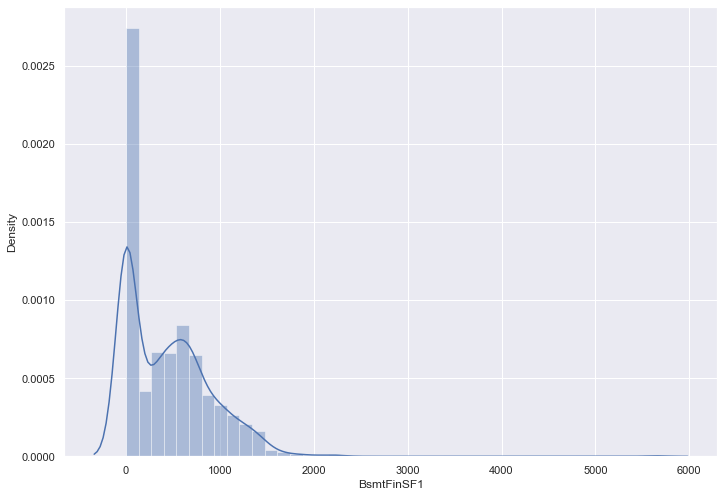

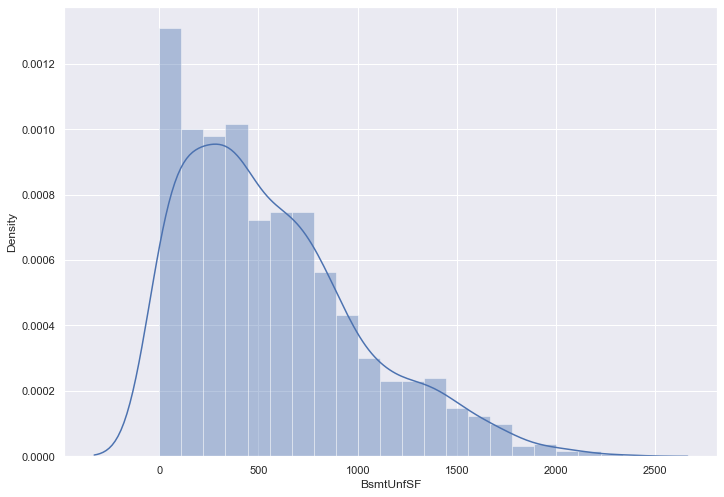

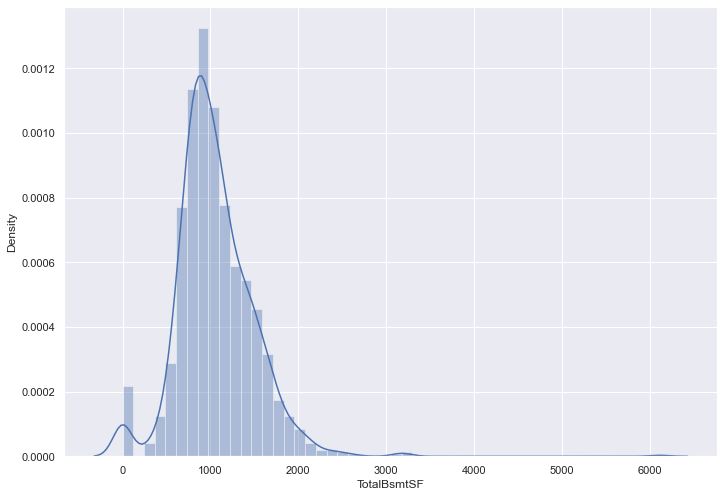

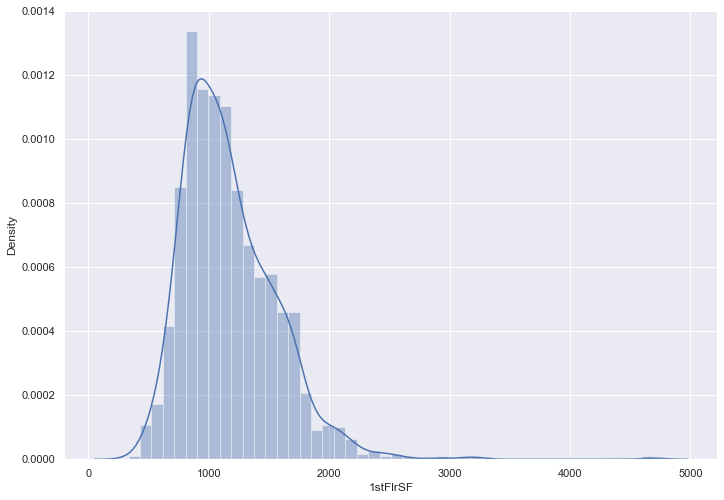

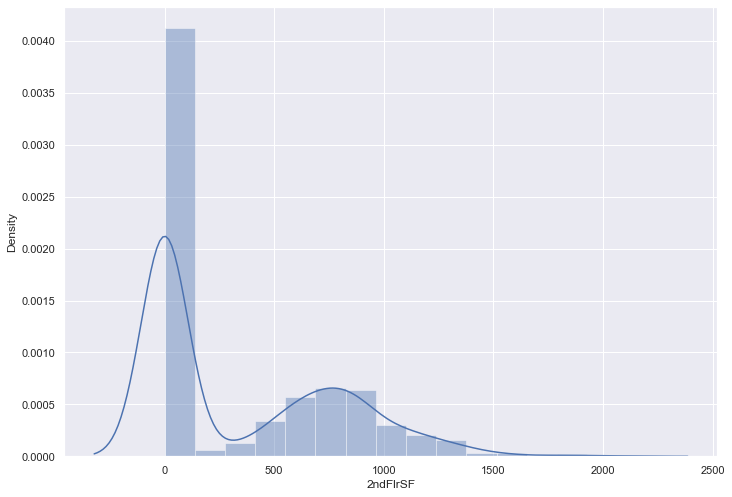

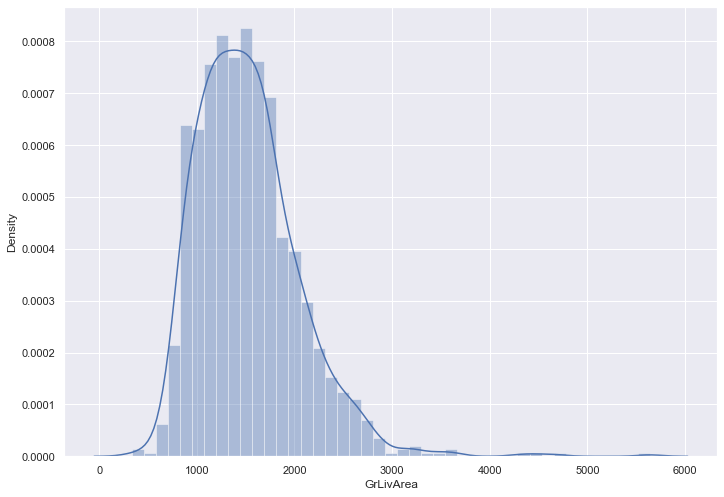

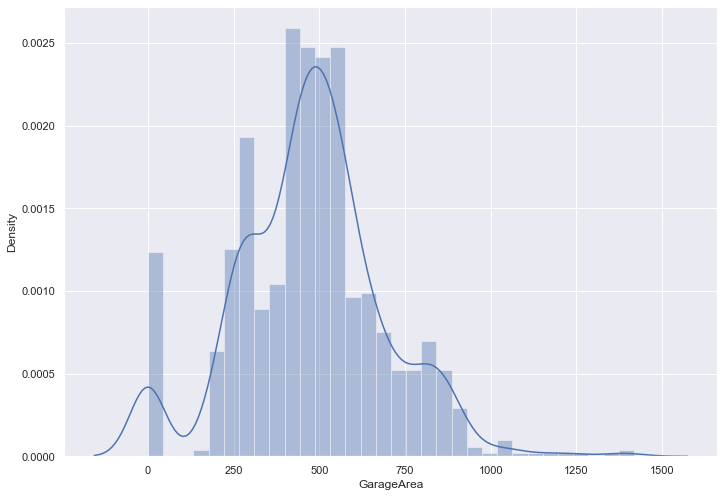

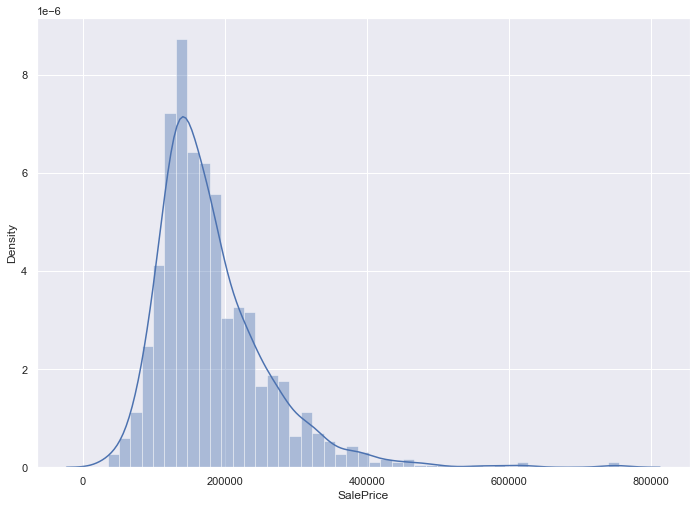

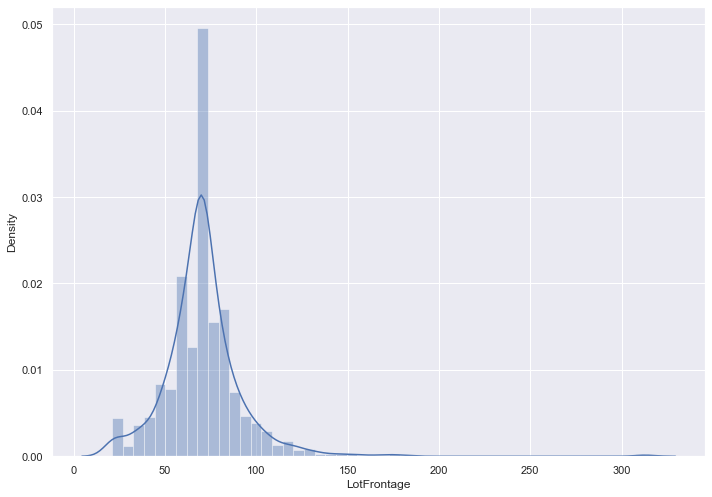

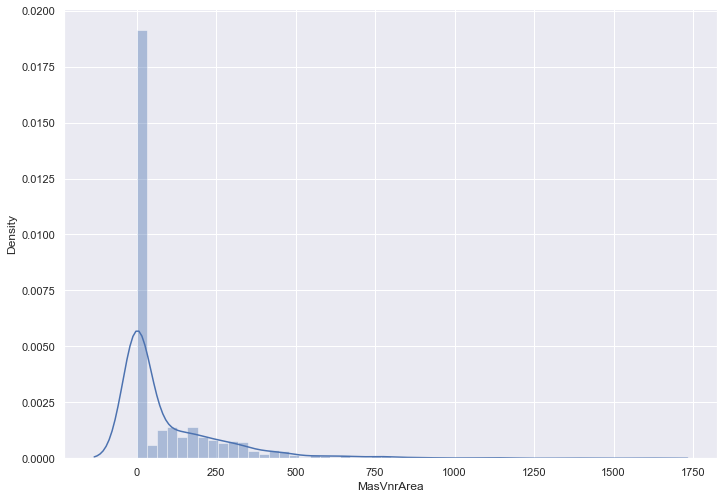

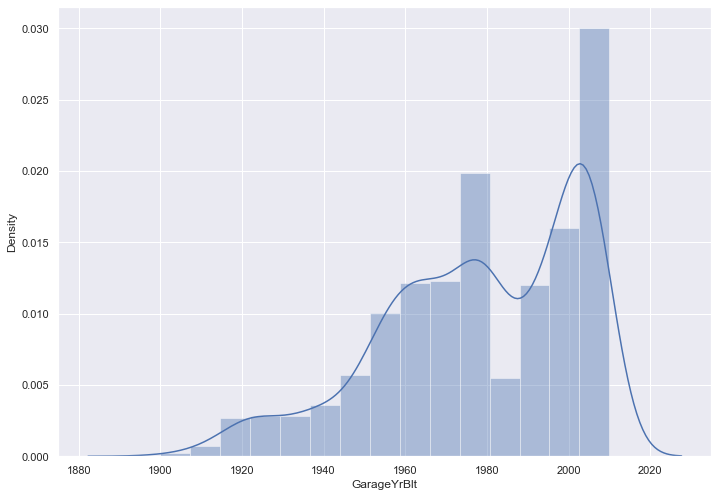

In [47]:
# Checking the skewness
for i in outlier_cols: 
    sns.distplot(df[i], kde = True)
    plt.show()

In [89]:
#using powertransformer, to correct skew

to_rem_skew_test = ['BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 
                'GrLivArea', 'MasVnrArea', 'GarageYrBlt']
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df_new[to_rem_skew_test] = pt.fit_transform(df_new[to_rem_skew_test])

In [90]:
df[to_rem_skew_test].skew()

BsmtFinSF1    -0.404528
BsmtUnfSF     -0.284390
1stFlrSF      -0.002391
2ndFlrSF       0.280208
GrLivArea     -0.000054
MasVnrArea     0.439526
GarageYrBlt   -0.136293
dtype: float64

### Encoding

In [95]:
object_cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
               'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
               'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
               'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
               'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
               'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
               'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
               'PavedDrive','SaleType','SaleCondition']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in object_cols:
    df_new[i] = le.fit_transform(df_new[i])

In [96]:
df_new.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0         120         3         70.0     4928       1         0            3   
1          20         3         95.0    15865       1         0            3   
2          60         3         92.0     9920       1         0            3   
3          20         3        105.0    11751       1         0            3   
4          20         3         70.0    16635       1         0            3   

   Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0          0          4          0            13           2           2   
1          0          4          1            12           2           2   
2          0          1          0            15           2           2   
3          0          4          0            14           2           2   
4          0          2          0            14           2           2   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         4           2            6            5       1976          1976   
1         0           2            8            6       1970          1970   
2         0           5            7            5       1996          1997   
3         0           2            6            6       1977          1977   
4         0           2            6            7       1977          2000   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0          1         0            8            9           2   -0.795420   
1          0         4           12           13           2   -0.795420   
2          1         0            7            7           2   -0.795420   
3          3         0            8            9           1    1.332568   
4          1         0            4            4           3    1.242679   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0          3          4           1         2         3             3   
1          2          2           2         3         1             1   
2          2          4           2         2         3             0   
3          3          4           1         2         3             3   
4          2          4           1         2         3             3   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             0   -0.341099             5           0   0.950955         1078   
1             0    0.246511             4         823   1.098791         2217   
2             2    1.033966             5           0  -0.550503         1117   
3             1    0.828508             5           0   1.260492         1844   
4             0    1.462025             5           0  -0.284261         1602   

   Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0        1          4           1           4 -0.443636 -0.860691   
1        1          0           1           4  2.505319 -0.860691   
2        1          0           1           4  0.102417  1.182129   
3        1          0           1           4  1.827969 -0.860691   
4        1          2           1           4  1.322880 -0.860691   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0  -1.225689             0             0         2         0   
1             0   1.526972             1             0         2         0   
2             0   1.177576             1             0         2         1   
3             0   0.867979             0             0         2         0   
4             0   0.386358             0             1         2         0   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0             2             1            3             5           6   
1             4             1            2             8           6   
2             3             1            3             8           6   
3             3             1            

### Scaling

In [97]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_new = ss.fit_transform(df_new)
df_new = pd.DataFrame(df_new, columns = df.columns)

### Splitting data

In [98]:
x = df_new.drop('SalePrice', axis = 1)
y = df_new['SalePrice']

### Model building

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

In [100]:
#checking the best random state

lr=LinearRegression()
maxacc=0
maxrs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = i)
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=r2_score(y_test, predlr)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('best r2 score',maxacc,'on random state',maxrs)

best r2 score 0.8942291520561092 on random state 47


In [101]:
#splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 28)

In [102]:
def model(mod):
    print("Model:",mod)
    mod.fit(x_test,y_test)
    ##print(mod.coef_)
    pred=mod.predict(x_test)
    mod.score(x_train,y_train)
    ##print('predicted', pred)
    ##print('actual:',y_test)
    rscr=r2_score(y_test,pred)
    print('r2score:',r2_score(y_test,pred))
    print('Mean squared error',mean_squared_error(y_test,pred))
    print('Root Mean squared error',np.sqrt(mean_squared_error(y_test,pred)))
    print('mean absolute error:',mean_absolute_error(y_test,pred))
    print('\n\n')

In [103]:
#Creating instances for each model
lr = LinearRegression()
knr = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
svr = SVR()
rfr = RandomForestRegressor()
ls = Lasso()
rd = Ridge()
eln = ElasticNet()

In [104]:
alg=[lr, knr, dtr, svr, rfr, ls, rd, eln]
for i in alg:
    print(model(i))

Model: LinearRegression()
r2score: 0.9232593505654972
Mean squared error 0.07759670763489836
Root Mean squared error 0.27856185603003575
mean absolute error: 0.21485535094793548



None
Model: KNeighborsRegressor()
r2score: 0.8450478103159903
Mean squared error 0.15668071418342078
Root Mean squared error 0.3958291477183316
mean absolute error: 0.279770926391195



None
Model: DecisionTreeRegressor()
r2score: 1.0
Mean squared error 0.0
Root Mean squared error 0.0
mean absolute error: 0.0



None
Model: SVR()
r2score: 0.9454665371372681
Mean squared error 0.05514179519277624
Root Mean squared error 0.2348229017638106
mean absolute error: 0.12790590573599026



None
Model: RandomForestRegressor()
r2score: 0.9789097513954977
Mean squared error 0.021325514795227898
Root Mean squared error 0.1460325812797538
mean absolute error: 0.101066184040092



None
Model: Lasso()
r2score: 0.0
Mean squared error 1.0111552118297653
Root Mean squared error 1.0055621372296022
mean absolute error: 0.7686415

In [105]:
#function for cross-validation
from sklearn.model_selection import cross_val_score
def crossval(mod):
    print(f'model: {mod}')
    scores = cross_val_score(mod, x_train, y_train, scoring='r2',cv=5)
    print('mean_cross_validation:',scores.mean())

In [106]:
for j in alg:
    print(crossval(j))
    print('\n\n')

model: LinearRegression()
mean_cross_validation: 0.8535947752453907
None



model: KNeighborsRegressor()
mean_cross_validation: 0.7773261322594699
None



model: DecisionTreeRegressor()
mean_cross_validation: 0.6700460546363738
None



model: SVR()
mean_cross_validation: 0.8136861494006192
None



model: RandomForestRegressor()
mean_cross_validation: 0.850152593112357
None



model: Lasso()
mean_cross_validation: -0.003635181796803977
None



model: Ridge()
mean_cross_validation: 0.8541931035862158
None



model: ElasticNet()
mean_cross_validation: 0.31458152555203084
None





Choosing KNR as the best model based on the difference between r2 scores

### Hyper parameter tuning

In [111]:
from sklearn.model_selection import GridSearchCV
parameters = {'leaf_size' : [5,10,15,20],
              'n_neighbors' : [5,10,15,20],
              'p':[1,2],
              'weights':['uniform','distance']}

In [112]:
knc=KNeighborsRegressor()
clf = GridSearchCV(knc, parameters,verbose=1)
clf.fit(x_train, y_train)

print(clf.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
{'leaf_size': 5, 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}


### Rerunning the model

In [113]:
knf=KNeighborsRegressor(leaf_size=5, p=1,n_neighbors=10,weights='distance')
knf.fit(x_train,y_train)
knf.score(x_train, y_train)
pred_kn = knf.predict(x_test)
print('Mean absolute error: ', mean_absolute_error(y_test,pred_kn))
print('Mean squared error: ', mean_squared_error(y_test,pred_kn))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,pred_kn)))
print('R2 Score: ', r2_score(y_test,pred_kn))

Mean absolute error:  0.29621262414767857
Mean squared error:  0.18128715287809027
Root mean squared error:  0.4257782907548132
R2 Score:  0.8207128334432091


##### We are getting an R2 score of 0.8207128334432091

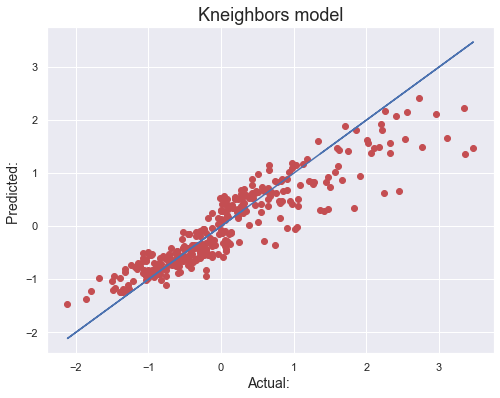

In [114]:
#plotting the model
plt.figure(figsize = (8,6))
plt.scatter(x = y_test, y = pred_kn, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('Actual: ', fontsize = 14)
plt.ylabel('Predicted: ', fontsize = 14)
plt.title('Kneighbors model', fontsize = 18)
plt.show()

In [115]:
import joblib
joblib.dump(knf, 'house_price.obj')

['house_price.obj']

### Importing test data

In [118]:
dft = pd.read_csv('test.csv')
dft.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

In [120]:
#checking the columns which has null values

null_col=[i for i in dft if dft[i].isnull().sum()>=1]

In [123]:
#replacing the null values

dft['LotFrontage'] = dft['LotFrontage'].fillna(dft['LotFrontage'].median())
dft['MasVnrArea'] = dft['MasVnrArea'].fillna(dft['MasVnrArea'].mode()[0])
dft['GarageYrBlt'] = dft['GarageYrBlt'].fillna(dft['GarageYrBlt'].median())
dft['MasVnrType'] = dft['MasVnrType'].fillna(dft['MasVnrType'].mode()[0])
dft['BsmtQual'] = dft['BsmtQual'].fillna(dft['BsmtQual'].mode()[0])
dft['BsmtCond'] = dft['BsmtCond'].fillna(dft['BsmtCond'].mode()[0])
dft['BsmtExposure'] = dft['BsmtExposure'].fillna(dft['BsmtExposure'].mode()[0])
dft['BsmtFinType1'] = dft['BsmtFinType1'].fillna(dft['BsmtFinType1'].mode()[0])
dft['BsmtFinType2'] = dft['BsmtFinType2'].fillna(dft['BsmtFinType2'].mode()[0])
dft['GarageType'] = dft['GarageType'].fillna(dft['GarageType'].mode()[0])
dft['GarageYrBlt'] = dft['GarageYrBlt'].fillna(dft['GarageYrBlt'].mode()[0])
dft['GarageFinish'] = dft['GarageFinish'].fillna(dft['GarageFinish'].mode()[0])
dft['GarageQual'] = dft['GarageQual'].fillna(dft['GarageQual'].mode()[0])
dft['GarageCond'] = dft['GarageCond'].fillna(dft['GarageCond'].mode()[0])

In [126]:
#droping columns

li=['PoolQC','Fence','MiscFeature','Id','FireplaceQu','Alley']
for i in li:
    dft.drop([i],inplace=True,axis=1)

### Encoding

In [128]:
object_col = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
               'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
               'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
               'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
               'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
               'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
               'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
               'PavedDrive','SaleType','SaleCondition']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in object_col:
    dft[i] = le.fit_transform(dft[i])

### Scaling

In [132]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
dft = ss.fit_transform(dft)

### importing obj

In [133]:
final = joblib.load('house_Price.obj')
final.predict(dft)

array([ 2.03917208e+00,  6.90485697e-01,  5.91022741e-01, -5.00992243e-01,
        5.85802266e-01, -1.10170753e+00, -4.58149198e-01,  1.38126878e+00,
        6.17899312e-01, -3.43045272e-01, -1.07314197e+00, -7.24934682e-01,
       -8.70517353e-01, -2.88007351e-01,  1.00080314e+00, -7.04256260e-01,
       -8.37592757e-01, -6.81209699e-01, -4.99633885e-02,  4.16454322e-01,
       -6.16030472e-01, -3.18502775e-01, -7.18324421e-01, -1.23750151e+00,
       -1.04967181e+00, -8.31041046e-01,  1.35319081e-01, -5.87711536e-01,
        6.03592363e-02, -1.03324702e+00, -7.08833384e-01,  3.81861673e-01,
        4.35110385e-01, -3.40553227e-01, -8.48978783e-01,  1.43764057e-01,
        5.08684807e-01, -1.11918393e+00, -3.26040261e-01, -6.93738191e-01,
       -9.62541175e-01,  1.51718085e+00,  3.92416414e-01,  3.80552986e-01,
       -1.99116692e-01, -6.15048203e-01, -7.24271998e-01, -9.91486394e-01,
        3.72022240e-01,  2.34273146e+00, -7.08080204e-01,  3.11318745e-01,
       -8.16277189e-01, -

In [134]:
testdata=pd.DataFrame(final.predict(dft))
testdata

0
0    2.039172
1    0.690486
2    0.591023
3   -0.500992
4    0.585802
..        ...
287  0.989518
288 -0.719983
289 -0.492382
290 -0.572495
291 -1.144024

[292 rows x 1 columns]